In [1]:
import pandas as pd
import numpy as np
import json
from itertools import chain

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import pprint 
ppdict = pprint.PrettyPrinter(indent=4, sort_dicts=False)


import time

import glob


params = {
   'axes.labelsize': 14,
   'font.size': 14,
   'legend.fontsize': 14,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5],
    'savefig.facecolor':'white'
   }

mpl.rcParams.update(params)


timestr = time.strftime("%Y%m%d%H%M")

In [2]:
# Restart the kernel between runs of different setups.

In [3]:
import sys
sys.path.insert(1,'fluxes_analysis_helpers.py') # should be in the same folder with nb if you don't want to bother about paths on import


from fluxes_analysis_helpers import *

183
183


In [4]:
sol_saveat_dt = [1,1e-4][0]

print(sol_saveat_dt)

inpath = "output/"
outpath = "figures/fig6/" 

1


In [5]:
##############################################
# set to True to save fig

savefigures = True #False #True 

##############################################

In [6]:
# These are just to help choosing combination of fluxes 
# when you are interested in dynamics of particular variables

# du and rates

with open('opt_sys_young_202302210826_2stim_PCmn.jl','r') as f:
    young_du = [l.rstrip('\n') for l in f.readlines() if l.startswith('du[')]

# filter for dynamic only, i.e. du != 0 
def du_cleanup(indu):
    du = {}
    for l in indu:
        lhs,rhs = l.replace(" ","").split("=")
        if not ((rhs == '0') or (rhs == '0.0')):
            du[eval(lhs.replace("du[","").replace("]",""))] = rhs            
    return(du)

young_dud = du_cleanup(young_du)

In [7]:
! ls -lh output | grep "_u\." | grep "sim_" | wc -l

190


In [8]:
print(len(glob.glob(inpath+"*_u.csv"))) 

190


In [9]:
input_file_ids = sorted([i.rstrip("_u.csv") for i in glob.glob(inpath+"*_u.csv")])
all_cnds_l = [i.replace("output/sim_","") for i in input_file_ids]
len(input_file_ids),len(all_cnds_l)

(190, 190)

In [10]:
using_all_cnds_and_have_out_lists_prep = False
subset_cnds_selection = ["sel_1","def_vs_glut1","anaplerotic","extraEnzInterventions","def_glut1_glut1glut3"][0]


###################################################
# Currently this NB has code for YOUNG STATE ONLY
###################################################

    
if using_all_cnds_and_have_out_lists_prep == True:
    
    print("Did you initialize output lists for all conditions?")
    
    input_file_ids = sorted([i.rstrip("_u.csv") for i in glob.glob(inpath+"*_u.csv")])
    
else:
    print("Using a subset of conditions:\n\n")
    
    print(subset_cnds_selection,"\n\n")
    
    if subset_cnds_selection == "sel_1":
        
        group1_control = [i for i in all_cnds_l if i.startswith('121_default_',) ]
        print(len(group1_control))
        
        group2_GLUT1 = [i for i in all_cnds_l if i.startswith('g1_61_def_') ]
        print(len(group2_GLUT1))
        
        therapies_sel1 = [ i for i in all_cnds_l if i.startswith("g1_40_glclacbhb_ini") or i.startswith("g1_111_blood_lacbhb_ini_dose5") or i.startswith("146_blood_lac_ini_dose5") or i.startswith("g1_120_keto_lac_nad_Qtot_na") ]
        
            
        
        input_file_ids = ["output/sim_" + i  for i in group1_control + group2_GLUT1 + therapies_sel1]
        
        print(len(input_file_ids))
        
        
        
        
    elif subset_cnds_selection == "def_vs_glut1":
        
        
        group1_control = [i for i in all_cnds_l if not i.startswith('g') ]
        print(len(group1_control))

        group2_GLUT1 = [i for i in all_cnds_l if i.startswith('g1_') and ("_dose" not in i) ]
        print(len(group2_GLUT1))

        
        input_file_ids = ["output/sim_" + i  for i in group1_control + group2_GLUT1]
        
    elif subset_cnds_selection == "anaplerotic":
        
        
        # !!! If you want to have it for the fig. update list of fn below to use latest sim
        
        input_file_ids = ["output/sim_" + i  for i in 
                          [
            'default__0821_0806', 
            '4_aKG_ini_extraTag_4_aKG_ini_0.21908375953416093_0818_1609',
            '5_succoa_ini_extraTag_5_succoa_ini_0.0082956073304886_0818_1624',
            '63_AcAcCoA_ini_extraTag_63_AcAcCoA_ini__0819_0750',
            '6_fum_ini_extraTag_6_fum_ini_0.21099115043367359_0818_1640',
            '7_mal_ini_extraTag_7_mal_ini_1.1631852836643684_0818_1656',
            '82_ISOCIT_extraTag_82_ISOCIT__0819_1254',
            '89_SUCmito_extraTag_89_SUCmito__0819_1446',
            '8_oxa_ini_extraTag_8_oxa_ini_0.0339924978930009_0818_1712',
            
            
            'g1_61_def_extraTag_g1_61_def_0.221_2.0_0.8_0.0032_0819_0718',
            
            '68_GLUT1def_AcAcCoA_extraTag_68_GLUT1def_AcAcCoA_0.221_2.0_0.8_0.0032_0819_0910',
            '70_GLUT1def_ISOCIT_extraTag_70_GLUT1def_ISOCIT_0.221_2.0_0.8_0.0032_0819_0942',
            '76_GLUT1def_SUCmito_extraTag_76_GLUT1def_SUCmito_0.221_2.0_0.8_0.0032_0819_1117',
            '90_Glut1def_AcAcCoa_lac_extraTag_90_Glut1def_AcAcCoa_lac_0.221_2.0_0.8_0.0032_0821_0928',
            'g1_24_aKG_ini_extraTag_g1_24_aKG_ini_0.221_2.0_0.8_0.0032_0818_2128',
            'g1_25_succoa_ini_extraTag_g1_25_succoa_ini_0.221_2.0_0.8_0.0032_0818_2144',
            'g1_26_fum_ini_extraTag_g1_26_fum_ini_0.221_2.0_0.8_0.0032_0818_2159',
            'g1_27_mal_ini_extraTag_g1_27_mal_ini_0.221_2.0_0.8_0.0032_0818_2216',
            'g1_28_oxa_ini_extraTag_g1_28_oxa_ini_0.221_2.0_0.8_0.0032_0818_2232'
             
        ]]
        
    elif subset_cnds_selection == "extraEnzInterventions":
        
        # !!! If you want to have it for the fig. update list of fn below to use latest sim
        
        input_file_ids = ["output/sim_" + i  for i in[
            'default__0821_0806', 
            'g1_61_def_extraTag_g1_61_def_0.221_2.0_0.8_0.0032_0819_0718',
            '64_Acon_extraTag_64_Acon__0819_0807',
            '69_GLUT1def_Acon_extraTag_69_GLUT1def_Acon_0.221_2.0_0.8_0.0032_0819_0926',
            '83_LDH_extraTag_83_LDH__0819_1310',
            '72_GLUT1def_LDH_extraTag_72_GLUT1def_LDH_0.221_2.0_0.8_0.0032_0819_1014',
            '85_PCm_extraTag_85_PCm__0819_1341',
            '67_GLUT1def_PCm_extraTag_67_GLUT1def_PCm_0.221_2.0_0.8_0.0032_0819_0854',
            '88_PDHdef_extraTag_88_PDHdef__0819_1430',
            '75_GLUT1def_PDH_extraTag_75_GLUT1def_PDH_0.221_2.0_0.8_0.0032_0819_1101'
        ]]
        
    elif subset_cnds_selection == "def_glut1_glut1glut3":
        
        group1_control = [i for i in all_cnds_l if not i.startswith('g') ]
        print(len(group1_control))
        
        group2_GLUT1 = [i for i in all_cnds_l if i.startswith('g1_') and ("_dose" not in i) ]
        print(len(group2_GLUT1))
        
        group3_GLUT13 = [i for i in all_cnds_l if i.startswith('g13_') and ("_dose" not in i) ]
        print(len(group3_GLUT13))
        
        
        
        input_file_ids = ["output/sim_" + i  for i in group1_control + group2_GLUT1 + group3_GLUT13 ]
    
    

Using a subset of conditions:


sel_1 


1
1
6


In [ ]:
# u0_ss[idx] to dict {int:name} because of idx 0-1 diff between jl to py 

In [12]:
ub2idx = '''u_h_m_n = u[1]
u_k_m_n = u[2]
u_mg2_m_n = u[3]
u_nadh_m_n = u[4]
u_q10h2_m_n = u[5]
u_focytC_m_n = u[6]
u_o2_c_n = u[7]
u_atp_m_n = u[8]
u_adp_m_n = u[9]
u_notBigg_ATP_mx_m_n = u[10]
u_notBigg_ADP_mx_m_n = u[11]
u_pi_m_n = u[12]
u_atp_i_n = u[13]
u_adp_i_n = u[14]
u_amp_i_n = u[15]
u_notBigg_ATP_mi_i_n = u[16]
u_notBigg_ADP_mi_i_n = u[17]
u_pi_i_n = u[18]
u_notBigg_MitoMembrPotent_m_n = u[19]
u_notBigg_Ctot_m_n = u[20]
u_notBigg_Qtot_m_n = u[21]
u_h_i_n = u[22]
u_atp_c_n = u[23]
u_adp_c_n = u[24]
u_fum_m_n = u[25]
u_mal_L_m_n = u[26]
u_oaa_m_n = u[27]
u_succ_m_n = u[28]
u_succoa_m_n = u[29]
u_coa_m_n = u[30]
u_akg_m_n = u[31]
u_ca2_m_n = u[32]
u_icit_m_n = u[33]
u_cit_m_n = u[34]
u_accoa_m_n = u[35]
u_acac_c_n = u[36]
u_aacoa_m_n = u[37]
u_pyr_m_n = u[38]
u_bhb_c_n = u[39]
u_bhb_e_e = u[40]
u_bhb_c_a = u[41]
u_bhb_b_b = u[42]
u_asp_L_m_n = u[43]
u_asp_L_c_n = u[44]
u_glu_L_m_n = u[45]
u_mal_L_c_n = u[46]
u_oaa_c_n = u[47]
u_akg_c_n = u[48]
u_glu_L_c_n = u[49]
u_nadh_c_n = u[50]
u_h_m_a = u[51]
u_k_m_a = u[52]
u_mg2_m_a = u[53]
u_nadh_m_a = u[54]
u_q10h2_m_a = u[55]
u_focytC_m_a = u[56]
u_o2_c_a = u[57]
u_atp_m_a = u[58]
u_adp_m_a = u[59]
u_notBigg_ATP_mx_m_a = u[60]
u_notBigg_ADP_mx_m_a = u[61]
u_pi_m_a = u[62]
u_atp_i_a = u[63]
u_adp_i_a = u[64]
u_amp_i_a = u[65]
u_notBigg_ATP_mi_i_a = u[66]
u_notBigg_ADP_mi_i_a = u[67]
u_pi_i_a = u[68]
u_notBigg_MitoMembrPotent_m_a = u[69]
u_notBigg_Ctot_m_a = u[70]
u_notBigg_Qtot_m_a = u[71]
u_h_i_a = u[72]
u_atp_c_a = u[73]
u_adp_c_a = u[74]
u_fum_m_a = u[75]
u_mal_L_m_a = u[76]
u_oaa_m_a = u[77]
u_succ_m_a = u[78]
u_succoa_m_a = u[79]
u_coa_m_a = u[80]
u_akg_m_a = u[81]
u_ca2_m_a = u[82]
u_icit_m_a = u[83]
u_cit_m_a = u[84]
u_accoa_m_a = u[85]
u_acac_c_a = u[86]
u_aacoa_m_a = u[87]
u_pyr_m_a = u[88]
u_gln_L_c_n = u[89]
u_gln_L_e_e = u[90]
u_gln_L_c_a = u[91]
u_glu_L_c_a = u[92]
u_notBigg_Va_c_a = u[93]
u_na1_c_a = u[94]
u_k_c_a = u[95]
u_k_e_e = u[96]
u_glu_L_syn_syn = u[97]
u_notBigg_VNeu_c_n = u[98]
u_na1_c_n = u[99]
u_notBigg_hgate_c_n = u[100]
u_notBigg_ngate_c_n = u[101]
u_ca2_c_n = u[102]
u_notBigg_pgate_c_n = u[103]
u_notBigg_nBK_c_a = u[104]
u_notBigg_mGluRboundRatio_c_a = u[105]
u_notBigg_IP3_c_a = u[106]
u_notBigg_hIP3Ca_c_a = u[107]
u_ca2_c_a = u[108]
u_ca2_r_a = u[109]
u_notBigg_sTRP_c_a = u[110]
u_notBigg_vV_b_b = u[111]
u_notBigg_EET_c_a = u[112]
u_notBigg_ddHb_b_b = u[113]
u_o2_b_b = u[114]
u_glc_D_b_b = u[115]
u_glc_D_ecsEndothelium_ecsEndothelium = u[116]
u_glc_D_ecsBA_ecsBA = u[117]
u_glc_D_c_a = u[118]
u_glc_D_ecsAN_ecsAN = u[119]
u_glc_D_c_n = u[120]
u_g6p_c_n = u[121]
u_g6p_c_a = u[122]
u_f6p_c_n = u[123]
u_f6p_c_a = u[124]
u_fdp_c_n = u[125]
u_fdp_c_a = u[126]
u_f26bp_c_a = u[127]
u_glycogen_c_a = u[128]
u_amp_c_n = u[129]
u_amp_c_a = u[130]
u_g1p_c_a = u[131]
u_g3p_c_n = u[132]
u_g3p_c_a = u[133]
u_dhap_c_n = u[134]
u_dhap_c_a = u[135]
u_13dpg_c_n = u[136]
u_13dpg_c_a = u[137]
u_nadh_c_a = u[138]
u_pi_c_n = u[139]
u_pi_c_a = u[140]
u_3pg_c_n = u[141]
u_3pg_c_a = u[142]
u_2pg_c_n = u[143]
u_2pg_c_a = u[144]
u_pep_c_n = u[145]
u_pep_c_a = u[146]
u_pyr_c_n = u[147]
u_pyr_c_a = u[148]
u_lac_L_b_b = u[149]
u_lac_L_e_e = u[150]
u_lac_L_c_a = u[151]
u_lac_L_c_n = u[152]
u_nadph_c_n = u[153]
u_nadph_c_a = u[154]
u_6pgl_c_n = u[155]
u_6pgl_c_a = u[156]
u_6pgc_c_n = u[157]
u_6pgc_c_a = u[158]
u_ru5p_D_c_n = u[159]
u_ru5p_D_c_a = u[160]
u_r5p_c_n = u[161]
u_r5p_c_a = u[162]
u_xu5p_D_c_n = u[163]
u_xu5p_D_c_a = u[164]
u_s7p_c_n = u[165]
u_s7p_c_a = u[166]
u_e4p_c_n = u[167]
u_e4p_c_a = u[168]
u_gthrd_c_n = u[169]
u_gthrd_c_a = u[170]
u_gthox_c_n = u[171]
u_gthox_c_a = u[172]
u_creat_c_n = u[173]
u_pcreat_c_n = u[174]
u_creat_c_a = u[175]
u_pcreat_c_a = u[176]
u_camp_c_a = u[177]
u_nrpphr_e_e = u[178]
u_udpg_c_a = u[179]
u_utp_c_a = u[180]
u_notBigg_GS_c_a = u[181]
u_notBigg_GPa_c_a = u[182]
u_notBigg_GPb_c_a = u[183]'''

In [13]:
ub2idx_d = {}

for l in ub2idx.replace(" ","").split('\n'):
    lhs,rhs = l.split("=")
    ub2idx_d[eval(rhs.replace("u[","").replace("]",""))] = lhs

len(ub2idx_d)

183

In [14]:
ub2idx_d[23]

'u_atp_c_n'

In [15]:
# initial values

u0_ss = {}

u0_ageSpec_fn = "u0_age_young.csv" # common ini values for y and o, age-spec blood nutrients conc are overwritten below

newssfn = "data/"+u0_ageSpec_fn

u0_ssf = pd.read_csv(newssfn, sep=',',header=None)[0].to_dict()

u0_ss = {}

for k,v in u0_ssf.items():
    u0_ss[k+1] = v
    
u0_ss[129] = 0 # 1.0e-5
u0_ss[130] = 0; # 1.0e-5


In [16]:
tmp = '''u_h_m_n = u[1]
        u_k_m_n = u[2]
        u_mg2_m_n = u[3]
        u_nadh_m_n = u[4]
        u_q10h2_m_n = u[5]
        u_focytC_m_n = u[6]
        u_o2_c_n = u[7]
        u_atp_m_n = u[8]
        u_adp_m_n = u[9]
        u_notBigg_ATP_mx_m_n = u[10]
        u_notBigg_ADP_mx_m_n = u[11]
        u_pi_m_n = u[12]
        u_atp_i_n = u[13]
        u_adp_i_n = u[14]
        u_amp_i_n = u[15]
        u_notBigg_ATP_mi_i_n = u[16]
        u_notBigg_ADP_mi_i_n = u[17]
        u_pi_i_n = u[18]
        u_notBigg_MitoMembrPotent_m_n = u[19]
        u_notBigg_Ctot_m_n = u[20]
        u_notBigg_Qtot_m_n = u[21]
        u_h_i_n = u[22]
        u_atp_c_n = u[23]
        u_adp_c_n = u[23]/2*(-qAK+sqrt(qAK*qAK+4*qAK*(ATDPtot_n/u[23]-1)))
        u_fum_m_n = u[25]
        u_mal_L_m_n = u[26]
        u_oaa_m_n = u[27]
        u_succ_m_n = u[28]
        u_succoa_m_n = u[29]
        u_coa_m_n = u[30]
        u_akg_m_n = u[31]
        u_ca2_m_n = u[32]
        u_icit_m_n = u[33]
        u_cit_m_n = u[34]
        u_accoa_m_n = u[35]
        u_acac_c_n = u[36]
        u_aacoa_m_n = u[37]
        u_pyr_m_n = u[38]
        u_bhb_c_n = u[39]
        u_bhb_e_e = u[40]
        u_bhb_c_a = u[41]
        u_bhb_b_b = u[42]
        u_asp_L_m_n = u[43]
        u_asp_L_c_n = u[44]
        u_glu_L_m_n = u[45]
        u_mal_L_c_n = u[46]
        u_oaa_c_n = u[47]
        u_akg_c_n = u[48]
        u_glu_L_c_n = u[49]
        u_nadh_c_n = u[50]
        u_h_m_a = u[51]
        u_k_m_a = u[52]
        u_mg2_m_a = u[53]
        u_nadh_m_a = u[54]
        u_q10h2_m_a = u[55]
        u_focytC_m_a = u[56]
        u_o2_c_a = u[57]
        u_atp_m_a = u[58]
        u_adp_m_a = u[59]
        u_notBigg_ATP_mx_m_a = u[60]
        u_notBigg_ADP_mx_m_a = u[61]
        u_pi_m_a = u[62]
        u_atp_i_a = u[63]
        u_adp_i_a = u[64]
        u_amp_i_a = u[65]
        u_notBigg_ATP_mi_i_a = u[66]
        u_notBigg_ADP_mi_i_a = u[67]
        u_pi_i_a = u[68]
        u_notBigg_MitoMembrPotent_m_a = u[69]
        u_notBigg_Ctot_m_a = u[70]
        u_notBigg_Qtot_m_a = u[71]
        u_h_i_a = u[72]
        u_atp_c_a = u[73]
        u_adp_c_a = u[73]/2*(-qAK+sqrt(qAK*qAK+4*qAK*(ATDPtot_a/u[73]-1)))
        u_fum_m_a = u[75]
        u_mal_L_m_a = u[76]
        u_oaa_m_a = u[77]
        u_succ_m_a = u[78]
        u_succoa_m_a = u[79]
        u_coa_m_a = u[80]
        u_akg_m_a = u[81]
        u_ca2_m_a = u[82]
        u_icit_m_a = u[83]
        u_cit_m_a = u[84]
        u_accoa_m_a = u[85]
        u_acac_c_a = u[86]
        u_aacoa_m_a = u[87]
        u_pyr_m_a = u[88]
        u_gln_L_c_n = u[89]
        u_gln_L_e_e = u[90]
        u_gln_L_c_a = u[91]
        u_glu_L_c_a = u[92]
        u_notBigg_Va_c_a = u[93]
        u_na1_c_a = u[94]
        u_k_c_a = u[95]
        u_k_e_e = u[96]
        u_glu_L_syn_syn = u[97]
        u_notBigg_VNeu_c_n = u[98]
        u_na1_c_n = u[99]
        u_notBigg_hgate_c_n = u[100]
        u_notBigg_ngate_c_n = u[101]
        u_ca2_c_n = u[102]
        u_notBigg_pgate_c_n = u[103]
        u_notBigg_nBK_c_a = u[104]
        u_notBigg_mGluRboundRatio_c_a = u[105]
        u_notBigg_IP3_c_a = u[106]
        u_notBigg_hIP3Ca_c_a = u[107]
        u_ca2_c_a = u[108]
        u_ca2_r_a = u[109]
        u_notBigg_sTRP_c_a = u[110]
        u_notBigg_vV_b_b = u[111]
        u_notBigg_EET_c_a = u[112]
        u_notBigg_ddHb_b_b = u[113]
        u_o2_b_b = u[114]
        u_glc_D_b_b = u[115]
        u_glc_D_ecsEndothelium_ecsEndothelium = u[116]
        u_glc_D_ecsBA_ecsBA = u[117]
        u_glc_D_c_a = u[118]
        u_glc_D_ecsAN_ecsAN = u[119]
        u_glc_D_c_n = u[120]
        u_g6p_c_n = u[121]
        u_g6p_c_a = u[122]
        u_f6p_c_n = u[123]
        u_f6p_c_a = u[124]
        u_fdp_c_n = u[125]
        u_fdp_c_a = u[126]
        u_f26bp_c_a = u[127]
        u_glycogen_c_a = u[128]
        u_amp_c_n = u[129]
        u_amp_c_a = u[130]
        u_g1p_c_a = u[131]
        u_g3p_c_n = u[132]
        u_g3p_c_a = u[133]
        u_dhap_c_n = u[134]
        u_dhap_c_a = u[135]
        u_13dpg_c_n = u[136]
        u_13dpg_c_a = u[137]
        u_nadh_c_a = u[138]
        u_pi_c_n = u[139]
        u_pi_c_a = u[140]
        u_3pg_c_n = u[141]
        u_3pg_c_a = u[142]
        u_2pg_c_n = u[143]
        u_2pg_c_a = u[144]
        u_pep_c_n = u[145]
        u_pep_c_a = u[146]
        u_pyr_c_n = u[147]
        u_pyr_c_a = u[148]
        u_lac_L_b_b = u[149]
        u_lac_L_e_e = u[150]
        u_lac_L_c_a = u[151]
        u_lac_L_c_n = u[152]
        u_nadph_c_n = u[153]
        u_nadph_c_a = u[154]
        u_6pgl_c_n = u[155]
        u_6pgl_c_a = u[156]
        u_6pgc_c_n = u[157]
        u_6pgc_c_a = u[158]
        u_ru5p_D_c_n = u[159]
        u_ru5p_D_c_a = u[160]
        u_r5p_c_n = u[161]
        u_r5p_c_a = u[162]
        u_xu5p_D_c_n = u[163]
        u_xu5p_D_c_a = u[164]
        u_s7p_c_n = u[165]
        u_s7p_c_a = u[166]
        u_e4p_c_n = u[167]
        u_e4p_c_a = u[168]
        u_gthrd_c_n = u[169]
        u_gthrd_c_a = u[170]
        u_gthox_c_n = u[171]
        u_gthox_c_a = u[172]
        u_creat_c_n = u[173]
        u_pcreat_c_n = u[174]
        u_creat_c_a = u[175]
        u_pcreat_c_a = u[176]
        u_camp_c_a = u[177]
        u_nrpphr_e_e = u[178]
        u_udpg_c_a = u[179]
        u_utp_c_a = u[180]
        u_notBigg_GS_c_a = u[181]
        u_notBigg_GPa_c_a = u[182]
        u_notBigg_GPb_c_a = u[183]
        u_h_c_n = C_H_cyt_n
        u_h_c_a = C_H_cyt_a
        u_co2_m_n = CO2_mito_n
        u_co2_m_a = CO2_mito_a
        u_ppi_c_a = PPi_a0
        u_notBigg_PHKa_c_a = PHKa_a0
        u_notBigg_PP1_c_a_initialValue = PP1_a0
        H2PIi_n = (1e-3*u_pi_i_n)*(1e-3*u_h_i_n)/((1e-3*u_h_i_n)+k_dHPi)
        H2PIx_n = (1e-3*u_pi_m_n)*(1e-3*u_h_m_n)/((1e-3*u_h_m_n)+k_dHPi)
        H2PIi_a = (1e-3*u_pi_i_a)*(1e-3*u_h_i_a)/((1e-3*u_h_i_a)+k_dHPi)
        H2PIx_a = (1e-3*u_pi_m_a)*(1e-3*u_h_m_a)/((1e-3*u_h_m_a)+k_dHPi)
        synInput=p[1]
        Iinj=p[2]
        global_par_t_0 = p[3]
        global_par_t_fin = p[4]
        C_Glc_a = p[5]
        C_Lac_a = p[6]
        C_bHB_a = p[7]
        Pi_n=u[139]
        Pi_a=u[140]
        C_H_mitomatr_nM=1e-3*u[1];
        K_x_nM=1e-3*u[2];
        Mg_x_nM=1e-3*u[3];
        NADHmito_nM=1e-3*u[4];
        QH2mito_nM=1e-3*u[5];
        CytCredmito_nM=1e-3*u[6];
        O2_nM=1e-3*u[7];
        ATPmito_nM=1e-3*u[8];
        ADPmito_nM=1e-3*u[9]
        Cr_n=Crtot-u[174];
        Cr_a=Crtot-u[176]
        ADP_n=u[23]/2*(-qAK+sqrt(qAK*qAK+4*qAK*(ATDPtot_n/u[23]-1)))
        ADP_a=u[73]/2*(-qAK+sqrt(qAK*qAK+4*qAK*(ATDPtot_a/u[73]-1)))
        j_un=qAK*qAK+4*qAK*(ATDPtot_n/u[23]-1)
        j_ug=qAK*qAK+4*qAK*(ATDPtot_a/u[73]-1)
        dAMPdATPn=-1+qAK/2-0.5*sqrt(j_un)+qAK*ATDPtot_n/(u[23]*sqrt(j_un))
        dAMPdATPg=-1+qAK/2-0.5*sqrt(j_ug)+qAK*ATDPtot_a/(u[73]*sqrt(j_ug))
        ATP_nM=1e-3*u[23];
        ADP_nM=1e-3*ADP_n
        ATP_aM=1e-3*u[73];
        ADP_aM=1e-3*ADP_a
        ATP_mx_nM=1e-3*u[10];
        ADP_mx_nM=1e-3*u[11]
        Pimito_nM=1e-3*u[12]
        ATP_i_nM=1e-3*u[13];
        ADP_i_nM=1e-3*u[14];
        AMP_i_nM=1e-3*u[15]
        ATP_mi_nM=1e-3*u[16];
        ADP_mi_nM=1e-3*u[17]
        Pi_i_nM=1e-3*u[18]
        Ctot_nM=1e-3*u[20]
        Qtot_nM=1e-3*u[21]
        C_H_ims_nM=1e-3*u[22]
        AMP_nM=0
        NAD_x_n=NADtot_n-NADHmito_nM;
        u_nad_m_n=1000*NAD_x_n
        Q_n=Qtot_nM-QH2mito_nM;
        Qmito_n=1000*Q_n
        Cox_n=Ctot_nM-CytCredmito_nM;
        ATP_fx_n=ATPmito_nM-ATP_mx_nM
        ADP_fx_n=ADPmito_nM-ADP_mx_nM
        ATP_fi_n=ATP_i_nM-ATP_mi_nM
        ADP_fi_n=ADP_i_nM-ADP_mi_nM
        ADP_me_n=((K_DD+ADP_nM+Mg_tot)-sqrt((K_DD+ADP_nM+Mg_tot)^2-4*(Mg_tot*ADP_nM)))/2;
        Mg_i_n=Mg_tot-ADP_me_n;
        dG_H_n=etcF*u[19]+1*etcRT*log(C_H_ims_nM/C_H_mitomatr_nM);
        dG_C1op_n=dG_C1o-1*etcRT*log(C_H_mitomatr_nM/1e-7);
        dG_C3op_n=dG_C3o+2*etcRT*log(C_H_mitomatr_nM/1e-7);
        dG_C4op_n=dG_C4o-2*etcRT*log(C_H_mitomatr_nM/1e-7);
        dG_F1op_n=dG_F1o-1*etcRT*log(C_H_mitomatr_nM/1e-7);
        C_H_mitomatr_a=u[51];
        C_H_mitomatr_aM=1e-3*u[51]
        K_x_aM=1e-3*u[52]
        Mg_x_aM=1e-3*u[53]
        NADHmito_aM=1e-3*u[54]
        QH2mito_aM=1e-3*u[55]
        CytCredmito_aM=1e-3*u[56]
        O2_aM=1e-3*u[57]
        ATPmito_aM=1e-3*u[58]
        ADPmito_aM=1e-3*u[59]
        ATP_mx_aM=1e-3*u[60]
        ADP_mx_aM=1e-3*u[61]
        Pimito_aM=1e-3*u[62]
        ATP_i_aM=1e-3*u[63]
        ADP_i_aM=1e-3*u[64];
        AMP_i_aM=1e-3*u[65]
        ATP_mi_aM=1e-3*u[66]
        ADP_mi_aM=1e-3*u[67]
        Pi_i_aM=1e-3*u[68]
        Ctot_aM=1e-3*u[70]
        Qtot_aM=1e-3*u[71]
        C_H_ims_aM=1e-3*u[72]
        AMP_aM=0
        NAD_x_a=NADtot_a-NADHmito_aM;
        u_nad_m_a=1000*NAD_x_a
        Q_a=Qtot_aM-QH2mito_aM;
        Qmito_a=1000*Q_a
        Cox_a=Ctot_aM-CytCredmito_aM;
        ATP_fx_a=ATPmito_aM-ATP_mx_aM
        ADP_fx_a=ADPmito_aM-ADP_mx_aM
        ATP_fi_a=ATP_i_aM-ATP_mi_aM
        ADP_fi_a=ADP_i_aM-ADP_mi_aM
        ADP_me_a=((K_DD_a+ADP_aM+Mg_tot)-sqrt((K_DD_a+ADP_aM+Mg_tot)^2-4*(Mg_tot*ADP_aM)))/2;
        Mg_i_a=Mg_tot-ADP_me_a;
        dG_H_a=etcF*u[69]+1*etcRT*log(C_H_ims_aM/C_H_mitomatr_aM);
        dG_C1op_a=dG_C1o-1*etcRT*log(C_H_mitomatr_aM/1e-7);
        dG_C3op_a=dG_C3o+2*etcRT*log(C_H_mitomatr_aM/1e-7);
        dG_C4op_a=dG_C4o-2*etcRT*log(C_H_mitomatr_aM/1e-7);
        dG_F1op_a=dG_F1o-1*etcRT*log(C_H_mitomatr_aM/1e-7);
        u_nadp_c_n=0.0303-u[153];
        u_nadp_c_a=0.0303-u[154]
        u_nad_c_n=0.212-u[50];
        u_nad_c_a=0.212-u[138]
        V=u[98]
        rTRPVsinf=u[111]
        Glutamate_syn=u[97]
        alpham=-0.1*(V+33)/(exp(-0.1*(V+33))-1)
        betam=4*exp(-(V+58)/12)
        alphah=0.07*exp(-(V+50)/10)
        betah=1/(exp(-0.1*(V+20))+1)
        alphan=-0.01*(V+34)/(exp(-0.1*(V+34))-1)
        betan=0.125*exp(-(V+44)/25)
        minf=alpham/(alpham+betam);
        ninf=alphan/(alphan+betan);
        hinf=alphah/(alphah+betah);
        taun=1/(alphan+betan)*1e-03;
        tauh=1/(alphah+betah)*1e-03;
        p_inf=1.0/(1.0+exp(-(V+35.0)/10.0));
        tau_p=tau_max/(3.3*exp((V+35.0)/20.0)+exp(-(V+35.0)/20.0))
        K_n=K_n_Rest+(Na_n_Rest-u[99])
        EK=RTF*log(u[96]/K_n)
        EL=gKpas*EK/(gKpas+gNan)+gNan/(gKpas+gNan)*RTF*log(Na_out/u[99]);
        IL=gL*(V-EL);
        INa=gNa*minf^3*u[100]*(V-RTF*log(Na_out/u[99]));
        IK=gK*u[101]^4*(V-EK);
        mCa=1/(1+exp(-(V+20)/9));
        ICa=gCa*mCa^2*(V-ECa);
        ImAHP=gmAHP*u[102]/(u[102]+KD)*(V-EK);
        IM=g_M*u[103]*(V-EK)
        dIPump=(0.9117230433328604/u[120])*F*kPumpn*u[23]*(u[99]-u0_ss[99])/(1+u[23]/KmPump); # 0.9117230433328604 is u0_ss[120] in young controls
        dIPump_a=F*kPumpg*u[73]*(u[94]-u0_ss[94])/(1+u[73]/KmPump)
        Isyne=-synInput*(V-Ee);
        Isyni=0
        vnstim=SmVn/F*(2/3*Isyne-INa);
        vgstim=SmVg/F*2/3*glia*synInput;
        vLeakNan=SmVn*gNan/F*(RTF*log(Na_out/u[99])-V);
        vLeakNag=SmVg*gNag/F*(RTF*log(Na_out/u[94])-V);
        vPumpn=(0.9117230433328604/u[120])*SmVn*kPumpn*u[23]*u[99]/(1+u[23]/KmPump); # 0.9117230433328604 is u0_ss[120] in young controls
        vPumpg=SmVg*kPumpg*u[73]*u[94]/(1+u[73]/KmPump);
        JgliaK=((u[73]/ADP_a)/(mu_glia_ephys+(u[73]/ADP_a)))*(glia_c/(1+exp((Na_n2_baseNKA-u[96])/2.5)))
        JdiffK=epsilon*(u[96]-kbath)
        nBKinf=0.5*(1+tanh((u[93]+EETshift*u[112]-(-0.5*v5BK*tanh((u[108]-Ca3BK)/Ca4BK)+v6BK))/v4BK))
        IBK=gBK*u[104]*(u[93]-EBK)
        JNaK_a=(ImaxNaKa*(u[96]/(u[96]+INaKaKThr))*((u[94]^1.5)/(u[94]^1.5+INaKaNaThr^1.5)))
        IKirAS=gKirS*(u[96]^0.5)*(u[93]-VKirS*log(u[96]/u[95]))
        IKirAV=gKirV*(u[96]^0.5)*(u[93]-VKirAV*log(u[96]/u[95]))
        IleakA=gleakA*(u[93]-VleakA)
        Ileak_CaER_a=Pleak_CaER_a*(1.0-u[108]/u[109])
        ICa_pump_a=VCa_pump_a*((u[108]^2)/(u[108]^2+KpCa_pump_a^2))
        IIP3_a=ImaxIP3_a*(((u[106]/(u[106]+KIIP3_a))*(u[108]/(u[108]+KCaactIP3_a))*u[107])^3)*(1.0-u[108]/u[109])
        ITRP_a=gTRP*(u[93]-VTRP)*u[110]
        sinfTRPV=(1/(1+exp(-(((rTRPVsinf^(1/3)-r0TRPVsinf^(1/3))/r0TRPVsinf^(1/3))-e2TRPVsinf^(1/3))/kTRPVsinf)))*((1/(1+u[108]/gammaCaaTRPVsinf+Ca_perivasc/gammaCapTRPVsinf))*(u[108]/gammaCaaTRPVsinf+Ca_perivasc/gammaCapTRPVsinf+tanh((u[93]-v1TRPsinf_a)/v2TRPsinf_a)))
        r0509_n(u_nadh_m_n,u_pi_m_n) = 1*(x_DH*(r_DH*NAD_x_n-(1e-3*u_nadh_m_n))*((1+(1e-3*u_pi_m_n)/k_Pi1)/(1+(1e-3*u_pi_m_n)/k_Pi2)))
        NADH2_u10mi_n(u_nadh_m_n,u_q10h2_m_n) = 1*(x_C1*(exp(-(dG_C1op_n+4*dG_H_n)/etcRT)*(1e-3*u_nadh_m_n)*Q_n-NAD_x_n*(1e-3*u_q10h2_m_n)))
        CYOR_u10mi_n(u_focytC_m_n,u_notBigg_MitoMembrPotent_m_n,u_q10h2_m_n,u_pi_m_n) = 1*(x_C3*((1+(1e-3*u_pi_m_n)/k_Pi3)/(1+(1e-3*u_pi_m_n)/k_Pi4))*(exp(-(dG_C3op_n+4*dG_H_n-2*etcF*u_notBigg_MitoMembrPotent_m_n)/(2*etcRT))*Cox_n*(1e-3*u_q10h2_m_n)^0.5-(1e-3*u_focytC_m_n)*Q_n^0.5))
        CYOOm2i_n(u_focytC_m_n,u_notBigg_MitoMembrPotent_m_n,u_notBigg_Ctot_m_n,u_o2_c_n) = 1*(x_C4*((1e-3*u_o2_c_n)/((1e-3*u_o2_c_n)+k_O2))*((1e-3*u_focytC_m_n)/(1e-3*u_notBigg_Ctot_m_n))*(exp(-(dG_C4op_n+2*dG_H_n)/(2*etcRT))*(1e-3*u_focytC_m_n)*((1e-3*u_o2_c_n)^0.25)-Cox_n*exp(etcF*u_notBigg_MitoMembrPotent_m_n/etcRT)))
        ATPS4mi_n(u_notBigg_ATP_mx_m_n,u_notBigg_ADP_mx_m_n,u_pi_m_n) = 1*(x_F1*(exp(-(dG_F1op_n-n_A*dG_H_n)/etcRT)*(K_DD/K_DT)*(1e-3*u_notBigg_ADP_mx_m_n)*(1e-3*u_pi_m_n)-(1e-3*u_notBigg_ATP_mx_m_n)))
        ATPtm_n(u_notBigg_MitoMembrPotent_m_n) = 1*(x_ANT*(ADP_fi_n/(ADP_fi_n+ATP_fi_n*exp(-etcF*(0.35*u_notBigg_MitoMembrPotent_m_n)/etcRT))-ADP_fx_n/(ADP_fx_n+ATP_fx_n*exp(-etcF*(-0.65*u_notBigg_MitoMembrPotent_m_n)/etcRT)))*(ADP_fi_n/(ADP_fi_n+k_mADP)))
        notBigg_J_Pi1_n(u_h_m_n,u_h_i_n) = 1*(x_Pi1*((1e-3*u_h_m_n)*H2PIi_n-(1e-3*u_h_i_n)*H2PIx_n)/(H2PIi_n+k_PiH))
        notBigg_J_Hle_n(u_h_m_n,u_h_i_n,u_notBigg_MitoMembrPotent_m_n) = 1*(x_Hle*u_notBigg_MitoMembrPotent_m_n*((1e-3*u_h_i_n)*exp(etcF*u_notBigg_MitoMembrPotent_m_n/etcRT)-(1e-3*u_h_m_n))/(exp(etcF*u_notBigg_MitoMembrPotent_m_n/etcRT)-1))
        notBigg_J_KH_n(u_h_m_n,u_h_i_n,u_k_m_n) = 1*(x_KH*(K_i*(1e-3*u_h_m_n)-(1e-3*u_k_m_n)*(1e-3*u_h_i_n)))
        notBigg_J_K_n(u_k_m_n,u_notBigg_MitoMembrPotent_m_n) = 1*(x_K*u_notBigg_MitoMembrPotent_m_n*(K_i*exp(etcF*u_notBigg_MitoMembrPotent_m_n/etcRT)-(1e-3*u_k_m_n))/(exp(etcF*u_notBigg_MitoMembrPotent_m_n/etcRT)-1))
        ADK1m_n(u_amp_i_n,u_atp_i_n,u_adp_i_n) = 1*(x_AK*(K_AK*(1e-3*u_adp_i_n)*(1e-3*u_adp_i_n)-(1e-3*u_amp_i_n)*(1e-3*u_atp_i_n)))
        notBigg_J_AMP_n(u_amp_i_n,u_amp_c_n) = 1*(gamma*x_A*((1e-3*u_amp_c_n)-(1e-3*u_amp_i_n)))
        notBigg_J_ADP_n(u_adp_i_n,u_adp_c_n) = 1*(gamma*x_A*((1e-3*u_adp_c_n)-(1e-3*u_adp_i_n)))
        notBigg_J_ATP_n(u_atp_c_n,u_atp_i_n) = 1*(gamma*x_A*((1e-3*u_atp_c_n)-(1e-3*u_atp_i_n)))
        notBigg_J_Pi2_n(u_pi_i_n,u_pi_c_n) = 1*(gamma*x_Pi2*(1e-3*u_pi_c_n-(1e-3*u_pi_i_n)))
        notBigg_J_Ht_n(u_h_i_n,u_h_c_n) = 1*(gamma*x_Ht*(1e-3*u_h_c_n-(1e-3*u_h_i_n)))
        notBigg_J_MgATPx_n(u_notBigg_ATP_mx_m_n,u_mg2_m_n) = 1*(x_MgA*(ATP_fx_n*(1e-3*u_mg2_m_n)-K_DT*(1e-3*u_notBigg_ATP_mx_m_n)))
        notBigg_J_MgADPx_n(u_mg2_m_n,u_notBigg_ADP_mx_m_n) = 1*(x_MgA*(ADP_fx_n*(1e-3*u_mg2_m_n)-K_DD*(1e-3*u_notBigg_ADP_mx_m_n)))
        notBigg_J_MgATPi_n(u_notBigg_ATP_mi_i_n) = 1*(x_MgA*(ATP_fi_n*Mg_i_n-K_DT*(1e-3*u_notBigg_ATP_mi_i_n)))
        notBigg_J_MgADPi_n(u_notBigg_ADP_mi_i_n) = 1*(x_MgA*(ADP_fi_n*Mg_i_n-K_DD*(1e-3*u_notBigg_ADP_mi_i_n)))
        PDHm_n(u_pyr_m_n,u_coa_m_n,u_nad_m_n) = 1*(VmaxPDHCmito_n*(u_pyr_m_n/(u_pyr_m_n+KmPyrMitoPDH_n))*(u_nad_m_n/(u_nad_m_n+KmNADmitoPDH_na))*(u_coa_m_n/(u_coa_m_n+KmCoAmitoPDH_n)))
        CSm_n(u_accoa_m_n,u_oaa_m_n,u_cit_m_n,u_coa_m_n) = 1*(VmaxCSmito_n*(u_oaa_m_n/(u_oaa_m_n+KmOxaMito_n*(1.0+u_cit_m_n/KiCitMito_n)))*(u_accoa_m_n/(u_accoa_m_n+KmAcCoAmito_n*(1.0+u_coa_m_n/KiCoA_n))))
        ACONTm_n(u_icit_m_n,u_cit_m_n) = 1*(VmaxAco_n*(u_cit_m_n-u_icit_m_n/KeqAco_na)/(1.0+u_cit_m_n/KmCitAco_n+u_icit_m_n/KmIsoCitAco_n))
        ICDHxm_n(u_nadh_m_n,u_icit_m_n,u_nad_m_n) = 1*(VmaxIDH_n*(u_nad_m_n/KiNADmito_na)*((u_icit_m_n/KmIsoCitIDHm_n)^nIDH)/(1.0+u_nad_m_n/KiNADmito_na+(KmNADmito_na/KiNADmito_na)*((u_icit_m_n/KmIsoCitIDHm_n)^nIDH)+u_nadh_m_n/KiNADHmito_na+(u_nad_m_n/KiNADmito_na)*((u_icit_m_n/KmIsoCitIDHm_n)^nIDH)+((KmNADmito_na*u_nadh_m_n)/(KiNADmito_na*KiNADHmito_na))*((u_icit_m_n/KmIsoCitIDHm_n)^nIDH)))
        AKGDm_n(u_coa_m_n,u_nadh_m_n,u_ca2_m_n,u_adp_m_n,u_succoa_m_n,u_nad_m_n,u_atp_m_n,u_akg_m_n) = 1*((VmaxKGDH_n*(1+u_adp_m_n/KiADPmito_KGDH_n)*(u_akg_m_n/Km1KGDHKGDH_n)*(u_coa_m_n/Km_CoA_kgdhKGDH_n)*(u_nad_m_n/KmNADkgdhKGDH_na))/(((u_coa_m_n/Km_CoA_kgdhKGDH_n)*(u_nad_m_n/KmNADkgdhKGDH_na)*(u_akg_m_n/Km1KGDHKGDH_n+(1+u_atp_m_n/KiATPmito_KGDH_n)/(1+u_ca2_m_n/KiCa2KGDH_n)))+((u_akg_m_n/Km1KGDHKGDH_n)*(u_coa_m_n/Km_CoA_kgdhKGDH_n+u_nad_m_n/KmNADkgdhKGDH_na)*(1+u_nadh_m_n/KiNADHKGDHKGDH_na+u_succoa_m_n/Ki_SucCoA_kgdhKGDH_n))))
        SUCOASm_n(u_coa_m_n,u_succ_m_n,u_pi_m_n,u_adp_m_n,u_succoa_m_n,u_atp_m_n) = 1*(VmaxSuccoaATPscs_n*(1+AmaxPscs_n*((u_pi_m_n^npscs_n)/((u_pi_m_n^npscs_n)+(Km_pi_scs_na^npscs_n))))*(u_succoa_m_n*u_adp_m_n*u_pi_m_n-u_succ_m_n*u_coa_m_n*u_atp_m_n/Keqsuccoascs_na)/((1+u_succoa_m_n/Km_succoa_scs_n)*(1+u_adp_m_n/Km_ADPmito_scs_n)*(1+u_pi_m_n/Km_pi_scs_na)+(1+u_succ_m_n/Km_succ_scs_n)*(1+u_coa_m_n/Km_coa_scs_n)*(1+u_atp_m_n/Km_atpmito_scs_n)))
        FUMm_n(u_fum_m_n,u_mal_L_m_n) = 1*(Vmaxfum_n*(u_fum_m_n-u_mal_L_m_n/Keqfummito_na)/(1.0+u_fum_m_n/Km_fummito_n+u_mal_L_m_n/Km_malmito_n))
        MDHm_n(u_nadh_m_n,u_oaa_m_n,u_nad_m_n,u_mal_L_m_n) = 1*(VmaxMDHmito_n*(u_mal_L_m_n*u_nad_m_n-u_oaa_m_n*u_nadh_m_n/Keqmdhmito_na)/((1.0+u_mal_L_m_n/Km_mal_mdh_n)*(1.0+u_nad_m_n/Km_nad_mdh_na)+(1.0+u_oaa_m_n/Km_oxa_mdh_n)*(1.0+u_nadh_m_n/Km_nadh_mdh_na)))
        OCOAT1m_n(u_acac_c_n,u_aacoa_m_n,u_succoa_m_n,u_succ_m_n) = 1*((VmaxfSCOT_n*u_succoa_m_n*u_acac_c_n/(Ki_SucCoA_SCOT_n*Km_AcAc_SCOT_n*(u_succoa_m_n/Ki_SucCoA_SCOT_n+Km_SucCoA_SCOT_n*u_acac_c_n/(Ki_SucCoA_SCOT_n*Km_AcAc_SCOT_n)+u_aacoa_m_n/Ki_AcAcCoA_SCOT_n+Km_AcAcCoA_SCOT_n*u_succ_m_n/(Ki_AcAcCoA_SCOT_n*Km_SUC_SCOT_n)+u_succoa_m_n*u_acac_c_n/(Ki_SucCoA_SCOT_n*Km_AcAc_SCOT_n)+u_succoa_m_n*u_aacoa_m_n/(Ki_SucCoA_SCOT_n*Ki_AcAcCoA_SCOT_n)+Km_SucCoA_SCOT_n*u_acac_c_n*u_succ_m_n/(Ki_SucCoA_SCOT_n*Km_AcAc_SCOT_n*Ki_SUC_SCOT_n)+u_aacoa_m_n*u_succ_m_n/(Ki_AcAcCoA_SCOT_n*Km_SUC_SCOT_n))))-(VmaxrSCOT_n*u_aacoa_m_n*u_succ_m_n/(Ki_AcAcCoA_SCOT_n*Km_SUC_SCOT_n*(u_succoa_m_n/Ki_SucCoA_SCOT_n+Km_SucCoA_SCOT_n*u_acac_c_n/(Ki_SucCoA_SCOT_n*Km_AcAc_SCOT_n)+u_aacoa_m_n/Ki_AcAcCoA_SCOT_n+Km_AcAcCoA_SCOT_n*u_succ_m_n/(Ki_AcAcCoA_SCOT_n*Km_SUC_SCOT_n)+u_succoa_m_n*u_acac_c_n/(Ki_SucCoA_SCOT_n*Km_AcAc_SCOT_n)+u_succoa_m_n*u_aacoa_m_n/(Ki_SucCoA_SCOT_n*Ki_AcAcCoA_SCOT_n)+Km_SucCoA_SCOT_n*u_acac_c_n*u_succ_m_n/(Ki_SucCoA_SCOT_n*Km_AcAc_SCOT_n*Ki_SUC_SCOT_n)+u_aacoa_m_n*u_succ_m_n/(Ki_AcAcCoA_SCOT_n*Km_SUC_SCOT_n)))))
        ACACT1rm_n(u_aacoa_m_n,u_coa_m_n) = 1*(Vmax_thiolase_f_n*u_coa_m_n*u_aacoa_m_n/(Ki_CoA_thiolase_f_n*Km_AcAcCoA_thiolase_f_n+Km_AcAcCoA_thiolase_f_n*u_coa_m_n+Km_CoA_thiolase_f_n*u_aacoa_m_n+u_coa_m_n*u_aacoa_m_n))
        notBigg_JbHBTrArtCap(t,u_bhb_b_b) = 1*((2*(C_bHB_a-u_bhb_b_b)/eto_b)*(global_par_F_0*(1+global_par_delta_F*(1/(1+exp((-4.59186)*(t-(global_par_t_0+global_par_t_1-3))))-1/(1+exp((-4.59186)*(t-(global_par_t_0+global_par_t_1+global_par_t_fin+3))))))))
        notBigg_MCT1_bHB_b(u_bhb_e_e,u_bhb_b_b) = 1*(VmaxMCTbhb_b*(u_bhb_b_b/(u_bhb_b_b+KmMCT1_bHB_b)-u_bhb_e_e/(u_bhb_e_e+KmMCT1_bHB_b)))
        BHBt_n(u_bhb_c_n,u_bhb_e_e) = 1*(VmaxMCTbhb_n*(u_bhb_e_e/(u_bhb_e_e+KmMCT2_bHB_n)-u_bhb_c_n/(u_bhb_c_n+KmMCT2_bHB_n)))
        BHBt_a(u_bhb_c_a,u_bhb_e_e) = 1*(VmaxMCTbhb_a*(u_bhb_e_e/(u_bhb_e_e+KmMCT1_bHB_a)-u_bhb_c_a/(u_bhb_c_a+KmMCT1_bHB_a)))
        BDHm_n(u_acac_c_n,u_bhb_c_n,u_nadh_m_n,u_nad_m_n) = 1*(Vmax_bHBDH_f_n*u_nad_m_n*u_bhb_c_n/(Ki_NAD_B_HBD_f_n*Km_betaHB_BHBD_n+Km_betaHB_BHBD_n*u_nad_m_n+Km_NAD_B_HBD_n*u_bhb_c_n+u_nad_m_n*u_bhb_c_n)-(Vmax_bHBDH_r_n*u_nadh_m_n*u_acac_c_n/(Ki_NADH_BHBD_r_n*Km_AcAc_BHBD_n+Km_AcAc_BHBD_n*u_nadh_m_n+Km_NADH_BHBD_n*u_acac_c_n+u_nadh_m_n*u_acac_c_n)))
        ASPTAm_n(u_oaa_m_n,u_akg_m_n,u_glu_L_m_n,u_asp_L_m_n) = 1*(VfAAT_n*(u_asp_L_m_n*u_akg_m_n-u_oaa_m_n*u_glu_L_m_n/KeqAAT_n)/(KmAKG_AAT_n*u_asp_L_m_n+KmASP_AAT_n*(1.0+u_akg_m_n/KiAKG_AAT_n)*u_akg_m_n+u_asp_L_m_n*u_akg_m_n+KmASP_AAT_n*u_akg_m_n*u_glu_L_m_n/KiGLU_AAT_n+(KiASP_AAT_n*KmAKG_AAT_n/(KmOXA_AAT_n*KiGLU_AAT_n))*(KmGLU_AAT_n*u_asp_L_m_n*u_oaa_m_n/KiASP_AAT_n+u_oaa_m_n*u_glu_L_m_n+KmGLU_AAT_n*(1.0+u_akg_m_n/KiAKG_AAT_n)*u_oaa_m_n+KmOXA_AAT_n*u_glu_L_m_n)))
        MDH_n(u_nadh_c_n,u_mal_L_c_n,u_oaa_c_n,u_nad_c_n) = 1*(VmaxcMDH_n*(u_mal_L_c_n*u_nad_c_n-u_oaa_c_n*u_nadh_c_n/Keqcmdh_n)/((1+u_mal_L_c_n/Kmmalcmdh_n)*(1+u_nad_c_n/Kmnadcmdh_n)+(1+u_oaa_c_n/Kmoxacmdh_n)*(1+u_nadh_c_n/Kmnadhcmdh_n)-1))
        ASPTA_n(u_glu_L_c_n,u_asp_L_c_n,u_oaa_c_n,u_akg_c_n) = 1*(VfCAAT_n*(u_asp_L_c_n*u_akg_c_n-u_oaa_c_n*u_glu_L_c_n/KeqCAAT_n)/(KmAKG_CAAT_n*u_asp_L_c_n+KmASP_CAAT_n*(1.0+u_akg_c_n/KiAKG_CAAT_n)*u_akg_c_n+u_asp_L_c_n*u_akg_c_n+KmASP_CAAT_n*u_akg_c_n*u_glu_L_c_n/KiGLU_CAAT_n+(KiASP_CAAT_n*KmAKG_CAAT_n/(KmOXA_CAAT_n*KiGLU_CAAT_n))*(KmGLU_CAAT_n*u_asp_L_c_n*u_oaa_c_n/KiASP_CAAT_n+u_oaa_c_n*u_glu_L_c_n+KmGLU_CAAT_n*(1.0+u_akg_c_n/KiAKG_CAAT_n)*u_oaa_c_n+KmOXA_CAAT_n*u_glu_L_c_n)))
        ASPGLUm_n(u_h_c_n,u_glu_L_c_n,u_asp_L_m_n,u_asp_L_c_n,u_notBigg_MitoMembrPotent_m_n,u_glu_L_m_n,u_h_m_n) = 1*(Vmaxagc_n*(u_asp_L_m_n*u_glu_L_c_n-u_asp_L_c_n*u_glu_L_m_n/((exp(u_notBigg_MitoMembrPotent_m_n)^(F/(R*T)))*(u_h_c_n/u_h_m_n)))/((u_asp_L_m_n+Km_aspmito_agc_n)*(u_glu_L_c_n+Km_glu_agc_n)+(u_asp_L_c_n+Km_asp_agc_n)*(u_glu_L_m_n+Km_glumito_agc_n)))
        AKGMALtm_n(u_mal_L_c_n,u_akg_m_n,u_akg_c_n,u_mal_L_m_n) = 1*(Vmaxmakgc_n*(u_mal_L_c_n*u_akg_m_n-u_mal_L_m_n*u_akg_c_n)/((u_mal_L_c_n+Km_mal_mkgc_n)*(u_akg_m_n+Km_akgmito_mkgc_n)+(u_mal_L_m_n+Km_malmito_mkgc_n)*(u_akg_c_n+Km_akg_mkgc_n)))
        r0509_a(u_nadh_m_a,u_pi_m_a) = 1*(x_DH_a*(r_DH_a*NAD_x_a-(1e-3*u_nadh_m_a))*((1+(1e-3*u_pi_m_a)/k_Pi1)/(1+(1e-3*u_pi_m_a)/k_Pi2)))
        NADH2_u10mi_a(u_nadh_m_a,u_q10h2_m_a) = 1*(x_C1*(exp(-(dG_C1op_a+4*dG_H_a)/etcRT)*(1e-3*u_nadh_m_a)*Q_a-NAD_x_a*(1e-3*u_q10h2_m_a)))
        CYOR_u10mi_a(u_focytC_m_a,u_q10h2_m_a,u_pi_m_a,u_notBigg_MitoMembrPotent_m_a) = 1*(x_C3*((1+(1e-3*u_pi_m_a)/k_Pi3)/(1+(1e-3*u_pi_m_a)/k_Pi4))*(exp(-(dG_C3op_a+4*dG_H_a-2*etcF*u_notBigg_MitoMembrPotent_m_a)/(2*etcRT))*Cox_a*(1e-3*u_q10h2_m_a)^0.5-(1e-3*u_focytC_m_a)*Q_a^0.5))
        CYOOm2i_a(u_notBigg_Ctot_m_a,u_focytC_m_a,u_notBigg_MitoMembrPotent_m_a,u_o2_c_a) = 1*(x_C4*((1e-3*u_o2_c_a)/((1e-3*u_o2_c_a)+k_O2))*((1e-3*u_focytC_m_a)/(1e-3*u_notBigg_Ctot_m_a))*(exp(-(dG_C4op_a+2*dG_H_a)/(2*etcRT))*(1e-3*u_focytC_m_a)*((1e-3*u_o2_c_a)^0.25)-Cox_a*exp(etcF*u_notBigg_MitoMembrPotent_m_a/etcRT)))
        ATPS4mi_a(u_notBigg_ATP_mx_m_a,u_pi_m_a,u_notBigg_ADP_mx_m_a) = 1*(x_F1_a*(exp(-(dG_F1op_a-n_A*dG_H_a)/etcRT)*(K_DD_a/K_DT_a)*(1e-3*u_notBigg_ADP_mx_m_a)*(1e-3*u_pi_m_a)-(1e-3*u_notBigg_ATP_mx_m_a)))
        ATPtm_a(u_notBigg_MitoMembrPotent_m_a) = 1*(x_ANT_a*(ADP_fi_a/(ADP_fi_a+ATP_fi_a*exp(-etcF*(0.35*u_notBigg_MitoMembrPotent_m_a)/etcRT))-ADP_fx_a/(ADP_fx_a+ATP_fx_a*exp(-etcF*(-0.65*u_notBigg_MitoMembrPotent_m_a)/etcRT)))*(ADP_fi_a/(ADP_fi_a+k_mADP_a)))
        notBigg_J_Pi1_a(u_h_i_a,u_h_m_a) = 1*(x_Pi1*((1e-3*u_h_m_a)*H2PIi_a-(1e-3*u_h_i_a)*H2PIx_a)/(H2PIi_a+k_PiH))
        notBigg_J_Hle_a(u_h_i_a,u_h_m_a,u_notBigg_MitoMembrPotent_m_a) = 1*(x_Hle*u_notBigg_MitoMembrPotent_m_a*((1e-3*u_h_i_a)*exp(etcF*u_notBigg_MitoMembrPotent_m_a/etcRT)-(1e-3*u_h_m_a))/(exp(etcF*u_notBigg_MitoMembrPotent_m_a/etcRT)-1))
        notBigg_J_KH_a(u_h_i_a,u_h_m_a,u_k_m_a) = 1*(x_KH*(K_i*(1e-3*u_h_m_a)-(1e-3*u_k_m_a)*(1e-3*u_h_i_a)))
        notBigg_J_K_a(u_k_m_a,u_notBigg_MitoMembrPotent_m_a) = 1*(x_K*u_notBigg_MitoMembrPotent_m_a*(K_i*exp(etcF*u_notBigg_MitoMembrPotent_m_a/etcRT)-(1e-3*u_k_m_a))/(exp(etcF*u_notBigg_MitoMembrPotent_m_a/etcRT)-1))
        ADK1m_a(u_atp_i_a,u_adp_i_a,u_amp_i_a) = 1*(x_AK*(K_AK*(1e-3*u_adp_i_a)*(1e-3*u_adp_i_a)-(1e-3*u_amp_i_a)*(1e-3*u_atp_i_a)))
        notBigg_J_AMP_a(u_amp_i_a,u_amp_c_a) = 1*(gamma*x_A*((1e-3*u_amp_c_a)-(1e-3*u_amp_i_a)))
        notBigg_J_ADP_a(u_adp_c_a,u_adp_i_a) = 1*(gamma*x_A*((1e-3*u_adp_c_a)-(1e-3*u_adp_i_a)))
        notBigg_J_ATP_a(u_atp_i_a,u_atp_c_a) = 1*(gamma*x_A*((1e-3*u_atp_c_a)-(1e-3*u_atp_i_a)))
        notBigg_J_Pi2_a(u_pi_i_a,u_pi_c_a) = 1*(gamma*x_Pi2*(1e-3*u_pi_c_a-(1e-3*u_pi_i_a)))
        notBigg_J_Ht_a(u_h_i_a,u_h_c_a) = 1*(gamma*x_Ht*(1e-3*u_h_c_a-(1e-3*u_h_i_a)))
        notBigg_J_MgATPx_a(u_notBigg_ATP_mx_m_a,u_mg2_m_a) = 1*(x_MgA*(ATP_fx_a*(1e-3*u_mg2_m_a)-K_DT_a*(1e-3*u_notBigg_ATP_mx_m_a)))
        notBigg_J_MgADPx_a(u_notBigg_ADP_mx_m_a,u_mg2_m_a) = 1*(x_MgA*(ADP_fx_a*(1e-3*u_mg2_m_a)-K_DD_a*(1e-3*u_notBigg_ADP_mx_m_a)))
        notBigg_J_MgATPi_a(u_notBigg_ATP_mi_i_a) = 1*(x_MgA*(ATP_fi_a*Mg_i_a-K_DT_a*(1e-3*u_notBigg_ATP_mi_i_a)))
        notBigg_J_MgADPi_a(u_notBigg_ADP_mi_i_a) = 1*(x_MgA*(ADP_fi_a*Mg_i_a-K_DD_a*(1e-3*u_notBigg_ADP_mi_i_a)))
        PDHm_a(u_nad_m_a,u_pyr_m_a,u_coa_m_a) = 1*(VmaxPDHCmito_a*(u_pyr_m_a/(u_pyr_m_a+KmPyrMitoPDH_a))*(u_nad_m_a/(u_nad_m_a+KmNADmitoPDH_na))*(u_coa_m_a/(u_coa_m_a+KmCoAmitoPDH_a)))
        CSm_a(u_oaa_m_a,u_cit_m_a,u_accoa_m_a,u_coa_m_a) = 1*(VmaxCSmito_a*(u_oaa_m_a/(u_oaa_m_a+KmOxaMito_a*(1.0+u_cit_m_a/KiCitMito_a)))*(u_accoa_m_a/(u_accoa_m_a+KmAcCoAmito_a*(1.0+u_coa_m_a/KiCoA_a))))
        ACONTm_a(u_cit_m_a,u_icit_m_a) = 1*(VmaxAco_a*(u_cit_m_a-u_icit_m_a/KeqAco_na)/(1.0+u_cit_m_a/KmCitAco_a+u_icit_m_a/KmIsoCitAco_a))
        ICDHxm_a(u_nad_m_a,u_nadh_m_a,u_icit_m_a) = 1*(VmaxIDH_a*(u_nad_m_a/KiNADmito_na)*((u_icit_m_a/KmIsoCitIDHm_a)^nIDH)/(1.0+u_nad_m_a/KiNADmito_na+(KmNADmito_na/KiNADmito_na)*((u_icit_m_a/KmIsoCitIDHm_a)^nIDH)+u_nadh_m_a/KiNADHmito_na+(u_nad_m_a/KiNADmito_na)*((u_icit_m_a/KmIsoCitIDHm_a)^nIDH)+((KmNADmito_na*u_nadh_m_a)/(KiNADmito_na*KiNADHmito_na))*((u_icit_m_a/KmIsoCitIDHm_a)^nIDH)))
        AKGDm_a(u_coa_m_a,u_nadh_m_a,u_akg_m_a,u_ca2_m_a,u_nad_m_a,u_succoa_m_a,u_atp_m_a,u_adp_m_a) = 1*((VmaxKGDH_a*(1+u_adp_m_a/KiADPmito_KGDH_a)*(u_akg_m_a/Km1KGDHKGDH_a)*(u_coa_m_a/Km_CoA_kgdhKGDH_a)*(u_nad_m_a/KmNADkgdhKGDH_na))/(((u_coa_m_a/Km_CoA_kgdhKGDH_a)*(u_nad_m_a/KmNADkgdhKGDH_na)*(u_akg_m_a/Km1KGDHKGDH_a+(1+u_atp_m_a/KiATPmito_KGDH_a)/(1+u_ca2_m_a/KiCa2KGDH_a)))+((u_akg_m_a/Km1KGDHKGDH_a)*(u_coa_m_a/Km_CoA_kgdhKGDH_a+u_nad_m_a/KmNADkgdhKGDH_na)*(1+u_nadh_m_a/KiNADHKGDHKGDH_na+u_succoa_m_a/Ki_SucCoA_kgdhKGDH_a))))
        SUCOASm_a(u_coa_m_a,u_succoa_m_a,u_atp_m_a,u_succ_m_a,u_pi_m_a,u_adp_m_a) = 1*(VmaxSuccoaATPscs_a*(1+AmaxPscs_a*((u_pi_m_a^npscs_a)/((u_pi_m_a^npscs_a)+(Km_pi_scs_na^npscs_a))))*(u_succoa_m_a*u_adp_m_a*u_pi_m_a-u_succ_m_a*u_coa_m_a*u_atp_m_a/Keqsuccoascs_na)/((1+u_succoa_m_a/Km_succoa_scs_a)*(1+u_adp_m_a/Km_ADPmito_scs_a)*(1+u_pi_m_a/Km_pi_scs_na)+(1+u_succ_m_a/Km_succ_scs_a)*(1+u_coa_m_a/Km_coa_scs_a)*(1+u_atp_m_a/Km_atpmito_scs_a)))
        FUMm_a(u_mal_L_m_a,u_fum_m_a) = 1*(Vmaxfum_a*(u_fum_m_a-u_mal_L_m_a/Keqfummito_na)/(1.0+u_fum_m_a/Km_fummito_a+u_mal_L_m_a/Km_malmito_a))
        MDHm_a(u_nad_m_a,u_oaa_m_a,u_mal_L_m_a,u_nadh_m_a) = 1*(VmaxMDHmito_a*(u_mal_L_m_a*u_nad_m_a-u_oaa_m_a*u_nadh_m_a/Keqmdhmito_na)/((1.0+u_mal_L_m_a/Km_mal_mdh_a)*(1.0+u_nad_m_a/Km_nad_mdh_na)+(1.0+u_oaa_m_a/Km_oxa_mdh_a)*(1.0+u_nadh_m_a/Km_nadh_mdh_na)))
        PCm_a(u_co2_m_a,u_oaa_m_a,u_pyr_m_a,u_atp_m_a,u_adp_m_a) = 1*(((u_atp_m_a/u_adp_m_a)/(muPYRCARB_a+(u_atp_m_a/u_adp_m_a)))*VmPYRCARB_a*(u_pyr_m_a*u_co2_m_a-u_oaa_m_a/KeqPYRCARB_a)/(KmPYR_PYRCARB_a*KmCO2_PYRCARB_a+KmPYR_PYRCARB_a*u_co2_m_a+KmCO2_PYRCARB_a*u_pyr_m_a+u_co2_m_a*u_pyr_m_a))
        PCm_n(u_co2_m_n,u_oaa_m_n,u_pyr_m_n,u_atp_m_n,u_adp_m_n) = neurastrExprRatio*(((u_atp_m_n/u_adp_m_n)/(muPYRCARB_a+(u_atp_m_n/u_adp_m_n)))*VmPYRCARB_a*(u_pyr_m_n*u_co2_m_n-u_oaa_m_n/KeqPYRCARB_a)/(KmPYR_PYRCARB_a*KmCO2_PYRCARB_a+KmPYR_PYRCARB_a*u_co2_m_n+KmCO2_PYRCARB_a*u_pyr_m_n+u_co2_m_n*u_pyr_m_n))
        GLNt4_n(u_gln_L_c_n,u_gln_L_e_e) = 1*(TmaxSNAT_GLN_n*(u_gln_L_e_e-u_gln_L_c_n/coeff_gln_ratio_n_ecs)/(KmSNAT_GLN_n+u_gln_L_c_n))
        GLUNm_n(u_gln_L_c_n,u_glu_L_m_n) = 1*(VmGLS_n*(u_gln_L_c_n-u_glu_L_m_n/KeqGLS_n)/(KmGLNGLS_n*(1.0+u_glu_L_m_n/KiGLUGLS_n)+u_gln_L_c_n))
        GLUt6_a(u_na1_c_a,u_notBigg_Va_c_a,u_k_e_e,u_glu_L_syn_syn,u_k_c_a,u_glu_L_c_a) = 1*(-((1/(2*F*1e-3))*(-alpha_EAAT*exp(-beta_EAAT*(u_notBigg_Va_c_a-((R*T/(2*F*1e-3))*log(((Na_syn_EAAT/u_na1_c_a)^3)*(H_syn_EAAT/H_ast_EAAT)*(u_glu_L_syn_syn/u_glu_L_c_a)*(u_k_c_a/u_k_e_e))))))))
        GLUDxm_a(u_nad_m_a,u_nadh_m_a,u_glu_L_c_a,u_akg_m_a) = 1*(VmGDH_a*(u_nad_m_a*u_glu_L_c_a-u_nadh_m_a*u_akg_m_a/KeqGDH_a)/(KiNAD_GDH_a*KmGLU_GDH_a+KmGLU_GDH_a*u_nad_m_a+KiNAD_GDH_a*u_glu_L_c_a+u_glu_L_c_a*u_nad_m_a+u_glu_L_c_a*u_nad_m_a/KiAKG_GDH_a+KiNAD_GDH_a*KmGLU_GDH_a*u_nadh_m_a/KiNADH_GDH_a+KiNAD_GDH_a*KmGLU_GDH_a*KmNADH_GDH_a*u_akg_m_a/(KiAKG_GDH_a*KiNADH_GDH_a)+KmNADH_GDH_a*u_glu_L_c_a*u_nadh_m_a/KiNADH_GDH_a+KiNAD_GDH_a*KmGLU_GDH_a*KmAKG_GDH_a*u_nadh_m_a/(KiAKG_GDH_a*KiNADH_GDH_a)+KiNAD_GDH_a*KmGLU_GDH_a*KmAKG_GDH_a*u_akg_m_a*u_nadh_m_a/(KiAKG_GDH_a*KiNADH_GDH_a)+u_glu_L_c_a*u_nad_m_a*u_akg_m_a/KiAKG_GDH_a+KiNAD_GDH_a*KmGLU_GDH_a*KmAKG_GDH_a/KiAKG_GDH_a+KiNAD_GDH_a*KmGLU_GDH_a*u_glu_L_c_a*u_nadh_m_a*u_akg_m_a/(KiGLU_GDH_a*KiAKG_GDH_a*KiNADH_GDH_a)+KiNAD_GDH_a*KmGLU_GDH_a*u_akg_m_a*u_nadh_m_a/(KiAKG_GDH_a*KiNADH_GDH_a)+KmNADH_GDH_a*KmGLU_GDH_a*u_akg_m_a*u_nad_m_a/(KiAKG_GDH_a*KiNADH_GDH_a)))
        GLNS_a(u_adp_c_a,u_atp_c_a,u_glu_L_c_a) = 1*(VmaxGLNsynth_a*(u_glu_L_c_a/(KmGLNsynth_a+u_glu_L_c_a))*((1/(u_atp_c_a/u_adp_c_a))/(muGLNsynth_a+(1/(u_atp_c_a/u_adp_c_a)))))
        GLNt4_a(u_gln_L_c_a,u_gln_L_e_e) = 1*(TmaxSNAT_GLN_a*(u_gln_L_c_a-u_gln_L_e_e)/(KmSNAT_GLN_a+u_gln_L_c_a))
        notBigg_FinDyn_W2017(t) = 1*(global_par_F_0*(1+global_par_delta_F*(1/(1+exp((-4.59186)*(t-(global_par_t_0+global_par_t_1-3))))-1/(1+exp((-4.59186)*(t-(global_par_t_0+global_par_t_1+global_par_t_fin+3)))))))
        notBigg_Fout_W2017(t,u_notBigg_vV_b_b) = 1*(global_par_F_0*((u_notBigg_vV_b_b/u0_ss[111])^2+(u_notBigg_vV_b_b/u0_ss[111])^(-0.5)*global_par_tau_v/u0_ss[111]*(global_par_F_0*(1+global_par_delta_F*(1/(1+exp((-4.59186)*(t-(global_par_t_0+global_par_t_1-3))))-1/(1+exp((-4.59186)*(t-(global_par_t_0+global_par_t_1+global_par_t_fin+3))))))))/(1+global_par_F_0*(u_notBigg_vV_b_b/u0_ss[111])^(-0.5)*global_par_tau_v/u0_ss[111]))
        notBigg_JdHbin(t,u_o2_b_b) = 1*(2*(C_O_a-u_o2_b_b)*(global_par_F_0*(1+global_par_delta_F*(1/(1+exp((-4.59186)*(t-(global_par_t_0+global_par_t_1-3))))-1/(1+exp((-4.59186)*(t-(global_par_t_0+global_par_t_1+global_par_t_fin+3))))))))
        notBigg_JdHbout(t,u_notBigg_ddHb_b_b,u_notBigg_vV_b_b) = 1*((u_notBigg_ddHb_b_b/u_notBigg_vV_b_b)*(global_par_F_0*((u_notBigg_vV_b_b/u0_ss[111])^2+(u_notBigg_vV_b_b/u0_ss[111])^(-0.5)*global_par_tau_v/u0_ss[111]*(global_par_F_0*(1+global_par_delta_F*(1/(1+exp((-4.59186)*(t-(global_par_t_0+global_par_t_1-3))))-1/(1+exp((-4.59186)*(t-(global_par_t_0+global_par_t_1+global_par_t_fin+3))))))))/(1+global_par_F_0*(u_notBigg_vV_b_b/u0_ss[111])^(-0.5)*global_par_tau_v/u0_ss[111])))
        notBigg_JO2art2cap(t,u_o2_b_b) = 1*((1/eto_b)*2*(C_O_a-u_o2_b_b)*(global_par_F_0*(1+global_par_delta_F*(1/(1+exp((-4.59186)*(t-(global_par_t_0+global_par_t_1-3))))-1/(1+exp((-4.59186)*(t-(global_par_t_0+global_par_t_1+global_par_t_fin+3))))))))
        notBigg_JO2fromCap2a(u_o2_b_b,u_o2_c_a) = 1*((PScapA*(KO2b*(HbOP/u_o2_b_b-1.)^(-1/param_degree_nh)-u_o2_c_a)))
        notBigg_JO2fromCap2n(u_o2_b_b,u_o2_c_n) = 1*((PScapNAratio*PScapA*(KO2b*(HbOP/u_o2_b_b-1.)^(-1/param_degree_nh)-u_o2_c_n)))
        notBigg_trGLC_art_cap(t,u_glc_D_b_b) = 1*((1/eto_b)*(2*(C_Glc_a-u_glc_D_b_b))*(global_par_F_0*(1+global_par_delta_F*(1/(1+exp((-4.59186)*(t-(global_par_t_0+global_par_t_1-3))))-1/(1+exp((-4.59186)*(t-(global_par_t_0+global_par_t_1+global_par_t_fin+3))))))))
        notBigg_JGlc_be(u_glc_D_ecsEndothelium_ecsEndothelium,u_glc_D_b_b) = 1*(TmaxGLCce*(u_glc_D_b_b*(KeG+u_glc_D_ecsEndothelium_ecsEndothelium)-u_glc_D_ecsEndothelium_ecsEndothelium*(KeG+u_glc_D_b_b))/(KeG^2+KeG*ReGoi*u_glc_D_b_b+KeG*ReGio*u_glc_D_ecsEndothelium_ecsEndothelium+ReGee*u_glc_D_b_b*u_glc_D_ecsEndothelium_ecsEndothelium))
        notBigg_JGlc_e2ecsBA(u_glc_D_ecsBA_ecsBA,u_glc_D_ecsEndothelium_ecsEndothelium) = 1*(TmaxGLCeb*(u_glc_D_ecsEndothelium_ecsEndothelium*(KeG2+u_glc_D_ecsBA_ecsBA)-u_glc_D_ecsBA_ecsBA*(KeG2+u_glc_D_ecsEndothelium_ecsEndothelium))/(KeG2^2+KeG2*ReGoi2*u_glc_D_ecsEndothelium_ecsEndothelium+KeG2*ReGio2*u_glc_D_ecsBA_ecsBA+ReGee2*u_glc_D_ecsEndothelium_ecsEndothelium*u_glc_D_ecsBA_ecsBA))
        notBigg_JGlc_ecsBA2a(u_glc_D_ecsBA_ecsBA,u_glc_D_c_a) = 1*(TmaxGLCba*(u_glc_D_ecsBA_ecsBA*(KeG3+u_glc_D_c_a)-u_glc_D_c_a*(KeG3+u_glc_D_ecsBA_ecsBA))/(KeG3^2+KeG3*ReGoi3*u_glc_D_ecsBA_ecsBA+KeG3*ReGio3*u_glc_D_c_a+ReGee3*u_glc_D_ecsBA_ecsBA*u_glc_D_c_a))
        notBigg_JGlc_a2ecsAN(u_glc_D_ecsAN_ecsAN,u_glc_D_c_a) = 1*(TmaxGLCai*(u_glc_D_c_a*(KeG4+u_glc_D_ecsAN_ecsAN)-u_glc_D_ecsAN_ecsAN*(KeG4+u_glc_D_c_a))/(KeG4^2+KeG4*ReGoi4*u_glc_D_c_a+KeG4*ReGio4*u_glc_D_ecsAN_ecsAN+ReGee4*u_glc_D_c_a*u_glc_D_ecsAN_ecsAN))
        notBigg_JGlc_ecsAN2n(u_glc_D_c_n,u_glc_D_ecsAN_ecsAN) = 1*(TmaxGLCin*(u_glc_D_ecsAN_ecsAN*(KeG5+u_glc_D_c_n)-u_glc_D_c_n*(KeG5+u_glc_D_ecsAN_ecsAN))/(KeG5^2+KeG5*ReGoi5*u_glc_D_ecsAN_ecsAN+KeG5*ReGio5*u_glc_D_c_n+ReGee5*u_glc_D_ecsAN_ecsAN*u_glc_D_c_n))
        notBigg_JGlc_diffEcs(u_glc_D_ecsBA_ecsBA,u_glc_D_ecsAN_ecsAN) = 1*(kGLCdiff*(u_glc_D_ecsBA_ecsBA-u_glc_D_ecsAN_ecsAN))
        GLCS2_a(u_notBigg_GS_c_a,u_udpg_c_a) = 1*(kL2_GS_a*u_notBigg_GS_c_a*u_udpg_c_a/(kmL2_GS_a+u_udpg_c_a))
        GLCP_a(u_glycogen_c_a,u_notBigg_GPa_c_a,u_camp_c_a,u_notBigg_GPb_c_a) = 1*((u_notBigg_GPa_c_a/(u_notBigg_GPa_c_a+u_notBigg_GPb_c_a))*VmaxGP_a*u_glycogen_c_a*(1/(1+(KmGP_AMP_a^hGPa)/(u_camp_c_a^hGPa))))
        PGMT_a(u_g1p_c_a,u_g6p_c_a) = 1*((Vmaxfpglm_a*u_g1p_c_a/KmG1PPGLM_a-((Vmaxfpglm_a*KmG6PPGLM_a)/(KmG1PPGLM_a*KeqPGLM_a))*u_g6p_c_a/KmG6PPGLM_a)/(1.0+u_g1p_c_a/KmG1PPGLM_a+u_g6p_c_a/KmG6PPGLM_a))
        PDE1_a(u_camp_c_a) = 1*(VmaxPDE_a*u_camp_c_a/(Kmcamppde_a+u_camp_c_a))
        GALUi_a(u_ppi_c_a,u_g1p_c_a,u_udpg_c_a,u_utp_c_a) = 1*((VmaxfUDPGP*u_utp_c_a*u_g1p_c_a/(KutpUDPGP*Kg1pUDPGP)-VmaxrUDPGP*u_ppi_c_a*u_udpg_c_a/(KpiUDPGP*KUDPglucoUDPGP_a))/(1.0+u_g1p_c_a/Kg1pUDPGP+u_utp_c_a/KutpUDPGP+(u_g1p_c_a*u_utp_c_a)/(Kg1pUDPGP*KutpUDPGP)+u_udpg_c_a/KUDPglucoUDPGP_a+u_ppi_c_a/KpiUDPGP+(u_ppi_c_a*u_udpg_c_a)/(KpiUDPGP*KUDPglucoUDPGP_a)))
        notBigg_psiGSAJay_a(u_notBigg_GS_c_a,u_udpg_c_a,u_notBigg_PHKa_c_a,u_notBigg_PKAa_c_a) = 1*(((kg8_GSAJay*PP1_a0*(st_GSAJay-u_notBigg_GS_c_a))/((kmg8_GSAJay/(1.0+s1_GSAJay*u_udpg_c_a/kg2_GSAJay))+(st_GSAJay-u_notBigg_GS_c_a)))-((kg7_GSAJay*(u_notBigg_PHKa_c_a+u_notBigg_PKAa_c_a)*u_notBigg_GS_c_a)/(kmg7_GSAJay*(1+s1_GSAJay*u_udpg_c_a/kg2_GSAJay)+u_notBigg_GS_c_a)))
        notBigg_psiPHK_a(u_ca2_c_a,u_glycogen_c_a,u_g1p_c_a,u_notBigg_PHKa_c_a,u_notBigg_GPa_c_a,u_udpg_c_a) = 1*((u_ca2_c_a/cai0_ca_ion)*(((kg5_PHK*u_notBigg_PHKa_c_a*(pt_PHK-u_notBigg_GPa_c_a))/(kmg5_PHK*(1.0+s1_PHK*u_g1p_c_a/kg2_PHK)+(pt_PHK-u_notBigg_GPa_c_a)))-((kg6_PHK*PP1_a0*u_notBigg_GPa_c_a)/(kmg6_PHK/(1+s2_PHK*u_udpg_c_a/kgi_PHK)+u_notBigg_GPa_c_a))-((0.003198/(1+u_glycogen_c_a)+kmind_PHK)*PP1_a0*u_notBigg_GPa_c_a)))
        HEX1_n(u_glc_D_c_n,u_atp_c_n,u_g6p_c_n) = 1*((VmaxHK_n*u_glc_D_c_n/(u_glc_D_c_n+KmHK_n))*(u_atp_c_n/(1+(u_atp_c_n/KIATPhex_n)^nHhexn))*(1/(1+u_g6p_c_n/KiHKG6P_n)))
        HEX1_a(u_atp_c_a,u_g6p_c_a,u_glc_D_c_a) = 1*((VmaxHK_a*u_glc_D_c_a/(u_glc_D_c_a+KmHK_a))*(u_atp_c_a/(1+(u_atp_c_a/KIATPhex_a)^nHhexa))*(1/(1+u_g6p_c_a/KiHKG6P_a)))
        PGI_n(u_f6p_c_n,u_g6p_c_n) = 1*((Vmax_fPGI_n*(u_g6p_c_n/Km_G6P_fPGI_n-0.9*u_f6p_c_n/Km_F6P_rPGI_n))/(1.0+u_g6p_c_n/Km_G6P_fPGI_n+u_f6p_c_n/Km_F6P_rPGI_n))
        PGI_a(u_g6p_c_a,u_f6p_c_a) = 1*((Vmax_fPGI_a*(u_g6p_c_a/Km_G6P_fPGI_a-0.9*u_f6p_c_a/Km_F6P_rPGI_a))/(1.0+u_g6p_c_a/Km_G6P_fPGI_a+u_f6p_c_a/Km_F6P_rPGI_a))
        PFK_n(u_f6p_c_n,u_atp_c_n) = 1*(VmaxPFK_n*(u_atp_c_n/(1+(u_atp_c_n/KiPFK_ATP_na)^nPFKn))*(u_f6p_c_n/(u_f6p_c_n+KmPFKF6P_n)))
        PFK_a(u_atp_c_a,u_f26bp_c_a,u_f6p_c_a) = 1*(VmaxPFK_a*(u_atp_c_a/(1+(u_atp_c_a/KiPFK_ATP_a)^nPFKa))*(u_f6p_c_a/(u_f6p_c_a+KmPFKF6P_a*(1-KoPFK_f26bp_a*((u_f26bp_c_a^nPFKf26bp_a)/(KmF26BP_PFK_a^nPFKf26bp_a+u_f26bp_c_a^nPFKf26bp_a)))))*(u_f26bp_c_a/(KmF26BP_PFK_a+u_f26bp_c_a)))
        PFK26_a(u_adp_c_a,u_atp_c_a,u_f26bp_c_a,u_f6p_c_a) = 1*(Vmax_PFKII_g*u_f6p_c_a*u_atp_c_a*u_adp_c_a/((u_f6p_c_a+Kmf6pPFKII_g)*(u_atp_c_a+KmatpPFKII_g)*(u_adp_c_a+Km_act_adpPFKII_g))-(Vmax_PFKII_g*u_f26bp_c_a/(u_f26bp_c_a+Km_f26bp_f_26pase_g*(1+u_f6p_c_a/Ki_f6p_f_26_pase_g))))
        FBA_n(u_fdp_c_n,u_dhap_c_n,u_g3p_c_n) = 1*(Vmaxald_n*(u_fdp_c_n-u_g3p_c_n*u_dhap_c_n/Keqald_n)/((1+u_fdp_c_n/KmfbpAld_n)+(1+u_g3p_c_n/KmgapAld_n)*(1+u_dhap_c_n/KmdhapAld_n)-1))
        FBA_a(u_g3p_c_a,u_fdp_c_a,u_dhap_c_a) = 1*(Vmaxald_a*(u_fdp_c_a-u_g3p_c_a*u_dhap_c_a/Keqald_a)/((1+u_fdp_c_a/KmfbpAld_a)+(1+u_g3p_c_a/KmgapAld_a)*(1+u_dhap_c_a/KmdhapAld_a)-1))
        TPI_n(u_dhap_c_n,u_g3p_c_n) = 1*(Vmaxtpi_n*(u_dhap_c_n-u_g3p_c_n/Keqtpi_n)/(1+u_dhap_c_n/KmdhapTPI_n+u_g3p_c_n/KmgapTPI_n))
        TPI_a(u_g3p_c_a,u_dhap_c_a) = 1*(Vmaxtpi_a*(u_dhap_c_a-u_g3p_c_a/Keqtpi_a)/(1+u_dhap_c_a/KmdhapTPI_a+u_g3p_c_a/KmgapTPI_a))
        GAPD_n(u_nadh_c_n,u_nad_c_n,u_g3p_c_n,u_pi_c_n,u_13dpg_c_n) = 1*(Vmaxgapdh_n*(u_nad_c_n*u_g3p_c_n*u_pi_c_n-u_13dpg_c_n*u_nadh_c_n/Keqgapdh_na)/((1+u_nad_c_n/KmnadGpdh_n)*(1+u_g3p_c_n/KmGapGapdh_n)*(1+u_pi_c_n/KmpiGpdh_n)+(1+u_nadh_c_n/KmnadhGapdh_n)*(1+u_13dpg_c_n/KmBPG13Gapdh_n)-1))
        GAPD_a(u_nadh_c_a,u_nad_c_a,u_pi_c_a,u_13dpg_c_a,u_g3p_c_a) = 1*(Vmaxgapdh_a*(u_nad_c_a*u_g3p_c_a*u_pi_c_a-u_13dpg_c_a*u_nadh_c_a/Keqgapdh_na)/((1+u_nad_c_a/KmnadGpdh_a)*(1+u_g3p_c_a/KmGapGapdh_a)*(1+u_pi_c_a/KmpiGpdh_a)+(1+u_nadh_c_a/KmnadhGapdh_a)*(1+u_13dpg_c_a/KmBPG13Gapdh_a)-1))
        PGK_n(u_13dpg_c_n,u_3pg_c_n,u_atp_c_n,u_adp_c_n) = 1*(Vmaxpgk_n*(u_13dpg_c_n*u_adp_c_n-u_3pg_c_n*u_atp_c_n/Keqpgk_na)/((1+u_13dpg_c_n/Kmbpg13pgk_n)*(1+u_adp_c_n/Kmadppgk_n)+(1+u_3pg_c_n/Kmpg3pgk_n)*(1+u_atp_c_n/Kmatppgk_n)-1))
        PGK_a(u_adp_c_a,u_atp_c_a,u_3pg_c_a,u_13dpg_c_a) = 1*(Vmaxpgk_a*(u_13dpg_c_a*u_adp_c_a-u_3pg_c_a*u_atp_c_a/Keqpgk_na)/((1+u_13dpg_c_a/Kmbpg13pgk_a)*(1+u_adp_c_a/Kmadppgk_a)+(1+u_3pg_c_a/Kmpg3pgk_a)*(1+u_atp_c_a/Kmatppgk_a)-1))
        PGM_n(u_2pg_c_n,u_3pg_c_n) = 1*(Vmaxpgm_n*(u_3pg_c_n-u_2pg_c_n/Keqpgm_n)/((1+u_3pg_c_n/Kmpg3pgm_n)+(1+u_2pg_c_n/Kmpg2pgm_n)-1))
        PGM_a(u_2pg_c_a,u_3pg_c_a) = 1*(Vmaxpgm_a*(u_3pg_c_a-u_2pg_c_a/Keqpgm_a)/((1+u_3pg_c_a/Kmpg3pgm_a)+(1+u_2pg_c_a/Kmpg2pgm_a)-1))
        ENO_n(u_pep_c_n,u_2pg_c_n) = 1*(Vmaxenol_n*(u_2pg_c_n-u_pep_c_n/Keqenol_n)/((1+u_2pg_c_n/Kmpg2enol_n)+(1+u_pep_c_n/Km_pep_enol_n)-1))
        ENO_a(u_2pg_c_a,u_pep_c_a) = 1*(Vmaxenol_a*(u_2pg_c_a-u_pep_c_a/Keqenol_a)/((1+u_2pg_c_a/Kmpg2enol_a)+(1+u_pep_c_a/Km_pep_enol_a)-1))
        PYK_n(u_pep_c_n,u_atp_c_n,u_adp_c_n) = 1*(Vmaxpk_n*u_pep_c_n*u_adp_c_n/((u_pep_c_n+Km_pep_pk_n)*(u_adp_c_n+Km_adp_pk_n*(1+u_atp_c_n/Ki_ATP_pk_n))))
        PYK_a(u_adp_c_a,u_atp_c_a,u_pep_c_a) = 1*(Vmaxpk_a*u_pep_c_a*u_adp_c_a/((u_pep_c_a+Km_pep_pk_a)*(u_adp_c_a+Km_adp_pk_a*(1+u_atp_c_a/Ki_ATP_pk_a))))
        notBigg_JLacTr_b(u_lac_L_b_b,t) = 1*((2*(C_Lac_a-u_lac_L_b_b)/eto_b)*(global_par_F_0*(1+global_par_delta_F*(1/(1+exp((-4.59186)*(t-(global_par_t_0+global_par_t_1-3))))-1/(1+exp((-4.59186)*(t-(global_par_t_0+global_par_t_1+global_par_t_fin+3))))))))
        notBigg_MCT1_LAC_b(u_lac_L_b_b,u_lac_L_e_e) = 1*(TbLac*(u_lac_L_b_b/(u_lac_L_b_b+KbLac)-u_lac_L_e_e/(u_lac_L_e_e+KbLac)))
        L_LACt2r_a(u_lac_L_e_e,u_lac_L_c_a) = 1*(TaLac*(u_lac_L_e_e/(u_lac_L_e_e+Km_Lac_a)-u_lac_L_c_a/(u_lac_L_c_a+Km_Lac_a)))
        L_LACt2r_n(u_lac_L_e_e,u_lac_L_c_n) = 1*(TnLac*(u_lac_L_e_e/(u_lac_L_e_e+Km_LacTr_n)-u_lac_L_c_n/(u_lac_L_c_n+Km_LacTr_n)))
        notBigg_jLacDiff_e(u_lac_L_e_e) = 1*(betaLacDiff*(u0_ss[150]-u_lac_L_e_e))
        notBigg_vLACgc(u_lac_L_b_b,u_lac_L_c_a) = 1*(TMaxLACgc*(u_lac_L_b_b/(u_lac_L_b_b+KtLACgc)-u_lac_L_c_a/(u_lac_L_c_a+KtLACgc)))
        LDH_L_a(u_nad_c_a,u_nadh_c_a,u_lac_L_c_a,u_pyr_c_a) = 1*(VmfLDH_a*u_pyr_c_a*u_nadh_c_a-KeLDH_a*VmfLDH_a*u_lac_L_c_a*u_nad_c_a)
        LDH_L_n(u_nad_c_n,u_lac_L_c_n,u_nadh_c_n,u_pyr_c_n) = 1*(VmfLDH_n*u_pyr_c_n*u_nadh_c_n-KeLDH_n*VmfLDH_n*u_lac_L_c_n*u_nad_c_n)
        G6PDH2r_n(u_g6p_c_n,u_nadph_c_n,u_nadp_c_n,u_6pgl_c_n) = 1*(VmaxG6PDH_n*(1/(K_G6P_G6PDH_n*K_NADP_G6PDH_n))*((u_g6p_c_n*u_nadp_c_n-u_6pgl_c_n*u_nadph_c_n/KeqG6PDH_n)/((1+u_g6p_c_n/K_G6P_G6PDH_n)*(1+u_nadp_c_n/K_NADP_G6PDH_n)+(1+u_6pgl_c_n/K_GL6P_G6PDH_n)*(1+u_nadph_c_n/K_NADPH_G6PDH_n)-1)))
        G6PDH2r_a(u_6pgl_c_a,u_nadp_c_a,u_g6p_c_a,u_nadph_c_a) = 1*(VmaxG6PDH_a*(1/(K_G6P_G6PDH_a*K_NADP_G6PDH_a))*((u_g6p_c_a*u_nadp_c_a-u_6pgl_c_a*u_nadph_c_a/KeqG6PDH_a)/((1+u_g6p_c_a/K_G6P_G6PDH_a)*(1+u_nadp_c_a/K_NADP_G6PDH_a)+(1+u_6pgl_c_a/K_GL6P_G6PDH_a)*(1+u_nadph_c_a/K_NADPH_G6PDH_a)-1)))
        PGL_n(u_6pgc_c_n,u_6pgl_c_n) = 1*(Vmax6PGL_n*(1/K_GL6P_6PGL_n)*((u_6pgl_c_n-u_6pgc_c_n/Keq6PGL_n)/((1+u_6pgl_c_n/K_GL6P_6PGL_n)+(1+u_6pgc_c_n/K_GO6P_6PGL_n)-1)))
        PGL_a(u_6pgc_c_a,u_6pgl_c_a) = 1*(Vmax6PGL_a*(1/K_GL6P_6PGL_a)*((u_6pgl_c_a-u_6pgc_c_a/Keq6PGL_a)/((1+u_6pgl_c_a/K_GL6P_6PGL_a)+(1+u_6pgc_c_a/K_GO6P_6PGL_a)-1)))
        GND_n(u_6pgc_c_n,u_nadph_c_n,u_nadp_c_n,u_ru5p_D_c_n) = 1*(Vmax6PGDH_n*(1/(K_GO6P_6PGDH_n*K_NADP_6PGDH_n))*(u_6pgc_c_n*u_nadp_c_n-u_ru5p_D_c_n*u_nadph_c_n/Keq6PGDH_n)/((1+u_6pgc_c_n/K_GO6P_6PGDH_n)*(1+u_nadp_c_n/K_NADP_6PGDH_n)+(1+u_ru5p_D_c_n/K_RU5P_6PGDH_n)*(1+u_nadph_c_n/K_NADPH_6PGDH_n)-1))
        GND_a(u_6pgc_c_a,u_nadp_c_a,u_ru5p_D_c_a,u_nadph_c_a) = 1*(Vmax6PGDH_a*(1/(K_GO6P_6PGDH_a*K_NADP_6PGDH_a))*(u_6pgc_c_a*u_nadp_c_a-u_ru5p_D_c_a*u_nadph_c_a/Keq6PGDH_a)/((1+u_6pgc_c_a/K_GO6P_6PGDH_a)*(1+u_nadp_c_a/K_NADP_6PGDH_a)+(1+u_ru5p_D_c_a/K_RU5P_6PGDH_a)*(1+u_nadph_c_a/K_NADPH_6PGDH_a)-1))
        RPI_n(u_r5p_c_n,u_ru5p_D_c_n) = 1*(VmaxRPI_n*(1/K_RU5P_RPI_n)*(u_ru5p_D_c_n-u_r5p_c_n/KeqRPI_n)/((1+u_ru5p_D_c_n/K_RU5P_RPI_n)+(1+u_r5p_c_n/K_R5P_RPI_n)-1))
        RPI_a(u_r5p_c_a,u_ru5p_D_c_a) = 1*(VmaxRPI_a*(1/K_RU5P_RPI_a)*(u_ru5p_D_c_a-u_r5p_c_a/KeqRPI_a)/((1+u_ru5p_D_c_a/K_RU5P_RPI_a)+(1+u_r5p_c_a/K_R5P_RPI_a)-1))
        RPE_n(u_xu5p_D_c_n,u_ru5p_D_c_n) = 1*(VmaxRPE_n*(1/K_RU5P_RPE_n)*(u_ru5p_D_c_n-u_xu5p_D_c_n/KeqRPE_n)/((1+u_ru5p_D_c_n/K_RU5P_RPE_n)+(1+u_xu5p_D_c_n/K_X5P_RPE_n)-1))
        RPE_a(u_ru5p_D_c_a,u_xu5p_D_c_a) = 1*(VmaxRPE_a*(1/K_RU5P_RPE_a)*(u_ru5p_D_c_a-u_xu5p_D_c_a/KeqRPE_a)/((1+u_ru5p_D_c_a/K_RU5P_RPE_a)+(1+u_xu5p_D_c_a/K_X5P_RPE_a)-1))
        TKT1_n(u_s7p_c_n,u_r5p_c_n,u_xu5p_D_c_n,u_g3p_c_n) = 1*(VmaxTKL1_n*(1/(K_X5P_TKL1_n*K_R5P_TKL1_n))*(u_xu5p_D_c_n*u_r5p_c_n-u_g3p_c_n*u_s7p_c_n/KeqTKL1_n)/((1+u_xu5p_D_c_n/K_X5P_TKL1_n)*(1+u_r5p_c_n/K_R5P_TKL1_n)+(1+u_g3p_c_n/K_GAP_TKL1_n)*(1+u_s7p_c_n/K_S7P_TKL1_n)-1))
        TKT1_a(u_r5p_c_a,u_g3p_c_a,u_s7p_c_a,u_xu5p_D_c_a) = 1*(VmaxTKL1_a*(1/(K_X5P_TKL1_a*K_R5P_TKL1_a))*(u_xu5p_D_c_a*u_r5p_c_a-u_g3p_c_a*u_s7p_c_a/KeqTKL1_a)/((1+u_xu5p_D_c_a/K_X5P_TKL1_a)*(1+u_r5p_c_a/K_R5P_TKL1_a)+(1+u_g3p_c_a/K_GAP_TKL1_a)*(1+u_s7p_c_a/K_S7P_TKL1_a)-1))
        TKT2_n(u_f6p_c_n,u_e4p_c_n,u_xu5p_D_c_n,u_g3p_c_n) = 1*(VmaxTKL2_n*(1/(K_F6P_TKL2_n*K_GAP_TKL2_n))*(u_f6p_c_n*u_g3p_c_n-u_xu5p_D_c_n*u_e4p_c_n/KeqTKL2_n)/((1+u_f6p_c_n/K_F6P_TKL2_n)*(1+u_g3p_c_n/K_GAP_TKL2_n)+(1+u_xu5p_D_c_n/K_X5P_TKL2_n)*(1+u_e4p_c_n/K_E4P_TKL2_n)-1))
        TKT2_a(u_g3p_c_a,u_e4p_c_a,u_xu5p_D_c_a,u_f6p_c_a) = 1*(VmaxTKL2_a*(1/(K_F6P_TKL2_a*K_GAP_TKL2_a))*(u_f6p_c_a*u_g3p_c_a-u_xu5p_D_c_a*u_e4p_c_a/KeqTKL2_a)/((1+u_f6p_c_a/K_F6P_TKL2_a)*(1+u_g3p_c_a/K_GAP_TKL2_a)+(1+u_xu5p_D_c_a/K_X5P_TKL2_a)*(1+u_e4p_c_a/K_E4P_TKL2_a)-1))
        TALA_n(u_f6p_c_n,u_e4p_c_n,u_g3p_c_n,u_s7p_c_n) = 1*(VmaxTAL_n*(1/(K_GAP_TAL_n*K_S7P_TAL_n))*(u_g3p_c_n*u_s7p_c_n-u_f6p_c_n*u_e4p_c_n/KeqTAL_n)/((1+u_g3p_c_n/K_GAP_TAL_n)*(1+u_s7p_c_n/K_S7P_TAL_n)+(1+u_f6p_c_n/K_F6P_TAL_n)*(1+u_e4p_c_n/K_E4P_TAL_n)-1))
        TALA_a(u_g3p_c_a,u_e4p_c_a,u_s7p_c_a,u_f6p_c_a) = 1*(VmaxTAL_a*(1/(K_GAP_TAL_a*K_S7P_TAL_a))*(u_g3p_c_a*u_s7p_c_a-u_f6p_c_a*u_e4p_c_a/KeqTAL_a)/((1+u_g3p_c_a/K_GAP_TAL_a)*(1+u_s7p_c_a/K_S7P_TAL_a)+(1+u_f6p_c_a/K_F6P_TAL_a)*(1+u_e4p_c_a/K_E4P_TAL_a)-1))
        notBigg_psiNADPHox_n(u_nadph_c_n) = 1*(k1NADPHox_n*u_nadph_c_n)
        notBigg_psiNADPHox_a(u_nadph_c_a) = 1*(k1NADPHox_a*u_nadph_c_a)
        GTHO_n(u_nadph_c_n,u_gthox_c_n) = 1*((Vmf_GSSGR_n*u_gthox_c_n*u_nadph_c_n)/((KmGSSGRGSSG_n+u_gthox_c_n)*(KmGSSGRNADPH_n+u_nadph_c_n)))
        GTHO_a(u_gthox_c_a,u_nadph_c_a) = 1*((Vmf_GSSGR_a*u_gthox_c_a*u_nadph_c_a)/((KmGSSGRGSSG_a+u_gthox_c_a)*(KmGSSGRNADPH_a+u_nadph_c_a)))
        GTHP_n(u_gthrd_c_n) = 1*(V_GPX_n*u_gthrd_c_n/(u_gthrd_c_n+KmGPXGSH_n))
        GTHP_a(u_gthrd_c_a) = 1*(V_GPX_a*u_gthrd_c_a/(u_gthrd_c_a+KmGPXGSH_a))
        GTHS_n(u_gthrd_c_n) = 1*(VmaxGSHsyn_n*(glycine_n*glutamylCys_n-u_gthrd_c_n/KeGSHSyn_n)/(Km_glutamylCys_GSHsyn_n*Km_glycine_GSHsyn_n+glutamylCys_n*Km_glutamylCys_GSHsyn_n+glycine_n*Km_glycine_GSHsyn_n*(1+glutamylCys_n/Km_glutamylCys_GSHsyn_n)+u_gthrd_c_n/KmGSHsyn_n))
        GTHS_a(u_gthrd_c_a) = 1*(VmaxGSHsyn_a*(glycine_a*glutamylCys_a-u_gthrd_c_a/KeGSHSyn_a)/(Km_glutamylCys_GSHsyn_a*Km_glycine_GSHsyn_a+glutamylCys_a*Km_glutamylCys_GSHsyn_a+glycine_a*Km_glycine_GSHsyn_a*(1+glutamylCys_a/Km_glutamylCys_GSHsyn_a)+u_gthrd_c_a/KmGSHsyn_a))
        ADNCYC_a(u_camp_c_a,u_atp_c_a) = 1*(((VmaxfAC_a*u_atp_c_a/(KmACATP_a*(1+u_camp_c_a/KicAMPAC_a))-VmaxrAC_a*u_camp_c_a/(KmpiAC_a*KmcAMPAC_a))/(1+u_atp_c_a/(KmACATP_a*(1+u_camp_c_a/KicAMPAC_a))+u_camp_c_a/KmcAMPAC_a)))
        CKc_n(u_pcreat_c_n,u_atp_c_n,u_adp_c_n) = 1*(kCKnps*u_pcreat_c_n*u_adp_c_n-KeqCKnpms*kCKnps*(Crtot-u_pcreat_c_n)*u_atp_c_n)
        CKc_a(u_adp_c_a,u_atp_c_a,u_pcreat_c_a) = 1*(kCKgps*u_pcreat_c_a*u_adp_c_a-KeqCKgpms*kCKgps*(Crtot-u_pcreat_c_a)*u_atp_c_a)
        PYRt2m_n(u_h_m_n,u_pyr_m_n,u_h_c_n,u_pyr_c_n) = 1*(Vmax_PYRtrcyt2mito_nH*(u_pyr_c_n*u_h_c_n-u_pyr_m_n*u_h_m_n)/((1.0+u_pyr_c_n/KmPyrCytTr_n)*(1.0+u_pyr_m_n/KmPyrMitoTr_n)))
        PYRt2m_a(u_h_m_a,u_pyr_c_a,u_h_c_a,u_pyr_m_a) = 1*(Vmax_PYRtrcyt2mito_aH*(u_pyr_c_a*u_h_c_a-u_pyr_m_a*u_h_m_a)/((1.0+u_pyr_c_a/KmPyrCytTr_a)*(1.0+u_pyr_m_a/KmPyrMitoTr_a)))
        notBigg_vShuttlen(u_nadh_m_n,u_nadh_c_n) = 1*(TnNADH_jlv*(u_nadh_c_n/(0.212-u_nadh_c_n))/(MnCyto_jlv+(u_nadh_c_n/(0.212-u_nadh_c_n)))*((1000*NADtot-u_nadh_m_n)/u_nadh_m_n)/(MnMito_jlv+((1000*NADtot-u_nadh_m_n)/u_nadh_m_n)))
        notBigg_vShuttleg(u_nadh_c_a,u_nadh_m_a) = 1*(TgNADH_jlv*(u_nadh_c_a/(0.212-u_nadh_c_a))/(MgCyto_jlv+(u_nadh_c_a/(0.212-u_nadh_c_a)))*((1000*NADtot-u_nadh_m_a)/u_nadh_m_a)/(MgMito_jlv+((1000*NADtot-u_nadh_m_a)/u_nadh_m_a)))
        notBigg_vMitooutn_n(u_nadh_m_n,u_nad_m_n,u_o2_c_n,u_adp_i_n,u_atp_i_n) = 1*(V_oxphos_n*((1/(u_atp_i_n/u_adp_i_n))/(mu_oxphos_n+(1/(u_atp_i_n/u_adp_i_n))))*((u_nadh_m_n/u_nad_m_n)/(nu_oxphos_n+(u_nadh_m_n/u_nad_m_n)))*(u_o2_c_n/(u_o2_c_n+K_oxphos_n)))
        notBigg_vMitooutg_a(u_atp_i_a,u_nadh_m_a,u_nad_m_a,u_o2_c_a,u_adp_i_a) = 1*(V_oxphos_a*((1/(u_atp_i_a/u_adp_i_a))/(mu_oxphos_a+(1/(u_atp_i_a/u_adp_i_a))))*((u_nadh_m_a/u_nad_m_a)/(nu_oxphos_a+(u_nadh_m_a/u_nad_m_a)))*(u_o2_c_a/(u_o2_c_a+K_oxphos_a)))
        notBigg_vMitoinn(u_pyr_m_n,u_nadh_m_n) = 1*(VMaxMitoinn*u_pyr_m_n/(u_pyr_m_n+KmMito)*(1000*NADtot-u_nadh_m_n)/(1000*NADtot-u_nadh_m_n+KmNADn_jlv))
        notBigg_vMitoing(u_nadh_m_a,u_pyr_m_a) = 1*(VMaxMitoing*u_pyr_m_a/(u_pyr_m_a+KmMito_a)*(1000*NADtot-u_nadh_m_a)/(1000*NADtot-u_nadh_m_a+KmNADg_jlv))'''


In [17]:
tmpl = tmp.split("\n")
out = []

for l in tmpl: 
    out.append(l.split("=",1)[0].replace("(","__").replace(")","").replace(",","_") + " = " + l.split("=",1)[1])

In [18]:
print('\n'.join(out))

u_h_m_n  =  u[1]
        u_k_m_n  =  u[2]
        u_mg2_m_n  =  u[3]
        u_nadh_m_n  =  u[4]
        u_q10h2_m_n  =  u[5]
        u_focytC_m_n  =  u[6]
        u_o2_c_n  =  u[7]
        u_atp_m_n  =  u[8]
        u_adp_m_n  =  u[9]
        u_notBigg_ATP_mx_m_n  =  u[10]
        u_notBigg_ADP_mx_m_n  =  u[11]
        u_pi_m_n  =  u[12]
        u_atp_i_n  =  u[13]
        u_adp_i_n  =  u[14]
        u_amp_i_n  =  u[15]
        u_notBigg_ATP_mi_i_n  =  u[16]
        u_notBigg_ADP_mi_i_n  =  u[17]
        u_pi_i_n  =  u[18]
        u_notBigg_MitoMembrPotent_m_n  =  u[19]
        u_notBigg_Ctot_m_n  =  u[20]
        u_notBigg_Qtot_m_n  =  u[21]
        u_h_i_n  =  u[22]
        u_atp_c_n  =  u[23]
        u_adp_c_n  =  u[23]/2*(-qAK+sqrt(qAK*qAK+4*qAK*(ATDPtot_n/u[23]-1)))
        u_fum_m_n  =  u[25]
        u_mal_L_m_n  =  u[26]
        u_oaa_m_n  =  u[27]
        u_succ_m_n  =  u[28]
        u_succoa_m_n  =  u[29]
        u_coa_m_n  =  u[30]
        u_akg_m_n  =  u[31]
        u_ca2_m

In [19]:
xNEmod = 0.025
KdNEmod = 3.0e-4 
taune1_neuromod = 0.01  
taune2_neuromod = 100.  

In [20]:
all_custom_setups = [
     "1_blood_glc_ini",
     "2_blood_lac_ini",
     "3_blood_bhb_ini",
     "4_aKG_ini",
     "5_succoa_ini",
     "6_fum_ini",
     "7_mal_ini",
     "8_oxa_ini",
     "9_glc_pls",
     "10_lac_pls",
     "11_bhb_pls",
     "12_akg_pls",
     "13_succoa_pls",
     "14_fum_pls",
     "15_mal_pls",
     "16_oxa_pls",
     "17_glclac_ini",
     "18_glcbhb_ini",
     "19_lacbhb_ini",
     "20_glclacbhb_ini",

     # glut1 def
     "g1_21_blood_glc_ini",
     "g1_22_blood_lac_ini",
     "g1_23_blood_bhb_ini",
     "g1_24_aKG_ini",
     "g1_25_succoa_ini",
     "g1_26_fum_ini",
     "g1_27_mal_ini",
     "g1_28_oxa_ini",
     "g1_29_glc_pls",
     "g1_30_lac_pls",
     "g1_31_bhb_pls",
     "g1_32_akg_pls",
     "g1_33_succoa_pls",
     "g1_34_fum_pls",
     "g1_35_mal_pls",
     "g1_36_oxa_pls",
     "g1_37_glclac_ini",
     "g1_38_glcbhb_ini",
     "g1_39_lacbhb_ini",
     "g1_40_glclacbhb_ini",


     # glut1-glut3 def
     "g13_41_blood_glc_ini",
     "g13_42_blood_lac_ini",
     "g13_43_blood_bhb_ini",
     "g13_44_aKG_ini",
     "g13_45_succoa_ini",
     "g13_46_fum_ini",
     "g13_47_mal_ini",
     "g13_48_oxa_ini",
     "g13_49_glc_pls",
     "g13_50_lac_pls",
     "g13_51_bhb_pls",
     "g13_52_akg_pls",
     "g13_53_succoa_pls",
     "g13_54_fum_pls",
     "g13_55_mal_pls",
     "g13_56_oxa_pls",
     "g13_57_glclac_ini",
     "g13_58_glcbhb_ini",
     "g13_59_lacbhb_ini",
     "g13_60_glclacbhb_ini",

    # glut1 def 
    "g1_61_def",

    # glut1-glut3 def
    "g13_62_def",

    "63_AcAcCoA_ini",
    "64_Acon",
    "g1_65_PCm_keto",
    "g1_66_PCm_lac",
    "g1_67_PCm",
    "g1_68_AcAcCoA",
    "g1_69_Acon",
    "g1_70_ISOCIT",
    "g1_71_LDH_keto",
    "g1_72_LDH",
    "g1_73_PDH_keto",
    "g1_74_PDH_lac",
    "g1_75_PDH",
    "g1_76_SUCmito",
    "g13_77_AcAcCoA",
    "g13_78_LDH_keto",
    "g13_79_LDH",
    "g13_80_PDH_keto",
    "g13_81_PDH",
    "82_ISOCIT",
    "83_LDH",
    "84_PCm_bloodglc",
    "85_PCm",
    "86_PDHdef_bloodglc",
    "87_PDHdef_bloodlac",
    "88_PDHdef",
    "89_SUCmito",
    "g1_90_AcAcCoa_lac",
    "g1_91_PDH_Lac_keto",
    
    
     "g1_92_blood_glc_ini_dose1",
     "g1_93_blood_glc_ini_dose2",
     "g1_94_blood_glc_ini_dose3",
     "g1_95_blood_glc_ini_dose4",
     "g1_96_blood_glc_ini_dose5",

     "g1_97_blood_lac_ini_dose1",
     "g1_98_blood_lac_ini_dose2",
     "g1_99_blood_lac_ini_dose3",
     "g1_100_blood_lac_ini_dose4",
     "g1_101_blood_lac_ini_dose5",

     "g1_102_blood_bhb_ini_dose1",
     "g1_103_blood_bhb_ini_dose2",
     "g1_104_blood_bhb_ini_dose3",
     "g1_105_blood_bhb_ini_dose4",
     "g1_106_blood_bhb_ini_dose5",

     "g1_107_blood_lacbhb_ini_dose1",
     "g1_108_blood_lacbhb_ini_dose2",
     "g1_109_blood_lacbhb_ini_dose3",
     "g1_110_blood_lacbhb_ini_dose4",
     "g1_111_blood_lacbhb_ini_dose5",
    
    "g1_112_blood_lac_ini_dose6",
    "g1_113_blood_lac_ini_dose7",
    "g1_114_blood_lac_ini_dose8",
    "g1_115_blood_lacbhb_ini_dose6",
    "g1_116_blood_lacbhb_ini_dose7",
    "g1_117_blood_lacbhb_ini_dose8",
    
    "g1_118_keto_lac_nad",
    "g1_119_keto_lac_nad_Qtot_n",
    "g1_120_keto_lac_nad_Qtot_na",
    
    "121_default",
    
    
     "g1_122_AcAcCoA_ini_dose1",
     "g1_123_AcAcCoA_ini_dose2",
     "g1_124_AcAcCoA_ini_dose3",
     "g1_125_AcAcCoA_ini_dose4",
     "g1_126_AcAcCoA_ini_dose5",
     
     "g1_127_AcCoAmito_na_ini_dose1",
     "g1_128_AcCoAmito_na_ini_dose2",
     "g1_129_AcCoAmito_na_ini_dose3",
     "g1_130_AcCoAmito_na_ini_dose4",
     "g1_131_AcCoAmito_na_ini_dose5",
    
     "g1_132_SUCCOAmito_na_ini_dose1",
     "g1_133_SUCCOAmito_na_ini_dose2",
     "g1_134_SUCCOAmito_na_ini_dose3",
     "g1_135_SUCCOAmito_na_ini_dose4",
     "g1_136_SUCCOAmito_na_ini_dose5",
    
    # DR in control
     "137_blood_glc_ini_dose1",
     "138_blood_glc_ini_dose2",
     "139_blood_glc_ini_dose3",
     "140_blood_glc_ini_dose4",
     "141_blood_glc_ini_dose5",

     "142_blood_lac_ini_dose1",
     "143_blood_lac_ini_dose2",
     "144_blood_lac_ini_dose3",
     "145_blood_lac_ini_dose4",
     "146_blood_lac_ini_dose5",

     "147_blood_bhb_ini_dose1",
     "148_blood_bhb_ini_dose2",
     "149_blood_bhb_ini_dose3",
     "150_blood_bhb_ini_dose4",
     "151_blood_bhb_ini_dose5",
     
     "152_AcCoAmito_na_ini_dose1",
     "153_AcCoAmito_na_ini_dose2",
     "154_AcCoAmito_na_ini_dose3",
     "155_AcCoAmito_na_ini_dose4",
     "156_AcCoAmito_na_ini_dose5",
    
     "157_SUCCOAmito_na_ini_dose1",
     "158_SUCCOAmito_na_ini_dose2",
     "159_SUCCOAmito_na_ini_dose3",
     "160_SUCCOAmito_na_ini_dose4",
     "161_SUCCOAmito_na_ini_dose5",
    
    
    # DR in therapy
     "th_162_blood_glc_ini_dose1",
     "th_163_blood_glc_ini_dose2",
     "th_164_blood_glc_ini_dose3",
     "th_165_blood_glc_ini_dose4",
     "th_166_blood_glc_ini_dose5",

     "th_167_blood_lac_ini_dose1",
     "th_168_blood_lac_ini_dose2",
     "th_169_blood_lac_ini_dose3",
     "th_170_blood_lac_ini_dose4",
     "th_171_blood_lac_ini_dose5",

     "th_172_blood_bhb_ini_dose1",
     "th_173_blood_bhb_ini_dose2",
     "th_174_blood_bhb_ini_dose3",
     "th_175_blood_bhb_ini_dose4",
     "th_176_blood_bhb_ini_dose5",
     
     "th_177_AcCoAmito_na_ini_dose1",
     "th_178_AcCoAmito_na_ini_dose2",
     "th_179_AcCoAmito_na_ini_dose3",
     "th_180_AcCoAmito_na_ini_dose4",
     "th_181_AcCoAmito_na_ini_dose5",
    
     "th_182_SUCCOAmito_na_ini_dose1",
     "th_183_SUCCOAmito_na_ini_dose2",
     "th_184_SUCCOAmito_na_ini_dose3",
     "th_185_SUCCOAmito_na_ini_dose4",
     "th_186_SUCCOAmito_na_ini_dose5"
    
    ]

In [21]:
for fid in input_file_ids:
    
    preset_for_custom = fid.replace("output/sim_","").split("_extraTag",1)[0]
    
    if preset_for_custom not in all_custom_setups:
        print("ATTENTION, add new preset")

In [22]:
res_cyto_ATP_prod_n = []
res_cyto_ATP_prod_a = []
res_mito_ATP_prod_n = []
res_mito_ATP_prod_a = []
res_cyto_NADH_GAPD_n = []
res_cyto_NADH_LDH_n = []
res_cyto_NADH_vShuttlen_n = []
res_cyto_NADH_GAPD_a = []
res_cyto_NADH_LDH_a = []
res_cyto_NADH_vShuttleg_a = []
res_cyto_NADPH_G6PDH2r_n = []
res_cyto_NADPH_GND_n = []
res_cyto_NADPH_psiNADPHox_n = []
res_cyto_NADPH_GTHO_n = []
res_cyto_NADPH_G6PDH2r_a = []
res_cyto_NADPH_GND_a = []
res_cyto_NADPH_psiNADPHox_a = []
res_cyto_NADPH_GTHO_a = []
res_mito_NADH_vMitoinn_n = []
res_mito_NADH_VolScaledvShuttlen_n = []
res_mito_NADH_vMitooutn_n = []
res_mito_NADH_vMitoing_a = []
res_mito_NADH_VolScaledvShuttleg_a = []
res_mito_NADH_vMitooutg_a = []
res_GLC_tr_n = []
res_GLC_tr_a = []
res_LAC_tr_n = []
res_LAC_tr_a = []

res_PYR_tr_n = []
res_PYR_tr_a = []

for fid in input_file_ids:

    dfn = fid + "_u.csv"
    tfn = fid + "_t.csv"
    nfn = fid + "_unames.csv"
    
    df = pd.read_csv(dfn,header=None)
    tf = pd.read_csv(tfn,header=None)
    nf = pd.read_csv(nfn,header=None)
    
    df.columns = [i[:-1] for i in nf[0].values.tolist() ]
    
    df['time_s'] = tf[0].copy()
    df['condition'] = fid

    # here just load baseline at first and will update it below in if-else depending on condition fid
    
    C_Glc_a = 4.6
    u0_ss[115] = 4.555436497117541  # Glc_b

    C_Lac_a = 0.75
    u0_ss[149] = 0.6887631395085969   # Lac_b

    C_bHB_a = 0.3  
    u0_ss[42] = 0.2981203841045341  # bHB_b
    u0_ss[40] = 0.0028617229372728  # bHB_ecs

    NADtot_n = NADtot
    NADtot_a = NADtot

    NAD_aging_coeff_n = 1  
    NAD_aging_coeff_a = 1  

    NAD_aging_coeff_mn = 1  
    NAD_aging_coeff_ma = 1 

    NADHshuttle_aging_n = 1
    NADHshuttle_aging_a = 1

    syn_aging_coeff = 1  
        

    # additional factors for different conditions,  adapt it when you add new conditions

    ###################################################################
    #    CUSTOM CONDITIONS SPEC HERE, as in your sim script/NB
    ###################################################################
    
    
    preset_for_custom = fid.replace("output/sim_","").split("_extraTag",1)[0]
    
    
    if preset_for_custom not in all_custom_setups:
        print("ATTENTION, add new preset")
    
    #####################################################
    
    if preset_for_custom in ["g1_122_AcAcCoA_ini_dose1",
                             "g1_123_AcAcCoA_ini_dose2",
                             "g1_124_AcAcCoA_ini_dose3",
                             "g1_125_AcAcCoA_ini_dose4",
                             "g1_126_AcAcCoA_ini_dose5"]:
        
        if preset_for_custom == "g1_122_AcAcCoA_ini_dose1":
            
            u0_ss[37] = 1.1*3.471725572540322e-5
            u0_ss[87] = 1.1*0.0006
            
        elif preset_for_custom == "g1_123_AcAcCoA_ini_dose2":
            
            u0_ss[37] = 1.2*3.471725572540322e-5
            u0_ss[87] = 1.2*0.0006
            
        elif preset_for_custom == "g1_124_AcAcCoA_ini_dose3":
            
            u0_ss[37] = 1.3*3.471725572540322e-5
            u0_ss[87] = 1.3*0.0006
            
        elif preset_for_custom == "g1_125_AcAcCoA_ini_dose4":
            
            u0_ss[37] = 1.4*3.471725572540322e-5
            u0_ss[87] = 1.4*0.0006
            
        elif preset_for_custom == "g1_126_AcAcCoA_ini_dose5":
            
            u0_ss[37] = 1.5*3.471725572540322e-5
            u0_ss[87] = 1.5*0.0006
            
        
     
    if preset_for_custom in ["g1_127_AcCoAmito_na_ini_dose1",
                             "g1_128_AcCoAmito_na_ini_dose2",
                             "g1_129_AcCoAmito_na_ini_dose3",
                             "g1_130_AcCoAmito_na_ini_dose4",
                             "g1_131_AcCoAmito_na_ini_dose5",
        
        "152_AcCoAmito_na_ini_dose1","153_AcCoAmito_na_ini_dose2","154_AcCoAmito_na_ini_dose3","155_AcCoAmito_na_ini_dose4","156_AcCoAmito_na_ini_dose5",
        "th_177_AcCoAmito_na_ini_dose1","th_178_AcCoAmito_na_ini_dose2","th_179_AcCoAmito_na_ini_dose3","th_180_AcCoAmito_na_ini_dose4","th_181_AcCoAmito_na_ini_dose5"
        ]:
        
        if preset_for_custom in ["g1_127_AcCoAmito_na_ini_dose1","152_AcCoAmito_na_ini_dose1","th_177_AcCoAmito_na_ini_dose1"]:
            
            u0_ss[35] = 1.1*0.040486317761993
            u0_ss[85] = 1.1*0.0042886443294129
            
        elif preset_for_custom in ["g1_128_AcCoAmito_na_ini_dose2","153_AcCoAmito_na_ini_dose2","th_178_AcCoAmito_na_ini_dose2"]:
            
            u0_ss[35] = 1.2*0.040486317761993
            u0_ss[85] = 1.2*0.0042886443294129
            
        elif preset_for_custom in ["g1_129_AcCoAmito_na_ini_dose3","154_AcCoAmito_na_ini_dose3","th_179_AcCoAmito_na_ini_dose3"]:
            
            u0_ss[35] = 1.3*0.040486317761993
            u0_ss[85] = 1.3*0.0042886443294129
            
        elif preset_for_custom in ["g1_130_AcCoAmito_na_ini_dose4","155_AcCoAmito_na_ini_dose4","th_180_AcCoAmito_na_ini_dose4"]:
            
            u0_ss[35] = 1.4*0.040486317761993
            u0_ss[85] = 1.4*0.0042886443294129
            
        elif preset_for_custom in ["g1_131_AcCoAmito_na_ini_dose5","156_AcCoAmito_na_ini_dose5","th_181_AcCoAmito_na_ini_dose5"]:
            
            u0_ss[35] = 1.5*0.040486317761993
            u0_ss[85] = 1.5*0.0042886443294129
            
        
    if preset_for_custom in ["g1_132_SUCCOAmito_na_ini_dose1",
                             "g1_133_SUCCOAmito_na_ini_dose2",
                             "g1_134_SUCCOAmito_na_ini_dose3",
                             "g1_135_SUCCOAmito_na_ini_dose4",
                             "g1_136_SUCCOAmito_na_ini_dose5",
        
        "157_SUCCOAmito_na_ini_dose1","158_SUCCOAmito_na_ini_dose2","159_SUCCOAmito_na_ini_dose3","160_SUCCOAmito_na_ini_dose4","161_SUCCOAmito_na_ini_dose5",
        "th_182_SUCCOAmito_na_ini_dose1","th_183_SUCCOAmito_na_ini_dose2","th_184_SUCCOAmito_na_ini_dose3","th_185_SUCCOAmito_na_ini_dose4","th_186_SUCCOAmito_na_ini_dose5"]:
        
        if preset_for_custom in ["g1_132_SUCCOAmito_na_ini_dose1","157_SUCCOAmito_na_ini_dose1","th_182_SUCCOAmito_na_ini_dose1"]:
            
            u0_ss[29] = 1.1*0.0027652024434962
            u0_ss[79] = 1.1*0.0016699868314113
            
        elif preset_for_custom in ["g1_133_SUCCOAmito_na_ini_dose2","158_SUCCOAmito_na_ini_dose2","th_183_SUCCOAmito_na_ini_dose2"]:
            
            u0_ss[29] = 1.2*0.0027652024434962
            u0_ss[79] = 1.2*0.0016699868314113
            
        elif preset_for_custom in ["g1_134_SUCCOAmito_na_ini_dose3","159_SUCCOAmito_na_ini_dose3","th_184_SUCCOAmito_na_ini_dose3"]:
            
            u0_ss[29] = 1.3*0.0027652024434962
            u0_ss[79] = 1.3*0.0016699868314113
            
        elif preset_for_custom in ["g1_135_SUCCOAmito_na_ini_dose4","160_SUCCOAmito_na_ini_dose4","th_185_SUCCOAmito_na_ini_dose4"]:
            
            u0_ss[29] = 1.4*0.0027652024434962
            u0_ss[79] = 1.4*0.0016699868314113
            
        elif preset_for_custom in ["g1_136_SUCCOAmito_na_ini_dose5","161_SUCCOAmito_na_ini_dose5","th_186_SUCCOAmito_na_ini_dose5"]:
            
            u0_ss[29] = 1.5*0.0027652024434962
            u0_ss[79] = 1.5*0.0016699868314113
            
        
    if preset_for_custom in [ "1_blood_glc_ini","17_glclac_ini","18_glcbhb_ini","20_glclacbhb_ini",
                              "g1_21_blood_glc_ini","g1_37_glclac_ini","g1_38_glcbhb_ini","g1_40_glclacbhb_ini",
                              "g13_41_blood_glc_ini","g13_57_glclac_ini","g13_58_glcbhb_ini","g13_60_glclacbhb_ini",
                              "9_glc_pls","g1_29_glc_pls","g13_49_glc_pls",
                              "84_PCm_bloodglc","86_PDHdef_bloodglc",
            
            "g1_92_blood_glc_ini_dose1","g1_93_blood_glc_ini_dose2","g1_94_blood_glc_ini_dose3","g1_95_blood_glc_ini_dose4","g1_96_blood_glc_ini_dose5",
            "137_blood_glc_ini_dose1","138_blood_glc_ini_dose2","139_blood_glc_ini_dose3","140_blood_glc_ini_dose4","141_blood_glc_ini_dose5",
"th_162_blood_glc_ini_dose1","th_163_blood_glc_ini_dose2","th_164_blood_glc_ini_dose3","th_165_blood_glc_ini_dose4","th_166_blood_glc_ini_dose5"
                                
                            ]:

        if preset_for_custom in ["g1_92_blood_glc_ini_dose1","g1_93_blood_glc_ini_dose2","g1_94_blood_glc_ini_dose3","g1_95_blood_glc_ini_dose4","g1_96_blood_glc_ini_dose5",
            "137_blood_glc_ini_dose1","138_blood_glc_ini_dose2","139_blood_glc_ini_dose3","140_blood_glc_ini_dose4","141_blood_glc_ini_dose5",
"th_162_blood_glc_ini_dose1","th_163_blood_glc_ini_dose2","th_164_blood_glc_ini_dose3","th_165_blood_glc_ini_dose4","th_166_blood_glc_ini_dose5"]:
            
            if preset_for_custom in ["g1_92_blood_glc_ini_dose1","137_blood_glc_ini_dose1","th_162_blood_glc_ini_dose1"]:
                C_Glc_a_mod = [3.6, 5.6, 7.6, 9.6, 11.6][0] 
                
            elif preset_for_custom in ["g1_93_blood_glc_ini_dose2","138_blood_glc_ini_dose2","th_163_blood_glc_ini_dose2"]:
                C_Glc_a_mod = [3.6, 5.6, 7.6, 9.6, 11.6][1]
            elif preset_for_custom in ["g1_94_blood_glc_ini_dose3","139_blood_glc_ini_dose3","th_164_blood_glc_ini_dose3"]:
                C_Glc_a_mod = [3.6, 5.6, 7.6, 9.6, 11.6][2]
            elif preset_for_custom in ["g1_95_blood_glc_ini_dose4","140_blood_glc_ini_dose4","th_165_blood_glc_ini_dose4"]:
                C_Glc_a_mod = [3.6, 5.6, 7.6, 9.6, 11.6][3]
            elif preset_for_custom in ["g1_96_blood_glc_ini_dose5","141_blood_glc_ini_dose5","th_166_blood_glc_ini_dose5"]:
                C_Glc_a_mod = [3.6, 5.6, 7.6, 9.6, 11.6][4]
                
            
            
                
            
        else:
            C_Glc_a_mod = [1.6,2.6,3.6,4.6,5.6,6.6,7.6,8.6,9.6,10.6,11.6,12.6,13.6,14.6][5] # HERE YOU CAN CHOOSE CUSTOM
        
        
        
        if preset_for_custom in [ "1_blood_glc_ini","17_glclac_ini","18_glcbhb_ini","20_glclacbhb_ini",
                              "g1_21_blood_glc_ini","g1_37_glclac_ini","g1_38_glcbhb_ini","g1_40_glclacbhb_ini",
                              "g13_41_blood_glc_ini","g13_57_glclac_ini","g13_58_glcbhb_ini","g13_60_glclacbhb_ini",
                              "84_PCm_bloodglc","86_PDHdef_bloodglc",
                        
                        "g1_92_blood_glc_ini_dose1","g1_93_blood_glc_ini_dose2","g1_94_blood_glc_ini_dose3","g1_95_blood_glc_ini_dose4","g1_96_blood_glc_ini_dose5",
                "137_blood_glc_ini_dose1","138_blood_glc_ini_dose2","139_blood_glc_ini_dose3","140_blood_glc_ini_dose4","141_blood_glc_ini_dose5",
"th_162_blood_glc_ini_dose1","th_163_blood_glc_ini_dose2","th_164_blood_glc_ini_dose3","th_165_blood_glc_ini_dose4","th_166_blood_glc_ini_dose5"
                        
                            ]:
            C_Glc_a = C_Glc_a_mod
            u0_ss[115] = (C_Glc_a/4.6)*4.555436497117541 

        

    

    if preset_for_custom in [ "2_blood_lac_ini","17_glclac_ini","19_lacbhb_ini","20_glclacbhb_ini",
                              "g1_22_blood_lac_ini","g1_37_glclac_ini","g1_39_lacbhb_ini","g1_40_glclacbhb_ini",
                              "g13_42_blood_lac_ini","g13_57_glclac_ini","g13_59_lacbhb_ini","g13_60_glclacbhb_ini",
                              "10_lac_pls","g1_30_lac_pls","g13_50_lac_pls",
                              "g1_66_PCm_lac","g1_74_PDH_lac","87_PDHdef_bloodlac","g1_90_AcAcCoa_lac","g1_91_PDH_Lac_keto",
                    
                        "g1_97_blood_lac_ini_dose1","g1_98_blood_lac_ini_dose2","g1_99_blood_lac_ini_dose3","g1_100_blood_lac_ini_dose4","g1_101_blood_lac_ini_dose5",
                        "g1_107_blood_lacbhb_ini_dose1", "g1_108_blood_lacbhb_ini_dose2", "g1_109_blood_lacbhb_ini_dose3", "g1_110_blood_lacbhb_ini_dose4", "g1_111_blood_lacbhb_ini_dose5",
            "g1_112_blood_lac_ini_dose6","g1_113_blood_lac_ini_dose7", "g1_114_blood_lac_ini_dose8", "g1_115_blood_lacbhb_ini_dose6","g1_116_blood_lacbhb_ini_dose7","g1_117_blood_lacbhb_ini_dose8",
            "g1_118_keto_lac_nad","g1_119_keto_lac_nad_Qtot_n", "g1_120_keto_lac_nad_Qtot_na",
            
     "142_blood_lac_ini_dose1","143_blood_lac_ini_dose2","144_blood_lac_ini_dose3","145_blood_lac_ini_dose4","146_blood_lac_ini_dose5",       "th_162_blood_glc_ini_dose1","th_163_blood_glc_ini_dose2","th_164_blood_glc_ini_dose3","th_165_blood_glc_ini_dose4","th_166_blood_glc_ini_dose5","th_167_blood_lac_ini_dose1","th_168_blood_lac_ini_dose2","th_169_blood_lac_ini_dose3","th_170_blood_lac_ini_dose4","th_171_blood_lac_ini_dose5","th_172_blood_bhb_ini_dose1","th_173_blood_bhb_ini_dose2","th_174_blood_bhb_ini_dose3","th_175_blood_bhb_ini_dose4","th_176_blood_bhb_ini_dose5","th_177_AcCoAmito_na_ini_dose1","th_178_AcCoAmito_na_ini_dose2","th_179_AcCoAmito_na_ini_dose3","th_180_AcCoAmito_na_ini_dose4","th_181_AcCoAmito_na_ini_dose5","th_182_SUCCOAmito_na_ini_dose1","th_183_SUCCOAmito_na_ini_dose2","th_184_SUCCOAmito_na_ini_dose3","th_185_SUCCOAmito_na_ini_dose4","th_186_SUCCOAmito_na_ini_dose5"
                    
                            ]:
                

        if preset_for_custom in ["g1_97_blood_lac_ini_dose1","g1_98_blood_lac_ini_dose2","g1_99_blood_lac_ini_dose3","g1_100_blood_lac_ini_dose4","g1_101_blood_lac_ini_dose5",
"g1_107_blood_lacbhb_ini_dose1", "g1_108_blood_lacbhb_ini_dose2", "g1_109_blood_lacbhb_ini_dose3", "g1_110_blood_lacbhb_ini_dose4", "g1_111_blood_lacbhb_ini_dose5",
            "g1_112_blood_lac_ini_dose6","g1_113_blood_lac_ini_dose7", "g1_114_blood_lac_ini_dose8", "g1_115_blood_lacbhb_ini_dose6","g1_116_blood_lacbhb_ini_dose7","g1_117_blood_lacbhb_ini_dose8",
        
                
"142_blood_lac_ini_dose1","143_blood_lac_ini_dose2","144_blood_lac_ini_dose3","145_blood_lac_ini_dose4","146_blood_lac_ini_dose5",
"th_167_blood_lac_ini_dose1","th_168_blood_lac_ini_dose2","th_169_blood_lac_ini_dose3","th_170_blood_lac_ini_dose4","th_171_blood_lac_ini_dose5"
                
            ]:
            
            if preset_for_custom in ["g1_97_blood_lac_ini_dose1","g1_107_blood_lacbhb_ini_dose1","142_blood_lac_ini_dose1","th_167_blood_lac_ini_dose1"]:
                C_Lac_a_mod = [0.5,1.0,1.5,1.75,2.25][0]
            elif preset_for_custom in ["g1_98_blood_lac_ini_dose2","g1_108_blood_lacbhb_ini_dose2","143_blood_lac_ini_dose2","th_168_blood_lac_ini_dose2"]:
                C_Lac_a_mod = [0.5,1.0,1.5,1.75,2.25][1]
            elif preset_for_custom in ["g1_99_blood_lac_ini_dose3","g1_109_blood_lacbhb_ini_dose3","144_blood_lac_ini_dose3","th_169_blood_lac_ini_dose3"]:
                C_Lac_a_mod = [0.5,1.0,1.5,1.75,2.25][2]
            elif preset_for_custom in ["g1_100_blood_lac_ini_dose4","g1_110_blood_lacbhb_ini_dose4","145_blood_lac_ini_dose4","th_170_blood_lac_ini_dose4"]:
                C_Lac_a_mod = [0.5,1.0,1.5,1.75,2.25][3]
            elif preset_for_custom in ["g1_101_blood_lac_ini_dose5","g1_111_blood_lacbhb_ini_dose5","146_blood_lac_ini_dose5","th_171_blood_lac_ini_dose5"]:
                C_Lac_a_mod = [0.5,1.0,1.5,1.75,2.25][4]
                
                
            elif preset_for_custom in [  "g1_112_blood_lac_ini_dose6","g1_115_blood_lacbhb_ini_dose6"]:
                C_Lac_a_mod = [0.5,1.5,3.0,6.0,9.0,1.125,1.25,2.125][5]
            elif preset_for_custom in [ "g1_113_blood_lac_ini_dose7","g1_116_blood_lacbhb_ini_dose7"]:
                C_Lac_a_mod = [0.5,1.5,3.0,6.0,9.0,1.125,1.25,2.125][6]
            elif preset_for_custom in [ "g1_114_blood_lac_ini_dose8", "g1_117_blood_lacbhb_ini_dose8"]:
                C_Lac_a_mod = [0.5,1.5,3.0,6.0,9.0,1.125,1.25,2.125][7]
                
            
        else:
            C_Lac_a_mod = [0.25,0.75,1.0,1.5,2.0,3.0,4.0,5.0, 2.5,2.25][4] # HERE YOU CAN CHOOSE CUSTOM
                

        if preset_for_custom in [ "2_blood_lac_ini","17_glclac_ini","19_lacbhb_ini","20_glclacbhb_ini",
                              "g1_22_blood_lac_ini","g1_37_glclac_ini","g1_39_lacbhb_ini","g1_40_glclacbhb_ini",
                              "g13_42_blood_lac_ini","g13_57_glclac_ini","g13_59_lacbhb_ini","g13_60_glclacbhb_ini",
                              "g1_66_PCm_lac","g1_74_PDH_lac","87_PDHdef_bloodlac","g1_90_AcAcCoa_lac","g1_91_PDH_Lac_keto",
                        
                        "g1_97_blood_lac_ini_dose1","g1_98_blood_lac_ini_dose2","g1_99_blood_lac_ini_dose3","g1_100_blood_lac_ini_dose4","g1_101_blood_lac_ini_dose5",
                        "g1_107_blood_lacbhb_ini_dose1", "g1_108_blood_lacbhb_ini_dose2", "g1_109_blood_lacbhb_ini_dose3", "g1_110_blood_lacbhb_ini_dose4", "g1_111_blood_lacbhb_ini_dose5", 
                "g1_112_blood_lac_ini_dose6","g1_113_blood_lac_ini_dose7", "g1_114_blood_lac_ini_dose8", "g1_115_blood_lacbhb_ini_dose6","g1_116_blood_lacbhb_ini_dose7","g1_117_blood_lacbhb_ini_dose8",
                "g1_118_keto_lac_nad","g1_119_keto_lac_nad_Qtot_n", "g1_120_keto_lac_nad_Qtot_na",
                
    "142_blood_lac_ini_dose1","143_blood_lac_ini_dose2","144_blood_lac_ini_dose3","145_blood_lac_ini_dose4","146_blood_lac_ini_dose5",            "th_162_blood_glc_ini_dose1","th_163_blood_glc_ini_dose2","th_164_blood_glc_ini_dose3","th_165_blood_glc_ini_dose4","th_166_blood_glc_ini_dose5","th_167_blood_lac_ini_dose1","th_168_blood_lac_ini_dose2","th_169_blood_lac_ini_dose3","th_170_blood_lac_ini_dose4","th_171_blood_lac_ini_dose5","th_172_blood_bhb_ini_dose1","th_173_blood_bhb_ini_dose2","th_174_blood_bhb_ini_dose3","th_175_blood_bhb_ini_dose4","th_176_blood_bhb_ini_dose5","th_177_AcCoAmito_na_ini_dose1","th_178_AcCoAmito_na_ini_dose2","th_179_AcCoAmito_na_ini_dose3","th_180_AcCoAmito_na_ini_dose4","th_181_AcCoAmito_na_ini_dose5","th_182_SUCCOAmito_na_ini_dose1","th_183_SUCCOAmito_na_ini_dose2","th_184_SUCCOAmito_na_ini_dose3","th_185_SUCCOAmito_na_ini_dose4","th_186_SUCCOAmito_na_ini_dose5"
                            ]:
            C_Lac_a = C_Lac_a_mod
            u0_ss[149] = (C_Lac_a/0.75)*0.6887631395085969   # Lac_b

        

    

    if preset_for_custom in [ "3_blood_bhb_ini","18_glcbhb_ini","19_lacbhb_ini","20_glclacbhb_ini",
                              "g1_23_blood_bhb_ini","g1_38_glcbhb_ini","g1_39_lacbhb_ini","g1_40_glclacbhb_ini",
                              "g13_43_blood_bhb_ini","g13_58_glcbhb_ini","g13_59_lacbhb_ini","g13_60_glclacbhb_ini",
                              "11_bhb_pls","g1_31_bhb_pls","g13_51_bhb_pls",
                              "g1_65_PCm_keto","g1_71_LDH_keto","g1_73_PDH_keto","g13_78_LDH_keto",
                              "g13_80_PDH_keto","g1_91_PDH_Lac_keto",
        
        "g1_102_blood_bhb_ini_dose1","g1_103_blood_bhb_ini_dose2","g1_104_blood_bhb_ini_dose3","g1_105_blood_bhb_ini_dose4","g1_106_blood_bhb_ini_dose5",
       "g1_107_blood_lacbhb_ini_dose1","g1_108_blood_lacbhb_ini_dose2","g1_109_blood_lacbhb_ini_dose3","g1_110_blood_lacbhb_ini_dose4","g1_111_blood_lacbhb_ini_dose5",
            "g1_115_blood_lacbhb_ini_dose6","g1_116_blood_lacbhb_ini_dose7","g1_117_blood_lacbhb_ini_dose8",
            "g1_118_keto_lac_nad","g1_119_keto_lac_nad_Qtot_n", "g1_120_keto_lac_nad_Qtot_na",
            
 
 "147_blood_bhb_ini_dose1","148_blood_bhb_ini_dose2","149_blood_bhb_ini_dose3","150_blood_bhb_ini_dose4","151_blood_bhb_ini_dose5",
            "th_162_blood_glc_ini_dose1","th_163_blood_glc_ini_dose2","th_164_blood_glc_ini_dose3","th_165_blood_glc_ini_dose4","th_166_blood_glc_ini_dose5","th_167_blood_lac_ini_dose1","th_168_blood_lac_ini_dose2","th_169_blood_lac_ini_dose3","th_170_blood_lac_ini_dose4","th_171_blood_lac_ini_dose5","th_172_blood_bhb_ini_dose1","th_173_blood_bhb_ini_dose2","th_174_blood_bhb_ini_dose3","th_175_blood_bhb_ini_dose4","th_176_blood_bhb_ini_dose5","th_177_AcCoAmito_na_ini_dose1","th_178_AcCoAmito_na_ini_dose2","th_179_AcCoAmito_na_ini_dose3","th_180_AcCoAmito_na_ini_dose4","th_181_AcCoAmito_na_ini_dose5","th_182_SUCCOAmito_na_ini_dose1","th_183_SUCCOAmito_na_ini_dose2","th_184_SUCCOAmito_na_ini_dose3","th_185_SUCCOAmito_na_ini_dose4","th_186_SUCCOAmito_na_ini_dose5"
        ]:

        if preset_for_custom in ["g1_102_blood_bhb_ini_dose1","g1_103_blood_bhb_ini_dose2","g1_104_blood_bhb_ini_dose3","g1_105_blood_bhb_ini_dose4","g1_106_blood_bhb_ini_dose5",
       "g1_107_blood_lacbhb_ini_dose1","g1_108_blood_lacbhb_ini_dose2","g1_109_blood_lacbhb_ini_dose3","g1_110_blood_lacbhb_ini_dose4","g1_111_blood_lacbhb_ini_dose5",
            "g1_115_blood_lacbhb_ini_dose6","g1_116_blood_lacbhb_ini_dose7","g1_117_blood_lacbhb_ini_dose8",
                
        "147_blood_bhb_ini_dose1","148_blood_bhb_ini_dose2","149_blood_bhb_ini_dose3","150_blood_bhb_ini_dose4","151_blood_bhb_ini_dose5",
"th_172_blood_bhb_ini_dose1","th_173_blood_bhb_ini_dose2","th_174_blood_bhb_ini_dose3","th_175_blood_bhb_ini_dose4","th_176_blood_bhb_ini_dose5"
                
            ]:
            
            if preset_for_custom in ["g1_102_blood_bhb_ini_dose1","g1_107_blood_lacbhb_ini_dose1","147_blood_bhb_ini_dose1","th_172_blood_bhb_ini_dose1"]:
                C_bHB_a_mod = [0.5, 1.0, 2.0, 4.0, 8.0][0]
            elif preset_for_custom in ["g1_103_blood_bhb_ini_dose2","g1_108_blood_lacbhb_ini_dose2","148_blood_bhb_ini_dose2","th_173_blood_bhb_ini_dose2"]:
                C_bHB_a_mod = [0.5, 1.0, 2.0, 4.0, 8.0][1]
            elif preset_for_custom in ["g1_104_blood_bhb_ini_dose3","g1_109_blood_lacbhb_ini_dose3","g1_115_blood_lacbhb_ini_dose6","149_blood_bhb_ini_dose3","th_174_blood_bhb_ini_dose3"]:
                C_bHB_a_mod = [0.5, 1.0, 2.0, 4.0, 8.0][2]
            elif preset_for_custom in ["g1_105_blood_bhb_ini_dose4","g1_110_blood_lacbhb_ini_dose4","g1_116_blood_lacbhb_ini_dose7","150_blood_bhb_ini_dose4","th_175_blood_bhb_ini_dose4"]:
                C_bHB_a_mod = [0.5, 1.0, 2.0, 4.0, 8.0][3]
            elif preset_for_custom in ["g1_106_blood_bhb_ini_dose5","g1_111_blood_lacbhb_ini_dose5","g1_117_blood_lacbhb_ini_dose8","151_blood_bhb_ini_dose5","th_176_blood_bhb_ini_dose5"]:
                C_bHB_a_mod = [0.5, 1.0, 2.0, 4.0, 8.0][4]
            
        else:
            #For ref: "A well-formulated ketogenic diet maintains blood BHB levels ~ 0.5–3 mM" https://link.springer.com/article/10.1007/s11357-020-00277-y
            C_bHB_a_mod = [0.3, 1.3, 2.3, 3.3][3]
        

        if preset_for_custom in [ "3_blood_bhb_ini","18_glcbhb_ini","19_lacbhb_ini","20_glclacbhb_ini",
                              "g1_23_blood_bhb_ini","g1_38_glcbhb_ini","g1_39_lacbhb_ini","g1_40_glclacbhb_ini",
                              "g13_43_blood_bhb_ini","g13_58_glcbhb_ini","g13_59_lacbhb_ini","g13_60_glclacbhb_ini",
                              "g1_65_PCm_keto","g1_71_LDH_keto","g1_73_PDH_keto","g13_78_LDH_keto",
                              "g13_80_PDH_keto","g1_91_PDH_Lac_keto",
       
        "g1_102_blood_bhb_ini_dose1","g1_103_blood_bhb_ini_dose2","g1_104_blood_bhb_ini_dose3","g1_105_blood_bhb_ini_dose4","g1_106_blood_bhb_ini_dose5",
       "g1_107_blood_lacbhb_ini_dose1","g1_108_blood_lacbhb_ini_dose2","g1_109_blood_lacbhb_ini_dose3","g1_110_blood_lacbhb_ini_dose4","g1_111_blood_lacbhb_ini_dose5",
                "g1_115_blood_lacbhb_ini_dose6","g1_116_blood_lacbhb_ini_dose7","g1_117_blood_lacbhb_ini_dose8",
                "g1_118_keto_lac_nad","g1_119_keto_lac_nad_Qtot_n", "g1_120_keto_lac_nad_Qtot_na",
                
        "147_blood_bhb_ini_dose1","148_blood_bhb_ini_dose2","149_blood_bhb_ini_dose3","150_blood_bhb_ini_dose4","151_blood_bhb_ini_dose5",
                "th_162_blood_glc_ini_dose1","th_163_blood_glc_ini_dose2","th_164_blood_glc_ini_dose3","th_165_blood_glc_ini_dose4","th_166_blood_glc_ini_dose5","th_167_blood_lac_ini_dose1","th_168_blood_lac_ini_dose2","th_169_blood_lac_ini_dose3","th_170_blood_lac_ini_dose4","th_171_blood_lac_ini_dose5","th_172_blood_bhb_ini_dose1","th_173_blood_bhb_ini_dose2","th_174_blood_bhb_ini_dose3","th_175_blood_bhb_ini_dose4","th_176_blood_bhb_ini_dose5","th_177_AcCoAmito_na_ini_dose1","th_178_AcCoAmito_na_ini_dose2","th_179_AcCoAmito_na_ini_dose3","th_180_AcCoAmito_na_ini_dose4","th_181_AcCoAmito_na_ini_dose5","th_182_SUCCOAmito_na_ini_dose1","th_183_SUCCOAmito_na_ini_dose2","th_184_SUCCOAmito_na_ini_dose3","th_185_SUCCOAmito_na_ini_dose4","th_186_SUCCOAmito_na_ini_dose5"
        ]:

            C_bHB_a = C_bHB_a_mod

            u0_ss[42] = (C_bHB_a/0.3)*0.2981203841045341  # bHB_b
            u0_ss[41] = (C_bHB_a/0.3)*0.002235  # bHB_a
            u0_ss[40] = (C_bHB_a/0.3)*0.0028617229372728  # bHB_ecs


    if preset_for_custom in ["4_aKG_ini","g1_24_aKG_ini","g13_44_aKG_ini"]:

        u0_ss[31] = 3.0*0.0730279198447203  # 31	AKGmito_n
        u0_ss[48] = 3.0*0.2  # 48	AKG_n
        u0_ss[81] = 3.0*0.0151591579926322  # 81	AKGmito_a

        
    if preset_for_custom in ["5_succoa_ini","g1_25_succoa_ini","g13_45_succoa_ini"]:
        u0_ss[29] = 3.0*0.0027652024434962 
        u0_ss[79] = 3.0*0.0016699868314113 

        
    if preset_for_custom in ["6_fum_ini","g1_26_fum_ini","g13_46_fum_ini"]:
        u0_ss[25] = 3.0*0.0703303834778912 
        u0_ss[75] = 3.0*0.0500591772559637 

        
    if preset_for_custom in ["7_mal_ini","g1_27_mal_ini","g13_47_mal_ini"]:
        u0_ss[26] = 3.0*0.3877284278881228 
        u0_ss[46] = 3.0*0.45
        u0_ss[76] = 3.0*0.2552499695609829 

        
    if preset_for_custom in ["8_oxa_ini","g1_28_oxa_ini","g13_48_oxa_ini"]:
        u0_ss[27] = 3.0*0.0113308326310003 
        u0_ss[47] = 3.0*0.01
        u0_ss[77] = 3.0*0.0044682268709836 

        
    if preset_for_custom in [ "g1_21_blood_glc_ini", "g1_22_blood_lac_ini", "g1_23_blood_bhb_ini", 
                              "g1_24_aKG_ini", "g1_25_succoa_ini", "g1_26_fum_ini", "g1_27_mal_ini", "g1_28_oxa_ini", 
                              "g1_29_glc_pls", "g1_30_lac_pls", "g1_31_bhb_pls",
                              "g1_32_akg_pls", "g1_33_succoa_pls","g1_34_fum_pls", "g1_35_mal_pls", "g1_36_oxa_pls",
                              "g1_37_glclac_ini", "g1_38_glcbhb_ini","g1_39_lacbhb_ini","g1_40_glclacbhb_ini",
                              "g1_61_def",
                                  "g13_41_blood_glc_ini", "g13_42_blood_lac_ini", "g13_43_blood_bhb_ini",
                                  "g13_44_aKG_ini", "g13_45_succoa_ini", "g13_46_fum_ini", "g13_47_mal_ini","g13_48_oxa_ini", 
                                  "g13_49_glc_pls", "g13_50_lac_pls", "g13_51_bhb_pls",
                                  "g13_52_akg_pls", "g13_53_succoa_pls", "g13_54_fum_pls", "g13_55_mal_pls", "g13_56_oxa_pls", 
                                  "g13_57_glclac_ini", "g13_58_glcbhb_ini", "g13_59_lacbhb_ini", "g13_60_glclacbhb_ini",
                                  "g13_62_def",

                              "g1_65_PCm_keto","g1_66_PCm_lac","g1_67_PCm","g1_68_AcAcCoA",
                              "g1_69_Acon","g1_70_ISOCIT","g1_71_LDH_keto","g1_72_LDH",
                              "g1_73_PDH_keto","g1_74_PDH_lac","g1_75_PDH","g1_76_SUCmito",
                              "g13_77_AcAcCoA","g13_78_LDH_keto","g13_79_LDH",
                              "g13_80_PDH_keto","g13_81_PDH","g1_90_AcAcCoa_lac","g1_91_PDH_Lac_keto",
                    
                    "g1_92_blood_glc_ini_dose1", "g1_93_blood_glc_ini_dose2", "g1_94_blood_glc_ini_dose3", "g1_95_blood_glc_ini_dose4","g1_96_blood_glc_ini_dose5",

                    "g1_97_blood_lac_ini_dose1", "g1_98_blood_lac_ini_dose2", "g1_99_blood_lac_ini_dose3", "g1_100_blood_lac_ini_dose4", "g1_101_blood_lac_ini_dose5",

                    "g1_102_blood_bhb_ini_dose1", "g1_103_blood_bhb_ini_dose2", "g1_104_blood_bhb_ini_dose3", "g1_105_blood_bhb_ini_dose4","g1_106_blood_bhb_ini_dose5",

                    "g1_107_blood_lacbhb_ini_dose1", "g1_108_blood_lacbhb_ini_dose2","g1_109_blood_lacbhb_ini_dose3","g1_110_blood_lacbhb_ini_dose4", "g1_111_blood_lacbhb_ini_dose5",
            
             "g1_112_blood_lac_ini_dose6",
    "g1_113_blood_lac_ini_dose7",
    "g1_114_blood_lac_ini_dose8",
    "g1_115_blood_lacbhb_ini_dose6",
    "g1_116_blood_lacbhb_ini_dose7",
    "g1_117_blood_lacbhb_ini_dose8",
            
            "g1_118_keto_lac_nad","g1_119_keto_lac_nad_Qtot_n", "g1_120_keto_lac_nad_Qtot_na",
            
     "g1_122_AcAcCoA_ini_dose1",
     "g1_123_AcAcCoA_ini_dose2",
     "g1_124_AcAcCoA_ini_dose3",
     "g1_125_AcAcCoA_ini_dose4",
     "g1_126_AcAcCoA_ini_dose5",
     
     "g1_127_AcCoAmito_na_ini_dose1",
     "g1_128_AcCoAmito_na_ini_dose2",
     "g1_129_AcCoAmito_na_ini_dose3",
     "g1_130_AcCoAmito_na_ini_dose4",
     "g1_131_AcCoAmito_na_ini_dose5",
    
     "g1_132_SUCCOAmito_na_ini_dose1",
     "g1_133_SUCCOAmito_na_ini_dose2",
     "g1_134_SUCCOAmito_na_ini_dose3",
     "g1_135_SUCCOAmito_na_ini_dose4",
     "g1_136_SUCCOAmito_na_ini_dose5",
            
            "th_162_blood_glc_ini_dose1","th_163_blood_glc_ini_dose2","th_164_blood_glc_ini_dose3","th_165_blood_glc_ini_dose4","th_166_blood_glc_ini_dose5","th_167_blood_lac_ini_dose1","th_168_blood_lac_ini_dose2","th_169_blood_lac_ini_dose3","th_170_blood_lac_ini_dose4","th_171_blood_lac_ini_dose5","th_172_blood_bhb_ini_dose1","th_173_blood_bhb_ini_dose2","th_174_blood_bhb_ini_dose3","th_175_blood_bhb_ini_dose4","th_176_blood_bhb_ini_dose5","th_177_AcCoAmito_na_ini_dose1","th_178_AcCoAmito_na_ini_dose2","th_179_AcCoAmito_na_ini_dose3","th_180_AcCoAmito_na_ini_dose4","th_181_AcCoAmito_na_ini_dose5","th_182_SUCCOAmito_na_ini_dose1","th_183_SUCCOAmito_na_ini_dose2","th_184_SUCCOAmito_na_ini_dose3","th_185_SUCCOAmito_na_ini_dose4","th_186_SUCCOAmito_na_ini_dose5"
            
                            ]:

        # HERE YOU CAN CHOOSE CUSTOM
        
        
        # For approx how conc are diff in GLUT1 from control: GLUT1-DS is diagnosed when glucose concentrations in the cerebrospinal fluid are lower than 40 mg/dl. 
        # The cerebrospinal fluid glucose/blood glucose concentration ratios in GLUT1-DS patients are about 0.45 (normal ratio: 0.65 ± 0.01). 
        # [https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/glut1#:~:text=GLUT1%2DDS%20is%20diagnosed%20when,feeding%20patients%20a%20ketogenic%20diet.]


        # Standard reference texts cite the normal CSF glucose level as 2.5–4.4 mmol/L [PMID: 37181574]
        
        
        u0_ss[116] = 1.4036921120261527 # Glc_t_t  # import is almost unaffected
        u0_ss[117] = 0.69*1.302331013714969 # Glc_ecsBA # 0.45/0.65 ~ 0.69

        u0_ss[118] = 0.69*1.2215129412034005 # Glc_a # import is almost unaffected, but Glc_ecsBA is already affected by export from Glc_t_t
        u0_ss[119] = 0.69*0.69*1.0034276408975709 # Glc_ecsAN  # 0.69**2 because GLC-export from endothelium and GLC-export from astrocyte are both affected

        
        # Kinetics of GLUT1: 
        # Under zero-trans influx conditions, the T295M Vmax (590 pmol/min/oocyte) was 79% of the WT value and the Km (14.3 mM) was increased compared with WT (9.6 mM). 
        # Under zero-trans efflux conditions, both the Vmax (1216 pmol/min/oocyte) and Km (8.8 mM) in T295M mutant Glut1 were markedly decreased in comparison to the WT values (7443 pmol/min/oocyte and 90.8 mM). 
        # [ https://www.nature.com/articles/pr2008239]

        # blood -> endoth # influx
        TmaxGLCce = 0.79*2.21  #default control: 2.21 

        # endoth -> ecsBA # efflux
        TmaxGLCeb = 0.16*20.0 #default control: 20.0 

        # ecsBA -> a # influx
        TmaxGLCba = 0.79*8.0 #default control: 8.0 

        # a -> ecsAN # efflux
        TmaxGLCai = 0.16*0.032  #GLUT1


        KeG =  (14.3/9.6)*10.3 # influx
        KeG2 = (8.8/90.8)*12.5 # efflux
        KeG3 = (14.3/9.6)*8.0 # influx
        KeG4 = (8.8/90.8)*8.0 # efflux

        # low to low-normal CSF Lac: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7469861/
        u0_ss[150] = 0.9*0.6223377821910432 # Lac_ecs

        
        # reduced glycogen: DOI: 10.1126/scitranslmed.abn2956 (significantly decreased total brain glycogen concentration (control, 1.44 ± 0.3 mol glycogen/g tissue, n = 4; G1D, 0.65 ± 0.2 mol glycogen/g tissue, n = 4; P = 0.008).)
        
        u0_ss[128] = (0.65/1.44)*13.99969995417289

        if preset_for_custom in [ "g13_41_blood_glc_ini", "g13_42_blood_lac_ini", "g13_43_blood_bhb_ini",
                                  "g13_44_aKG_ini", "g13_45_succoa_ini", "g13_46_fum_ini", "g13_47_mal_ini","g13_48_oxa_ini", 
                                  "g13_49_glc_pls", "g13_50_lac_pls", "g13_51_bhb_pls",
                                  "g13_52_akg_pls", "g13_53_succoa_pls", "g13_54_fum_pls", "g13_55_mal_pls", "g13_56_oxa_pls", 
                                  "g13_57_glclac_ini", "g13_58_glcbhb_ini", "g13_59_lacbhb_ini", "g13_60_glclacbhb_ini",
                                  "g13_62_def",
                                  "g13_77_AcAcCoA","g13_78_LDH_keto","g13_79_LDH",
                                  "g13_80_PDH_keto","g13_81_PDH"
                            ]:

            TmaxGLCin = 0.79*0.4    #GLUT3


    if preset_for_custom in ["63_AcAcCoA_ini","g1_68_AcAcCoA","g13_77_AcAcCoA","g1_90_AcAcCoa_lac"]:

        u0_ss[37] = 3.0*3.471725572540322e-5 # AcAcCoA_n
        u0_ss[87] = 3.0*0.0006 # AcAcCoA_a

    

    if preset_for_custom in ["64_Acon","g1_69_Acon"]:
        VmaxAco_n = 0.5*25.611147830094392
        VmaxAco_a = 0.5*9.438075110105698
    

    if preset_for_custom in ["g1_65_PCm_keto","g1_66_PCm_lac","g1_67_PCm","84_PCm_bloodglc","85_PCm"]:
        VmPYRCARB_a =  3.0*0.00755985436706299  # this change affects both n and a, because the parameter is shared                
    

    if preset_for_custom in ["g1_70_ISOCIT","82_ISOCIT"]:

        u0_ss[33] = 3.0*0.0331278125743512 # 3.0 is a scaling factor consistent with other conditions
        u0_ss[83] = 3.0*0.0360692382798456 # 3.0 is a scaling factor consistent with other conditions

    

    if preset_for_custom in ["g1_71_LDH_keto","g1_72_LDH","g13_78_LDH_keto","g13_79_LDH","83_LDH"]:

        VmfLDH_a = 0.5*8.74949881831907
        VmfLDH_n = 0.5*241.739831262545 # 0.2 is a scaling factor consistent with other conditions

    

    if preset_for_custom in ["g1_73_PDH_keto","g1_74_PDH_lac","g1_75_PDH",
                             "g13_80_PDH_keto","g13_81_PDH","86_PDHdef_bloodglc","87_PDHdef_bloodlac","88_PDHdef","g1_91_PDH_Lac_keto"]:

        VmaxPDHCmito_n = 0.5*2.67222326259307
        VmaxPDHCmito_a = 0.5*2.79810789599674 

    

    if preset_for_custom in ["g1_76_SUCmito","89_SUCmito"]:

        u0_ss[28] =  3.0*0.3913984292428137 
        u0_ss[78] =  3.0*0.5865999694835419 
    
    
    if preset_for_custom in ["g1_118_keto_lac_nad","g1_119_keto_lac_nad_Qtot_n", "g1_120_keto_lac_nad_Qtot_na", 
                             "th_162_blood_glc_ini_dose1","th_163_blood_glc_ini_dose2","th_164_blood_glc_ini_dose3","th_165_blood_glc_ini_dose4","th_166_blood_glc_ini_dose5",
                             "th_167_blood_lac_ini_dose1","th_168_blood_lac_ini_dose2","th_169_blood_lac_ini_dose3","th_170_blood_lac_ini_dose4","th_171_blood_lac_ini_dose5",
                             "th_172_blood_bhb_ini_dose1","th_173_blood_bhb_ini_dose2","th_174_blood_bhb_ini_dose3","th_175_blood_bhb_ini_dose4","th_176_blood_bhb_ini_dose5",
                             "th_177_AcCoAmito_na_ini_dose1","th_178_AcCoAmito_na_ini_dose2","th_179_AcCoAmito_na_ini_dose3","th_180_AcCoAmito_na_ini_dose4","th_181_AcCoAmito_na_ini_dose5",
                             "th_182_SUCCOAmito_na_ini_dose1","th_183_SUCCOAmito_na_ini_dose2","th_184_SUCCOAmito_na_ini_dose3","th_185_SUCCOAmito_na_ini_dose4","th_186_SUCCOAmito_na_ini_dose5"]:
        
        NADtot = 1.1*0.000726 # mito n,a
        NADtot_n = 1.1*0.000726 # mito n
        NADtot_a = 1.1*0.000726 # mito a
        
    
    if preset_for_custom in ["g1_119_keto_lac_nad_Qtot_n", "g1_120_keto_lac_nad_Qtot_na", 
                             "th_162_blood_glc_ini_dose1","th_163_blood_glc_ini_dose2","th_164_blood_glc_ini_dose3","th_165_blood_glc_ini_dose4","th_166_blood_glc_ini_dose5",
                             "th_167_blood_lac_ini_dose1","th_168_blood_lac_ini_dose2","th_169_blood_lac_ini_dose3","th_170_blood_lac_ini_dose4","th_171_blood_lac_ini_dose5",
                             "th_172_blood_bhb_ini_dose1","th_173_blood_bhb_ini_dose2","th_174_blood_bhb_ini_dose3","th_175_blood_bhb_ini_dose4","th_176_blood_bhb_ini_dose5",
                             "th_177_AcCoAmito_na_ini_dose1","th_178_AcCoAmito_na_ini_dose2","th_179_AcCoAmito_na_ini_dose3","th_180_AcCoAmito_na_ini_dose4","th_181_AcCoAmito_na_ini_dose5",
                             "th_182_SUCCOAmito_na_ini_dose1","th_183_SUCCOAmito_na_ini_dose2","th_184_SUCCOAmito_na_ini_dose3","th_185_SUCCOAmito_na_ini_dose4","th_186_SUCCOAmito_na_ini_dose5"]:
        
        u0_ss[21] = 1.1*1.35
        
        if preset_for_custom in ["g1_120_keto_lac_nad_Qtot_na", "th_162_blood_glc_ini_dose1","th_163_blood_glc_ini_dose2","th_164_blood_glc_ini_dose3","th_165_blood_glc_ini_dose4","th_166_blood_glc_ini_dose5",
                                 "th_167_blood_lac_ini_dose1","th_168_blood_lac_ini_dose2","th_169_blood_lac_ini_dose3","th_170_blood_lac_ini_dose4","th_171_blood_lac_ini_dose5",
                                 "th_172_blood_bhb_ini_dose1","th_173_blood_bhb_ini_dose2","th_174_blood_bhb_ini_dose3","th_175_blood_bhb_ini_dose4","th_176_blood_bhb_ini_dose5",
                                 "th_177_AcCoAmito_na_ini_dose1","th_178_AcCoAmito_na_ini_dose2","th_179_AcCoAmito_na_ini_dose3","th_180_AcCoAmito_na_ini_dose4","th_181_AcCoAmito_na_ini_dose5",
                                 "th_182_SUCCOAmito_na_ini_dose1","th_183_SUCCOAmito_na_ini_dose2","th_184_SUCCOAmito_na_ini_dose3","th_185_SUCCOAmito_na_ini_dose4","th_186_SUCCOAmito_na_ini_dose5"]:
            
            u0_ss[71] = 1.1*1.35
    
    
    p = ["idx_shift_jl_py",synInput, Iinj, global_par_t_0,global_par_t_fin,C_Glc_a,C_Lac_a,C_bHB_a]

    def young_metabolism(u,p,t):
                
            
        u_h_m_n  =  u[1]
        u_k_m_n  =  u[2]
        u_mg2_m_n  =  u[3]
        u_nadh_m_n  =  u[4]
        u_q10h2_m_n  =  u[5]
        u_focytC_m_n  =  u[6]
        u_o2_c_n  =  u[7]
        u_atp_m_n  =  u[8]
        u_adp_m_n  =  u[9]
        u_notBigg_ATP_mx_m_n  =  u[10]
        u_notBigg_ADP_mx_m_n  =  u[11]
        u_pi_m_n  =  u[12]
        u_atp_i_n  =  u[13]
        u_adp_i_n  =  u[14]
        u_amp_i_n  =  u[15]
        u_notBigg_ATP_mi_i_n  =  u[16]
        u_notBigg_ADP_mi_i_n  =  u[17]
        u_pi_i_n  =  u[18]
        u_notBigg_MitoMembrPotent_m_n  =  u[19]
        u_notBigg_Ctot_m_n  =  u[20]
        u_notBigg_Qtot_m_n  =  u[21]
        u_h_i_n  =  u[22]
        u_atp_c_n  =  u[23]
        u_adp_c_n  =  u[23]/2*(-qAK+np.sqrt(qAK*qAK+4*qAK*(ATDPtot_n/u[23]-1)))
        u_fum_m_n  =  u[25]
        u_mal_L_m_n  =  u[26]
        u_oaa_m_n  =  u[27]
        u_succ_m_n  =  u[28]
        u_succoa_m_n  =  u[29]
        u_coa_m_n  =  u[30]
        u_akg_m_n  =  u[31]
        u_ca2_m_n  =  u[32]
        u_icit_m_n  =  u[33]
        u_cit_m_n  =  u[34]
        u_accoa_m_n  =  u[35]
        u_acac_c_n  =  u[36]
        u_aacoa_m_n  =  u[37]
        u_pyr_m_n  =  u[38]
        u_bhb_c_n  =  u[39]
        u_bhb_e_e  =  u[40]
        u_bhb_c_a  =  u[41]
        u_bhb_b_b  =  u[42]
        u_asp_L_m_n  =  u[43]
        u_asp_L_c_n  =  u[44]
        u_glu_L_m_n  =  u[45]
        u_mal_L_c_n  =  u[46]
        u_oaa_c_n  =  u[47]
        u_akg_c_n  =  u[48]
        u_glu_L_c_n  =  u[49]
        u_nadh_c_n  =  u[50]
        u_h_m_a  =  u[51]
        u_k_m_a  =  u[52]
        u_mg2_m_a  =  u[53]
        u_nadh_m_a  =  u[54]
        u_q10h2_m_a  =  u[55]
        u_focytC_m_a  =  u[56]
        u_o2_c_a  =  u[57]
        u_atp_m_a  =  u[58]
        u_adp_m_a  =  u[59]
        u_notBigg_ATP_mx_m_a  =  u[60]
        u_notBigg_ADP_mx_m_a  =  u[61]
        u_pi_m_a  =  u[62]
        u_atp_i_a  =  u[63]
        u_adp_i_a  =  u[64]
        u_amp_i_a  =  u[65]
        u_notBigg_ATP_mi_i_a  =  u[66]
        u_notBigg_ADP_mi_i_a  =  u[67]
        u_pi_i_a  =  u[68]
        u_notBigg_MitoMembrPotent_m_a  =  u[69]
        u_notBigg_Ctot_m_a  =  u[70]
        u_notBigg_Qtot_m_a  =  u[71]
        u_h_i_a  =  u[72]
        u_atp_c_a  =  u[73]
        u_adp_c_a  =  u[73]/2*(-qAK+np.sqrt(qAK*qAK+4*qAK*(ATDPtot_a/u[73]-1)))
        u_fum_m_a  =  u[75]
        u_mal_L_m_a  =  u[76]
        u_oaa_m_a  =  u[77]
        u_succ_m_a  =  u[78]
        u_succoa_m_a  =  u[79]
        u_coa_m_a  =  u[80]
        u_akg_m_a  =  u[81]
        u_ca2_m_a  =  u[82]
        u_icit_m_a  =  u[83]
        u_cit_m_a  =  u[84]
        u_accoa_m_a  =  u[85]
        u_acac_c_a  =  u[86]
        u_aacoa_m_a  =  u[87]
        u_pyr_m_a  =  u[88]
        u_gln_L_c_n  =  u[89]
        u_gln_L_e_e  =  u[90]
        u_gln_L_c_a  =  u[91]
        u_glu_L_c_a  =  u[92]
        u_notBigg_Va_c_a  =  u[93]
        u_na1_c_a  =  u[94]
        u_k_c_a  =  u[95]
        u_k_e_e  =  u[96]
        u_glu_L_syn_syn  =  u[97]
        u_notBigg_VNeu_c_n  =  u[98]
        u_na1_c_n  =  u[99]
        u_notBigg_hgate_c_n  =  u[100]
        u_notBigg_ngate_c_n  =  u[101]
        u_ca2_c_n  =  u[102]
        u_notBigg_pgate_c_n  =  u[103]
        u_notBigg_nBK_c_a  =  u[104]
        u_notBigg_mGluRboundRatio_c_a  =  u[105]
        u_notBigg_IP3_c_a  =  u[106]
        u_notBigg_hIP3Ca_c_a  =  u[107]
        u_ca2_c_a  =  u[108]
        u_ca2_r_a  =  u[109]
        u_notBigg_sTRP_c_a  =  u[110]
        u_notBigg_vV_b_b  =  u[111]
        u_notBigg_EET_c_a  =  u[112]
        u_notBigg_ddHb_b_b  =  u[113]
        u_o2_b_b  =  u[114]
        u_glc_D_b_b  =  u[115]
        u_glc_D_ecsEndothelium_ecsEndothelium  =  u[116]
        u_glc_D_ecsBA_ecsBA  =  u[117]
        u_glc_D_c_a  =  u[118]
        u_glc_D_ecsAN_ecsAN  =  u[119]
        u_glc_D_c_n  =  u[120]
        u_g6p_c_n  =  u[121]
        u_g6p_c_a  =  u[122]
        u_f6p_c_n  =  u[123]
        u_f6p_c_a  =  u[124]
        u_fdp_c_n  =  u[125]
        u_fdp_c_a  =  u[126]
        u_f26bp_c_a  =  u[127]
        u_glycogen_c_a  =  u[128]
        u_amp_c_n  =  u[129]
        u_amp_c_a  =  u[130]
        u_g1p_c_a  =  u[131]
        u_g3p_c_n  =  u[132]
        u_g3p_c_a  =  u[133]
        u_dhap_c_n  =  u[134]
        u_dhap_c_a  =  u[135]
        u_13dpg_c_n  =  u[136]
        u_13dpg_c_a  =  u[137]
        u_nadh_c_a  =  u[138]
        u_pi_c_n  =  u[139]
        u_pi_c_a  =  u[140]
        u_3pg_c_n  =  u[141]
        u_3pg_c_a  =  u[142]
        u_2pg_c_n  =  u[143]
        u_2pg_c_a  =  u[144]
        u_pep_c_n  =  u[145]
        u_pep_c_a  =  u[146]
        u_pyr_c_n  =  u[147]
        u_pyr_c_a  =  u[148]
        u_lac_L_b_b  =  u[149]
        u_lac_L_e_e  =  u[150]
        u_lac_L_c_a  =  u[151]
        u_lac_L_c_n  =  u[152]
        u_nadph_c_n  =  u[153]
        u_nadph_c_a  =  u[154]
        u_6pgl_c_n  =  u[155]
        u_6pgl_c_a  =  u[156]
        u_6pgc_c_n  =  u[157]
        u_6pgc_c_a  =  u[158]
        u_ru5p_D_c_n  =  u[159]
        u_ru5p_D_c_a  =  u[160]
        u_r5p_c_n  =  u[161]
        u_r5p_c_a  =  u[162]
        u_xu5p_D_c_n  =  u[163]
        u_xu5p_D_c_a  =  u[164]
        u_s7p_c_n  =  u[165]
        u_s7p_c_a  =  u[166]
        u_e4p_c_n  =  u[167]
        u_e4p_c_a  =  u[168]
        u_gthrd_c_n  =  u[169]
        u_gthrd_c_a  =  u[170]
        u_gthox_c_n  =  u[171]
        u_gthox_c_a  =  u[172]
        u_creat_c_n  =  u[173]
        u_pcreat_c_n  =  u[174]
        u_creat_c_a  =  u[175]
        u_pcreat_c_a  =  u[176]
        u_camp_c_a  =  u[177]
        u_nrpphr_e_e  =  u[178]
        u_udpg_c_a  =  u[179]
        u_utp_c_a  =  u[180]
        u_notBigg_GS_c_a  =  u[181]
        u_notBigg_GPa_c_a  =  u[182]
        u_notBigg_GPb_c_a  =  u[183]
        u_h_c_n  =  C_H_cyt_n
        u_h_c_a  =  C_H_cyt_a
        u_co2_m_n  =  CO2_mito_n
        u_co2_m_a  =  CO2_mito_a
        u_ppi_c_a  =  PPi_a0
        u_notBigg_PHKa_c_a  =  PHKa_a0
        u_notBigg_PP1_c_a_initialValue  =  PP1_a0
        H2PIi_n  =  (1e-3*u_pi_i_n)*(1e-3*u_h_i_n)/((1e-3*u_h_i_n)+k_dHPi)
        H2PIx_n  =  (1e-3*u_pi_m_n)*(1e-3*u_h_m_n)/((1e-3*u_h_m_n)+k_dHPi)
        H2PIi_a  =  (1e-3*u_pi_i_a)*(1e-3*u_h_i_a)/((1e-3*u_h_i_a)+k_dHPi)
        H2PIx_a  =  (1e-3*u_pi_m_a)*(1e-3*u_h_m_a)/((1e-3*u_h_m_a)+k_dHPi)
        synInput = p[1]
        Iinj = p[2]
        global_par_t_0  =  p[3]
        global_par_t_fin  =  p[4]
        C_Glc_a  =  p[5]
        C_Lac_a  =  p[6]
        C_bHB_a  =  p[7]
        Pi_n = u[139]
        Pi_a = u[140]
        C_H_mitomatr_nM = 1e-3*u[1];
        K_x_nM = 1e-3*u[2];
        Mg_x_nM = 1e-3*u[3];
        NADHmito_nM = 1e-3*u[4];
        QH2mito_nM = 1e-3*u[5];
        CytCredmito_nM = 1e-3*u[6];
        O2_nM = 1e-3*u[7];
        ATPmito_nM = 1e-3*u[8];
        ADPmito_nM = 1e-3*u[9]
        Cr_n = Crtot-u[174];
        Cr_a = Crtot-u[176]
        ADP_n = u[23]/2*(-qAK+np.sqrt(qAK*qAK+4*qAK*(ATDPtot_n/u[23]-1)))
        ADP_a = u[73]/2*(-qAK+np.sqrt(qAK*qAK+4*qAK*(ATDPtot_a/u[73]-1)))
        j_un = qAK*qAK+4*qAK*(ATDPtot_n/u[23]-1)
        j_ug = qAK*qAK+4*qAK*(ATDPtot_a/u[73]-1)
        dAMPdATPn = -1+qAK/2-0.5*np.sqrt(j_un)+qAK*ATDPtot_n/(u[23]*np.sqrt(j_un))
        dAMPdATPg = -1+qAK/2-0.5*np.sqrt(j_ug)+qAK*ATDPtot_a/(u[73]*np.sqrt(j_ug))
        ATP_nM = 1e-3*u[23];
        ADP_nM = 1e-3*ADP_n
        ATP_aM = 1e-3*u[73];
        ADP_aM = 1e-3*ADP_a
        ATP_mx_nM = 1e-3*u[10];
        ADP_mx_nM = 1e-3*u[11]
        Pimito_nM = 1e-3*u[12]
        ATP_i_nM = 1e-3*u[13];
        ADP_i_nM = 1e-3*u[14];
        AMP_i_nM = 1e-3*u[15]
        ATP_mi_nM = 1e-3*u[16];
        ADP_mi_nM = 1e-3*u[17]
        Pi_i_nM = 1e-3*u[18]
        Ctot_nM = 1e-3*u[20]
        Qtot_nM = 1e-3*u[21]
        C_H_ims_nM = 1e-3*u[22]
        AMP_nM = 0
        NAD_x_n = NADtot_n-NADHmito_nM;
        u_nad_m_n = 1000*NAD_x_n
        Q_n = Qtot_nM-QH2mito_nM;
        Qmito_n = 1000*Q_n
        Cox_n = Ctot_nM-CytCredmito_nM;
        ATP_fx_n = ATPmito_nM-ATP_mx_nM
        ADP_fx_n = ADPmito_nM-ADP_mx_nM
        ATP_fi_n = ATP_i_nM-ATP_mi_nM
        ADP_fi_n = ADP_i_nM-ADP_mi_nM
        ADP_me_n = ((K_DD+ADP_nM+Mg_tot)-np.sqrt((K_DD+ADP_nM+Mg_tot)**2-4*(Mg_tot*ADP_nM)))/2;
        Mg_i_n = Mg_tot-ADP_me_n;
        dG_H_n = etcF*u[19]+1*etcRT*np.log(C_H_ims_nM/C_H_mitomatr_nM);
        dG_C1op_n = dG_C1o-1*etcRT*np.log(C_H_mitomatr_nM/1e-7);
        dG_C3op_n = dG_C3o+2*etcRT*np.log(C_H_mitomatr_nM/1e-7);
        dG_C4op_n = dG_C4o-2*etcRT*np.log(C_H_mitomatr_nM/1e-7);
        dG_F1op_n = dG_F1o-1*etcRT*np.log(C_H_mitomatr_nM/1e-7);
        C_H_mitomatr_a = u[51];
        C_H_mitomatr_aM = 1e-3*u[51]
        K_x_aM = 1e-3*u[52]
        Mg_x_aM = 1e-3*u[53]
        NADHmito_aM = 1e-3*u[54]
        QH2mito_aM = 1e-3*u[55]
        CytCredmito_aM = 1e-3*u[56]
        O2_aM = 1e-3*u[57]
        ATPmito_aM = 1e-3*u[58]
        ADPmito_aM = 1e-3*u[59]
        ATP_mx_aM = 1e-3*u[60]
        ADP_mx_aM = 1e-3*u[61]
        Pimito_aM = 1e-3*u[62]
        ATP_i_aM = 1e-3*u[63]
        ADP_i_aM = 1e-3*u[64];
        AMP_i_aM = 1e-3*u[65]
        ATP_mi_aM = 1e-3*u[66]
        ADP_mi_aM = 1e-3*u[67]
        Pi_i_aM = 1e-3*u[68]
        Ctot_aM = 1e-3*u[70]
        Qtot_aM = 1e-3*u[71]
        C_H_ims_aM = 1e-3*u[72]
        AMP_aM = 0
        NAD_x_a = NADtot_a-NADHmito_aM;
        u_nad_m_a = 1000*NAD_x_a
        Q_a = Qtot_aM-QH2mito_aM;
        Qmito_a = 1000*Q_a
        Cox_a = Ctot_aM-CytCredmito_aM;
        ATP_fx_a = ATPmito_aM-ATP_mx_aM
        ADP_fx_a = ADPmito_aM-ADP_mx_aM
        ATP_fi_a = ATP_i_aM-ATP_mi_aM
        ADP_fi_a = ADP_i_aM-ADP_mi_aM
        ADP_me_a = ((K_DD_a+ADP_aM+Mg_tot)-np.sqrt((K_DD_a+ADP_aM+Mg_tot)**2-4*(Mg_tot*ADP_aM)))/2;
        Mg_i_a = Mg_tot-ADP_me_a;
        dG_H_a = etcF*u[69]+1*etcRT*np.log(C_H_ims_aM/C_H_mitomatr_aM);
        dG_C1op_a = dG_C1o-1*etcRT*np.log(C_H_mitomatr_aM/1e-7);
        dG_C3op_a = dG_C3o+2*etcRT*np.log(C_H_mitomatr_aM/1e-7);
        dG_C4op_a = dG_C4o-2*etcRT*np.log(C_H_mitomatr_aM/1e-7);
        dG_F1op_a = dG_F1o-1*etcRT*np.log(C_H_mitomatr_aM/1e-7);
        u_nadp_c_n = 0.0303-u[153];
        u_nadp_c_a = 0.0303-u[154]
        u_nad_c_n = 0.212-u[50];
        u_nad_c_a = 0.212-u[138]
        V = u[98]
        rTRPVsinf = u[111]
        Glutamate_syn = u[97]
        alpham = -0.1*(V+33)/(np.exp(-0.1*(V+33))-1)
        betam = 4*np.exp(-(V+58)/12)
        alphah = 0.07*np.exp(-(V+50)/10)
        betah = 1/(np.exp(-0.1*(V+20))+1)
        alphan = -0.01*(V+34)/(np.exp(-0.1*(V+34))-1)
        betan = 0.125*np.exp(-(V+44)/25)
        minf = alpham/(alpham+betam);
        ninf = alphan/(alphan+betan);
        hinf = alphah/(alphah+betah);
        taun = 1/(alphan+betan)*1e-03;
        tauh = 1/(alphah+betah)*1e-03;
        p_inf = 1.0/(1.0+np.exp(-(V+35.0)/10.0));
        tau_p = tau_max/(3.3*np.exp((V+35.0)/20.0)+np.exp(-(V+35.0)/20.0))
        K_n = K_n_Rest+(Na_n_Rest-u[99])
        EK = RTF*np.log(u[96]/K_n)
        EL = gKpas*EK/(gKpas+gNan)+gNan/(gKpas+gNan)*RTF*np.log(Na_out/u[99]);
        IL = gL*(V-EL);
        INa = gNa*minf**3*u[100]*(V-RTF*np.log(Na_out/u[99]));
        IK = gK*u[101]**4*(V-EK);
        mCa = 1/(1+np.exp(-(V+20)/9));
        ICa = gCa*mCa**2*(V-ECa);
        ImAHP = gmAHP*u[102]/(u[102]+KD)*(V-EK);
        IM = g_M*u[103]*(V-EK)
        dIPump = (0.9117230433328604/u[120])*F*kPumpn*u[23]*(u[99]-u0_ss[99])/(1+u[23]/KmPump); # 0.9117230433328604 is u0_ss[120] in young controls
        dIPump_a = F*kPumpg*u[73]*(u[94]-u0_ss[94])/(1+u[73]/KmPump)
        Isyne = -synInput*(V-Ee);
        Isyni = 0
        vnstim = SmVn/F*(2/3*Isyne-INa);
        vgstim = SmVg/F*2/3*glia*synInput;
        vLeakNan = SmVn*gNan/F*(RTF*np.log(Na_out/u[99])-V);
        vLeakNag = SmVg*gNag/F*(RTF*np.log(Na_out/u[94])-V);
        vPumpn = (0.9117230433328604/u[120])*SmVn*kPumpn*u[23]*u[99]/(1+u[23]/KmPump); # 0.9117230433328604 is u0_ss[120] in young controls
        vPumpg = SmVg*kPumpg*u[73]*u[94]/(1+u[73]/KmPump);
        JgliaK = ((u[73]/ADP_a)/(mu_glia_ephys+(u[73]/ADP_a)))*(glia_c/(1+np.exp((Na_n2_baseNKA-u[96])/2.5)))
        JdiffK = epsilon*(u[96]-kbath)
        nBKinf = 0.5*(1+np.tanh((u[93]+EETshift*u[112]-(-0.5*v5BK*np.tanh((u[108]-Ca3BK)/Ca4BK)+v6BK))/v4BK))
        IBK = gBK*u[104]*(u[93]-EBK)
        JNaK_a = (ImaxNaKa*(u[96]/(u[96]+INaKaKThr))*((u[94]**1.5)/(u[94]**1.5+INaKaNaThr**1.5)))
        IKirAS = gKirS*(u[96]**0.5)*(u[93]-VKirS*np.log(u[96]/u[95]))
        IKirAV = gKirV*(u[96]**0.5)*(u[93]-VKirAV*np.log(u[96]/u[95]))
        IleakA = gleakA*(u[93]-VleakA)
        Ileak_CaER_a = Pleak_CaER_a*(1.0-u[108]/u[109])
        ICa_pump_a = VCa_pump_a*((u[108]**2)/(u[108]**2+KpCa_pump_a**2))
        IIP3_a = ImaxIP3_a*(((u[106]/(u[106]+KIIP3_a))*(u[108]/(u[108]+KCaactIP3_a))*u[107])**3)*(1.0-u[108]/u[109])
        ITRP_a = gTRP*(u[93]-VTRP)*u[110]
        sinfTRPV = (1/(1+np.exp(-(((rTRPVsinf**(1/3)-r0TRPVsinf**(1/3))/r0TRPVsinf**(1/3))-e2TRPVsinf**(1/3))/kTRPVsinf)))*((1/(1+u[108]/gammaCaaTRPVsinf+Ca_perivasc/gammaCapTRPVsinf))*(u[108]/gammaCaaTRPVsinf+Ca_perivasc/gammaCapTRPVsinf+np.tanh((u[93]-v1TRPsinf_a)/v2TRPsinf_a)))
        r0509_n__u_nadh_m_n_u_pi_m_n  =  1*(x_DH*(r_DH*NAD_x_n-(1e-3*u_nadh_m_n))*((1+(1e-3*u_pi_m_n)/k_Pi1)/(1+(1e-3*u_pi_m_n)/k_Pi2)))
        NADH2_u10mi_n__u_nadh_m_n_u_q10h2_m_n  =  1*(x_C1*(np.exp(-(dG_C1op_n+4*dG_H_n)/etcRT)*(1e-3*u_nadh_m_n)*Q_n-NAD_x_n*(1e-3*u_q10h2_m_n)))
        CYOR_u10mi_n__u_focytC_m_n_u_notBigg_MitoMembrPotent_m_n_u_q10h2_m_n_u_pi_m_n  =  1*(x_C3*((1+(1e-3*u_pi_m_n)/k_Pi3)/(1+(1e-3*u_pi_m_n)/k_Pi4))*(np.exp(-(dG_C3op_n+4*dG_H_n-2*etcF*u_notBigg_MitoMembrPotent_m_n)/(2*etcRT))*Cox_n*(1e-3*u_q10h2_m_n)**0.5-(1e-3*u_focytC_m_n)*Q_n**0.5))
        CYOOm2i_n__u_focytC_m_n_u_notBigg_MitoMembrPotent_m_n_u_notBigg_Ctot_m_n_u_o2_c_n  =  1*(x_C4*((1e-3*u_o2_c_n)/((1e-3*u_o2_c_n)+k_O2))*((1e-3*u_focytC_m_n)/(1e-3*u_notBigg_Ctot_m_n))*(np.exp(-(dG_C4op_n+2*dG_H_n)/(2*etcRT))*(1e-3*u_focytC_m_n)*((1e-3*u_o2_c_n)**0.25)-Cox_n*np.exp(etcF*u_notBigg_MitoMembrPotent_m_n/etcRT)))
        ATPS4mi_n__u_notBigg_ATP_mx_m_n_u_notBigg_ADP_mx_m_n_u_pi_m_n  =  1*(x_F1*(np.exp(-(dG_F1op_n-n_A*dG_H_n)/etcRT)*(K_DD/K_DT)*(1e-3*u_notBigg_ADP_mx_m_n)*(1e-3*u_pi_m_n)-(1e-3*u_notBigg_ATP_mx_m_n)))
        ATPtm_n__u_notBigg_MitoMembrPotent_m_n  =  1*(x_ANT*(ADP_fi_n/(ADP_fi_n+ATP_fi_n*np.exp(-etcF*(0.35*u_notBigg_MitoMembrPotent_m_n)/etcRT))-ADP_fx_n/(ADP_fx_n+ATP_fx_n*np.exp(-etcF*(-0.65*u_notBigg_MitoMembrPotent_m_n)/etcRT)))*(ADP_fi_n/(ADP_fi_n+k_mADP)))
        notBigg_J_Pi1_n__u_h_m_n_u_h_i_n  =  1*(x_Pi1*((1e-3*u_h_m_n)*H2PIi_n-(1e-3*u_h_i_n)*H2PIx_n)/(H2PIi_n+k_PiH))
        notBigg_J_Hle_n__u_h_m_n_u_h_i_n_u_notBigg_MitoMembrPotent_m_n  =  1*(x_Hle*u_notBigg_MitoMembrPotent_m_n*((1e-3*u_h_i_n)*np.exp(etcF*u_notBigg_MitoMembrPotent_m_n/etcRT)-(1e-3*u_h_m_n))/(np.exp(etcF*u_notBigg_MitoMembrPotent_m_n/etcRT)-1))
        notBigg_J_KH_n__u_h_m_n_u_h_i_n_u_k_m_n  =  1*(x_KH*(K_i*(1e-3*u_h_m_n)-(1e-3*u_k_m_n)*(1e-3*u_h_i_n)))
        notBigg_J_K_n__u_k_m_n_u_notBigg_MitoMembrPotent_m_n  =  1*(x_K*u_notBigg_MitoMembrPotent_m_n*(K_i*np.exp(etcF*u_notBigg_MitoMembrPotent_m_n/etcRT)-(1e-3*u_k_m_n))/(np.exp(etcF*u_notBigg_MitoMembrPotent_m_n/etcRT)-1))
        ADK1m_n__u_amp_i_n_u_atp_i_n_u_adp_i_n  =  1*(x_AK*(K_AK*(1e-3*u_adp_i_n)*(1e-3*u_adp_i_n)-(1e-3*u_amp_i_n)*(1e-3*u_atp_i_n)))
        notBigg_J_AMP_n__u_amp_i_n_u_amp_c_n  =  1*(gamma*x_A*((1e-3*u_amp_c_n)-(1e-3*u_amp_i_n)))
        notBigg_J_ADP_n__u_adp_i_n_u_adp_c_n  =  1*(gamma*x_A*((1e-3*u_adp_c_n)-(1e-3*u_adp_i_n)))
        notBigg_J_ATP_n__u_atp_c_n_u_atp_i_n  =  1*(gamma*x_A*((1e-3*u_atp_c_n)-(1e-3*u_atp_i_n)))
        notBigg_J_Pi2_n__u_pi_i_n_u_pi_c_n  =  1*(gamma*x_Pi2*(1e-3*u_pi_c_n-(1e-3*u_pi_i_n)))
        notBigg_J_Ht_n__u_h_i_n_u_h_c_n  =  1*(gamma*x_Ht*(1e-3*u_h_c_n-(1e-3*u_h_i_n)))
        notBigg_J_MgATPx_n__u_notBigg_ATP_mx_m_n_u_mg2_m_n  =  1*(x_MgA*(ATP_fx_n*(1e-3*u_mg2_m_n)-K_DT*(1e-3*u_notBigg_ATP_mx_m_n)))
        notBigg_J_MgADPx_n__u_mg2_m_n_u_notBigg_ADP_mx_m_n  =  1*(x_MgA*(ADP_fx_n*(1e-3*u_mg2_m_n)-K_DD*(1e-3*u_notBigg_ADP_mx_m_n)))
        notBigg_J_MgATPi_n__u_notBigg_ATP_mi_i_n  =  1*(x_MgA*(ATP_fi_n*Mg_i_n-K_DT*(1e-3*u_notBigg_ATP_mi_i_n)))
        notBigg_J_MgADPi_n__u_notBigg_ADP_mi_i_n  =  1*(x_MgA*(ADP_fi_n*Mg_i_n-K_DD*(1e-3*u_notBigg_ADP_mi_i_n)))
        PDHm_n__u_pyr_m_n_u_coa_m_n_u_nad_m_n  =  1*(VmaxPDHCmito_n*(u_pyr_m_n/(u_pyr_m_n+KmPyrMitoPDH_n))*(u_nad_m_n/(u_nad_m_n+KmNADmitoPDH_na))*(u_coa_m_n/(u_coa_m_n+KmCoAmitoPDH_n)))
        CSm_n__u_accoa_m_n_u_oaa_m_n_u_cit_m_n_u_coa_m_n  =  1*(VmaxCSmito_n*(u_oaa_m_n/(u_oaa_m_n+KmOxaMito_n*(1.0+u_cit_m_n/KiCitMito_n)))*(u_accoa_m_n/(u_accoa_m_n+KmAcCoAmito_n*(1.0+u_coa_m_n/KiCoA_n))))
        ACONTm_n__u_icit_m_n_u_cit_m_n  =  1*(VmaxAco_n*(u_cit_m_n-u_icit_m_n/KeqAco_na)/(1.0+u_cit_m_n/KmCitAco_n+u_icit_m_n/KmIsoCitAco_n))
        ICDHxm_n__u_nadh_m_n_u_icit_m_n_u_nad_m_n  =  1*(VmaxIDH_n*(u_nad_m_n/KiNADmito_na)*((u_icit_m_n/KmIsoCitIDHm_n)**nIDH)/(1.0+u_nad_m_n/KiNADmito_na+(KmNADmito_na/KiNADmito_na)*((u_icit_m_n/KmIsoCitIDHm_n)**nIDH)+u_nadh_m_n/KiNADHmito_na+(u_nad_m_n/KiNADmito_na)*((u_icit_m_n/KmIsoCitIDHm_n)**nIDH)+((KmNADmito_na*u_nadh_m_n)/(KiNADmito_na*KiNADHmito_na))*((u_icit_m_n/KmIsoCitIDHm_n)**nIDH)))
        AKGDm_n__u_coa_m_n_u_nadh_m_n_u_ca2_m_n_u_adp_m_n_u_succoa_m_n_u_nad_m_n_u_atp_m_n_u_akg_m_n  =  1*((VmaxKGDH_n*(1+u_adp_m_n/KiADPmito_KGDH_n)*(u_akg_m_n/Km1KGDHKGDH_n)*(u_coa_m_n/Km_CoA_kgdhKGDH_n)*(u_nad_m_n/KmNADkgdhKGDH_na))/(((u_coa_m_n/Km_CoA_kgdhKGDH_n)*(u_nad_m_n/KmNADkgdhKGDH_na)*(u_akg_m_n/Km1KGDHKGDH_n+(1+u_atp_m_n/KiATPmito_KGDH_n)/(1+u_ca2_m_n/KiCa2KGDH_n)))+((u_akg_m_n/Km1KGDHKGDH_n)*(u_coa_m_n/Km_CoA_kgdhKGDH_n+u_nad_m_n/KmNADkgdhKGDH_na)*(1+u_nadh_m_n/KiNADHKGDHKGDH_na+u_succoa_m_n/Ki_SucCoA_kgdhKGDH_n))))
        SUCOASm_n__u_coa_m_n_u_succ_m_n_u_pi_m_n_u_adp_m_n_u_succoa_m_n_u_atp_m_n  =  1*(VmaxSuccoaATPscs_n*(1+AmaxPscs_n*((u_pi_m_n**npscs_n)/((u_pi_m_n**npscs_n)+(Km_pi_scs_na**npscs_n))))*(u_succoa_m_n*u_adp_m_n*u_pi_m_n-u_succ_m_n*u_coa_m_n*u_atp_m_n/Keqsuccoascs_na)/((1+u_succoa_m_n/Km_succoa_scs_n)*(1+u_adp_m_n/Km_ADPmito_scs_n)*(1+u_pi_m_n/Km_pi_scs_na)+(1+u_succ_m_n/Km_succ_scs_n)*(1+u_coa_m_n/Km_coa_scs_n)*(1+u_atp_m_n/Km_atpmito_scs_n)))
        FUMm_n__u_fum_m_n_u_mal_L_m_n  =  1*(Vmaxfum_n*(u_fum_m_n-u_mal_L_m_n/Keqfummito_na)/(1.0+u_fum_m_n/Km_fummito_n+u_mal_L_m_n/Km_malmito_n))
        MDHm_n__u_nadh_m_n_u_oaa_m_n_u_nad_m_n_u_mal_L_m_n  =  1*(VmaxMDHmito_n*(u_mal_L_m_n*u_nad_m_n-u_oaa_m_n*u_nadh_m_n/Keqmdhmito_na)/((1.0+u_mal_L_m_n/Km_mal_mdh_n)*(1.0+u_nad_m_n/Km_nad_mdh_na)+(1.0+u_oaa_m_n/Km_oxa_mdh_n)*(1.0+u_nadh_m_n/Km_nadh_mdh_na)))
        OCOAT1m_n__u_acac_c_n_u_aacoa_m_n_u_succoa_m_n_u_succ_m_n  =  1*((VmaxfSCOT_n*u_succoa_m_n*u_acac_c_n/(Ki_SucCoA_SCOT_n*Km_AcAc_SCOT_n*(u_succoa_m_n/Ki_SucCoA_SCOT_n+Km_SucCoA_SCOT_n*u_acac_c_n/(Ki_SucCoA_SCOT_n*Km_AcAc_SCOT_n)+u_aacoa_m_n/Ki_AcAcCoA_SCOT_n+Km_AcAcCoA_SCOT_n*u_succ_m_n/(Ki_AcAcCoA_SCOT_n*Km_SUC_SCOT_n)+u_succoa_m_n*u_acac_c_n/(Ki_SucCoA_SCOT_n*Km_AcAc_SCOT_n)+u_succoa_m_n*u_aacoa_m_n/(Ki_SucCoA_SCOT_n*Ki_AcAcCoA_SCOT_n)+Km_SucCoA_SCOT_n*u_acac_c_n*u_succ_m_n/(Ki_SucCoA_SCOT_n*Km_AcAc_SCOT_n*Ki_SUC_SCOT_n)+u_aacoa_m_n*u_succ_m_n/(Ki_AcAcCoA_SCOT_n*Km_SUC_SCOT_n))))-(VmaxrSCOT_n*u_aacoa_m_n*u_succ_m_n/(Ki_AcAcCoA_SCOT_n*Km_SUC_SCOT_n*(u_succoa_m_n/Ki_SucCoA_SCOT_n+Km_SucCoA_SCOT_n*u_acac_c_n/(Ki_SucCoA_SCOT_n*Km_AcAc_SCOT_n)+u_aacoa_m_n/Ki_AcAcCoA_SCOT_n+Km_AcAcCoA_SCOT_n*u_succ_m_n/(Ki_AcAcCoA_SCOT_n*Km_SUC_SCOT_n)+u_succoa_m_n*u_acac_c_n/(Ki_SucCoA_SCOT_n*Km_AcAc_SCOT_n)+u_succoa_m_n*u_aacoa_m_n/(Ki_SucCoA_SCOT_n*Ki_AcAcCoA_SCOT_n)+Km_SucCoA_SCOT_n*u_acac_c_n*u_succ_m_n/(Ki_SucCoA_SCOT_n*Km_AcAc_SCOT_n*Ki_SUC_SCOT_n)+u_aacoa_m_n*u_succ_m_n/(Ki_AcAcCoA_SCOT_n*Km_SUC_SCOT_n)))))
        ACACT1rm_n__u_aacoa_m_n_u_coa_m_n  =  1*(Vmax_thiolase_f_n*u_coa_m_n*u_aacoa_m_n/(Ki_CoA_thiolase_f_n*Km_AcAcCoA_thiolase_f_n+Km_AcAcCoA_thiolase_f_n*u_coa_m_n+Km_CoA_thiolase_f_n*u_aacoa_m_n+u_coa_m_n*u_aacoa_m_n))
        notBigg_JbHBTrArtCap__t_u_bhb_b_b  =  1*((2*(C_bHB_a-u_bhb_b_b)/eto_b)*(global_par_F_0*(1+global_par_delta_F*(1/(1+np.exp((-4.59186)*(t-(global_par_t_0+global_par_t_1-3))))-1/(1+np.exp((-4.59186)*(t-(global_par_t_0+global_par_t_1+global_par_t_fin+3))))))))
        notBigg_MCT1_bHB_b__u_bhb_e_e_u_bhb_b_b  =  1*(VmaxMCTbhb_b*(u_bhb_b_b/(u_bhb_b_b+KmMCT1_bHB_b)-u_bhb_e_e/(u_bhb_e_e+KmMCT1_bHB_b)))
        BHBt_n__u_bhb_c_n_u_bhb_e_e  =  1*(VmaxMCTbhb_n*(u_bhb_e_e/(u_bhb_e_e+KmMCT2_bHB_n)-u_bhb_c_n/(u_bhb_c_n+KmMCT2_bHB_n)))
        BHBt_a__u_bhb_c_a_u_bhb_e_e  =  1*(VmaxMCTbhb_a*(u_bhb_e_e/(u_bhb_e_e+KmMCT1_bHB_a)-u_bhb_c_a/(u_bhb_c_a+KmMCT1_bHB_a)))
        BDHm_n__u_acac_c_n_u_bhb_c_n_u_nadh_m_n_u_nad_m_n  =  1*(Vmax_bHBDH_f_n*u_nad_m_n*u_bhb_c_n/(Ki_NAD_B_HBD_f_n*Km_betaHB_BHBD_n+Km_betaHB_BHBD_n*u_nad_m_n+Km_NAD_B_HBD_n*u_bhb_c_n+u_nad_m_n*u_bhb_c_n)-(Vmax_bHBDH_r_n*u_nadh_m_n*u_acac_c_n/(Ki_NADH_BHBD_r_n*Km_AcAc_BHBD_n+Km_AcAc_BHBD_n*u_nadh_m_n+Km_NADH_BHBD_n*u_acac_c_n+u_nadh_m_n*u_acac_c_n)))
        ASPTAm_n__u_oaa_m_n_u_akg_m_n_u_glu_L_m_n_u_asp_L_m_n  =  1*(VfAAT_n*(u_asp_L_m_n*u_akg_m_n-u_oaa_m_n*u_glu_L_m_n/KeqAAT_n)/(KmAKG_AAT_n*u_asp_L_m_n+KmASP_AAT_n*(1.0+u_akg_m_n/KiAKG_AAT_n)*u_akg_m_n+u_asp_L_m_n*u_akg_m_n+KmASP_AAT_n*u_akg_m_n*u_glu_L_m_n/KiGLU_AAT_n+(KiASP_AAT_n*KmAKG_AAT_n/(KmOXA_AAT_n*KiGLU_AAT_n))*(KmGLU_AAT_n*u_asp_L_m_n*u_oaa_m_n/KiASP_AAT_n+u_oaa_m_n*u_glu_L_m_n+KmGLU_AAT_n*(1.0+u_akg_m_n/KiAKG_AAT_n)*u_oaa_m_n+KmOXA_AAT_n*u_glu_L_m_n)))
        MDH_n__u_nadh_c_n_u_mal_L_c_n_u_oaa_c_n_u_nad_c_n  =  1*(VmaxcMDH_n*(u_mal_L_c_n*u_nad_c_n-u_oaa_c_n*u_nadh_c_n/Keqcmdh_n)/((1+u_mal_L_c_n/Kmmalcmdh_n)*(1+u_nad_c_n/Kmnadcmdh_n)+(1+u_oaa_c_n/Kmoxacmdh_n)*(1+u_nadh_c_n/Kmnadhcmdh_n)-1))
        ASPTA_n__u_glu_L_c_n_u_asp_L_c_n_u_oaa_c_n_u_akg_c_n  =  1*(VfCAAT_n*(u_asp_L_c_n*u_akg_c_n-u_oaa_c_n*u_glu_L_c_n/KeqCAAT_n)/(KmAKG_CAAT_n*u_asp_L_c_n+KmASP_CAAT_n*(1.0+u_akg_c_n/KiAKG_CAAT_n)*u_akg_c_n+u_asp_L_c_n*u_akg_c_n+KmASP_CAAT_n*u_akg_c_n*u_glu_L_c_n/KiGLU_CAAT_n+(KiASP_CAAT_n*KmAKG_CAAT_n/(KmOXA_CAAT_n*KiGLU_CAAT_n))*(KmGLU_CAAT_n*u_asp_L_c_n*u_oaa_c_n/KiASP_CAAT_n+u_oaa_c_n*u_glu_L_c_n+KmGLU_CAAT_n*(1.0+u_akg_c_n/KiAKG_CAAT_n)*u_oaa_c_n+KmOXA_CAAT_n*u_glu_L_c_n)))
        ASPGLUm_n__u_h_c_n_u_glu_L_c_n_u_asp_L_m_n_u_asp_L_c_n_u_notBigg_MitoMembrPotent_m_n_u_glu_L_m_n_u_h_m_n  =  1*(Vmaxagc_n*(u_asp_L_m_n*u_glu_L_c_n-u_asp_L_c_n*u_glu_L_m_n/((np.exp(u_notBigg_MitoMembrPotent_m_n)**(F/(R*T)))*(u_h_c_n/u_h_m_n)))/((u_asp_L_m_n+Km_aspmito_agc_n)*(u_glu_L_c_n+Km_glu_agc_n)+(u_asp_L_c_n+Km_asp_agc_n)*(u_glu_L_m_n+Km_glumito_agc_n)))
        AKGMALtm_n__u_mal_L_c_n_u_akg_m_n_u_akg_c_n_u_mal_L_m_n  =  1*(Vmaxmakgc_n*(u_mal_L_c_n*u_akg_m_n-u_mal_L_m_n*u_akg_c_n)/((u_mal_L_c_n+Km_mal_mkgc_n)*(u_akg_m_n+Km_akgmito_mkgc_n)+(u_mal_L_m_n+Km_malmito_mkgc_n)*(u_akg_c_n+Km_akg_mkgc_n)))
        r0509_a__u_nadh_m_a_u_pi_m_a  =  1*(x_DH_a*(r_DH_a*NAD_x_a-(1e-3*u_nadh_m_a))*((1+(1e-3*u_pi_m_a)/k_Pi1)/(1+(1e-3*u_pi_m_a)/k_Pi2)))
        NADH2_u10mi_a__u_nadh_m_a_u_q10h2_m_a  =  1*(x_C1*(np.exp(-(dG_C1op_a+4*dG_H_a)/etcRT)*(1e-3*u_nadh_m_a)*Q_a-NAD_x_a*(1e-3*u_q10h2_m_a)))
        CYOR_u10mi_a__u_focytC_m_a_u_q10h2_m_a_u_pi_m_a_u_notBigg_MitoMembrPotent_m_a  =  1*(x_C3*((1+(1e-3*u_pi_m_a)/k_Pi3)/(1+(1e-3*u_pi_m_a)/k_Pi4))*(np.exp(-(dG_C3op_a+4*dG_H_a-2*etcF*u_notBigg_MitoMembrPotent_m_a)/(2*etcRT))*Cox_a*(1e-3*u_q10h2_m_a)**0.5-(1e-3*u_focytC_m_a)*Q_a**0.5))
        CYOOm2i_a__u_notBigg_Ctot_m_a_u_focytC_m_a_u_notBigg_MitoMembrPotent_m_a_u_o2_c_a  =  1*(x_C4*((1e-3*u_o2_c_a)/((1e-3*u_o2_c_a)+k_O2))*((1e-3*u_focytC_m_a)/(1e-3*u_notBigg_Ctot_m_a))*(np.exp(-(dG_C4op_a+2*dG_H_a)/(2*etcRT))*(1e-3*u_focytC_m_a)*((1e-3*u_o2_c_a)**0.25)-Cox_a*np.exp(etcF*u_notBigg_MitoMembrPotent_m_a/etcRT)))
        ATPS4mi_a__u_notBigg_ATP_mx_m_a_u_pi_m_a_u_notBigg_ADP_mx_m_a  =  1*(x_F1_a*(np.exp(-(dG_F1op_a-n_A*dG_H_a)/etcRT)*(K_DD_a/K_DT_a)*(1e-3*u_notBigg_ADP_mx_m_a)*(1e-3*u_pi_m_a)-(1e-3*u_notBigg_ATP_mx_m_a)))
        ATPtm_a__u_notBigg_MitoMembrPotent_m_a  =  1*(x_ANT_a*(ADP_fi_a/(ADP_fi_a+ATP_fi_a*np.exp(-etcF*(0.35*u_notBigg_MitoMembrPotent_m_a)/etcRT))-ADP_fx_a/(ADP_fx_a+ATP_fx_a*np.exp(-etcF*(-0.65*u_notBigg_MitoMembrPotent_m_a)/etcRT)))*(ADP_fi_a/(ADP_fi_a+k_mADP_a)))
        notBigg_J_Pi1_a__u_h_i_a_u_h_m_a  =  1*(x_Pi1*((1e-3*u_h_m_a)*H2PIi_a-(1e-3*u_h_i_a)*H2PIx_a)/(H2PIi_a+k_PiH))
        notBigg_J_Hle_a__u_h_i_a_u_h_m_a_u_notBigg_MitoMembrPotent_m_a  =  1*(x_Hle*u_notBigg_MitoMembrPotent_m_a*((1e-3*u_h_i_a)*np.exp(etcF*u_notBigg_MitoMembrPotent_m_a/etcRT)-(1e-3*u_h_m_a))/(np.exp(etcF*u_notBigg_MitoMembrPotent_m_a/etcRT)-1))
        notBigg_J_KH_a__u_h_i_a_u_h_m_a_u_k_m_a  =  1*(x_KH*(K_i*(1e-3*u_h_m_a)-(1e-3*u_k_m_a)*(1e-3*u_h_i_a)))
        notBigg_J_K_a__u_k_m_a_u_notBigg_MitoMembrPotent_m_a  =  1*(x_K*u_notBigg_MitoMembrPotent_m_a*(K_i*np.exp(etcF*u_notBigg_MitoMembrPotent_m_a/etcRT)-(1e-3*u_k_m_a))/(np.exp(etcF*u_notBigg_MitoMembrPotent_m_a/etcRT)-1))
        ADK1m_a__u_atp_i_a_u_adp_i_a_u_amp_i_a  =  1*(x_AK*(K_AK*(1e-3*u_adp_i_a)*(1e-3*u_adp_i_a)-(1e-3*u_amp_i_a)*(1e-3*u_atp_i_a)))
        notBigg_J_AMP_a__u_amp_i_a_u_amp_c_a  =  1*(gamma*x_A*((1e-3*u_amp_c_a)-(1e-3*u_amp_i_a)))
        notBigg_J_ADP_a__u_adp_c_a_u_adp_i_a  =  1*(gamma*x_A*((1e-3*u_adp_c_a)-(1e-3*u_adp_i_a)))
        notBigg_J_ATP_a__u_atp_i_a_u_atp_c_a  =  1*(gamma*x_A*((1e-3*u_atp_c_a)-(1e-3*u_atp_i_a)))
        notBigg_J_Pi2_a__u_pi_i_a_u_pi_c_a  =  1*(gamma*x_Pi2*(1e-3*u_pi_c_a-(1e-3*u_pi_i_a)))
        notBigg_J_Ht_a__u_h_i_a_u_h_c_a  =  1*(gamma*x_Ht*(1e-3*u_h_c_a-(1e-3*u_h_i_a)))
        notBigg_J_MgATPx_a__u_notBigg_ATP_mx_m_a_u_mg2_m_a  =  1*(x_MgA*(ATP_fx_a*(1e-3*u_mg2_m_a)-K_DT_a*(1e-3*u_notBigg_ATP_mx_m_a)))
        notBigg_J_MgADPx_a__u_notBigg_ADP_mx_m_a_u_mg2_m_a  =  1*(x_MgA*(ADP_fx_a*(1e-3*u_mg2_m_a)-K_DD_a*(1e-3*u_notBigg_ADP_mx_m_a)))
        notBigg_J_MgATPi_a__u_notBigg_ATP_mi_i_a  =  1*(x_MgA*(ATP_fi_a*Mg_i_a-K_DT_a*(1e-3*u_notBigg_ATP_mi_i_a)))
        notBigg_J_MgADPi_a__u_notBigg_ADP_mi_i_a  =  1*(x_MgA*(ADP_fi_a*Mg_i_a-K_DD_a*(1e-3*u_notBigg_ADP_mi_i_a)))
        PDHm_a__u_nad_m_a_u_pyr_m_a_u_coa_m_a  =  1*(VmaxPDHCmito_a*(u_pyr_m_a/(u_pyr_m_a+KmPyrMitoPDH_a))*(u_nad_m_a/(u_nad_m_a+KmNADmitoPDH_na))*(u_coa_m_a/(u_coa_m_a+KmCoAmitoPDH_a)))
        CSm_a__u_oaa_m_a_u_cit_m_a_u_accoa_m_a_u_coa_m_a  =  1*(VmaxCSmito_a*(u_oaa_m_a/(u_oaa_m_a+KmOxaMito_a*(1.0+u_cit_m_a/KiCitMito_a)))*(u_accoa_m_a/(u_accoa_m_a+KmAcCoAmito_a*(1.0+u_coa_m_a/KiCoA_a))))
        ACONTm_a__u_cit_m_a_u_icit_m_a  =  1*(VmaxAco_a*(u_cit_m_a-u_icit_m_a/KeqAco_na)/(1.0+u_cit_m_a/KmCitAco_a+u_icit_m_a/KmIsoCitAco_a))
        ICDHxm_a__u_nad_m_a_u_nadh_m_a_u_icit_m_a  =  1*(VmaxIDH_a*(u_nad_m_a/KiNADmito_na)*((u_icit_m_a/KmIsoCitIDHm_a)**nIDH)/(1.0+u_nad_m_a/KiNADmito_na+(KmNADmito_na/KiNADmito_na)*((u_icit_m_a/KmIsoCitIDHm_a)**nIDH)+u_nadh_m_a/KiNADHmito_na+(u_nad_m_a/KiNADmito_na)*((u_icit_m_a/KmIsoCitIDHm_a)**nIDH)+((KmNADmito_na*u_nadh_m_a)/(KiNADmito_na*KiNADHmito_na))*((u_icit_m_a/KmIsoCitIDHm_a)**nIDH)))
        AKGDm_a__u_coa_m_a_u_nadh_m_a_u_akg_m_a_u_ca2_m_a_u_nad_m_a_u_succoa_m_a_u_atp_m_a_u_adp_m_a  =  1*((VmaxKGDH_a*(1+u_adp_m_a/KiADPmito_KGDH_a)*(u_akg_m_a/Km1KGDHKGDH_a)*(u_coa_m_a/Km_CoA_kgdhKGDH_a)*(u_nad_m_a/KmNADkgdhKGDH_na))/(((u_coa_m_a/Km_CoA_kgdhKGDH_a)*(u_nad_m_a/KmNADkgdhKGDH_na)*(u_akg_m_a/Km1KGDHKGDH_a+(1+u_atp_m_a/KiATPmito_KGDH_a)/(1+u_ca2_m_a/KiCa2KGDH_a)))+((u_akg_m_a/Km1KGDHKGDH_a)*(u_coa_m_a/Km_CoA_kgdhKGDH_a+u_nad_m_a/KmNADkgdhKGDH_na)*(1+u_nadh_m_a/KiNADHKGDHKGDH_na+u_succoa_m_a/Ki_SucCoA_kgdhKGDH_a))))
        SUCOASm_a__u_coa_m_a_u_succoa_m_a_u_atp_m_a_u_succ_m_a_u_pi_m_a_u_adp_m_a  =  1*(VmaxSuccoaATPscs_a*(1+AmaxPscs_a*((u_pi_m_a**npscs_a)/((u_pi_m_a**npscs_a)+(Km_pi_scs_na**npscs_a))))*(u_succoa_m_a*u_adp_m_a*u_pi_m_a-u_succ_m_a*u_coa_m_a*u_atp_m_a/Keqsuccoascs_na)/((1+u_succoa_m_a/Km_succoa_scs_a)*(1+u_adp_m_a/Km_ADPmito_scs_a)*(1+u_pi_m_a/Km_pi_scs_na)+(1+u_succ_m_a/Km_succ_scs_a)*(1+u_coa_m_a/Km_coa_scs_a)*(1+u_atp_m_a/Km_atpmito_scs_a)))
        FUMm_a__u_mal_L_m_a_u_fum_m_a  =  1*(Vmaxfum_a*(u_fum_m_a-u_mal_L_m_a/Keqfummito_na)/(1.0+u_fum_m_a/Km_fummito_a+u_mal_L_m_a/Km_malmito_a))
        MDHm_a__u_nad_m_a_u_oaa_m_a_u_mal_L_m_a_u_nadh_m_a  =  1*(VmaxMDHmito_a*(u_mal_L_m_a*u_nad_m_a-u_oaa_m_a*u_nadh_m_a/Keqmdhmito_na)/((1.0+u_mal_L_m_a/Km_mal_mdh_a)*(1.0+u_nad_m_a/Km_nad_mdh_na)+(1.0+u_oaa_m_a/Km_oxa_mdh_a)*(1.0+u_nadh_m_a/Km_nadh_mdh_na)))
        PCm_a__u_co2_m_a_u_oaa_m_a_u_pyr_m_a_u_atp_m_a_u_adp_m_a  =  1*(((u_atp_m_a/u_adp_m_a)/(muPYRCARB_a+(u_atp_m_a/u_adp_m_a)))*VmPYRCARB_a*(u_pyr_m_a*u_co2_m_a-u_oaa_m_a/KeqPYRCARB_a)/(KmPYR_PYRCARB_a*KmCO2_PYRCARB_a+KmPYR_PYRCARB_a*u_co2_m_a+KmCO2_PYRCARB_a*u_pyr_m_a+u_co2_m_a*u_pyr_m_a))
        PCm_n__u_co2_m_n_u_oaa_m_n_u_pyr_m_n_u_atp_m_n_u_adp_m_n  =  neurastrExprRatio*(((u_atp_m_n/u_adp_m_n)/(muPYRCARB_a+(u_atp_m_n/u_adp_m_n)))*VmPYRCARB_a*(u_pyr_m_n*u_co2_m_n-u_oaa_m_n/KeqPYRCARB_a)/(KmPYR_PYRCARB_a*KmCO2_PYRCARB_a+KmPYR_PYRCARB_a*u_co2_m_n+KmCO2_PYRCARB_a*u_pyr_m_n+u_co2_m_n*u_pyr_m_n))
        GLNt4_n__u_gln_L_c_n_u_gln_L_e_e  =  1*(TmaxSNAT_GLN_n*(u_gln_L_e_e-u_gln_L_c_n/coeff_gln_ratio_n_ecs)/(KmSNAT_GLN_n+u_gln_L_c_n))
        GLUNm_n__u_gln_L_c_n_u_glu_L_m_n  =  1*(VmGLS_n*(u_gln_L_c_n-u_glu_L_m_n/KeqGLS_n)/(KmGLNGLS_n*(1.0+u_glu_L_m_n/KiGLUGLS_n)+u_gln_L_c_n))
        GLUt6_a__u_na1_c_a_u_notBigg_Va_c_a_u_k_e_e_u_glu_L_syn_syn_u_k_c_a_u_glu_L_c_a  =  1*(-((1/(2*F*1e-3))*(-alpha_EAAT*np.exp(-beta_EAAT*(u_notBigg_Va_c_a-((R*T/(2*F*1e-3))*np.log(((Na_syn_EAAT/u_na1_c_a)**3)*(H_syn_EAAT/H_ast_EAAT)*(u_glu_L_syn_syn/u_glu_L_c_a)*(u_k_c_a/u_k_e_e))))))))
        GLUDxm_a__u_nad_m_a_u_nadh_m_a_u_glu_L_c_a_u_akg_m_a  =  1*(VmGDH_a*(u_nad_m_a*u_glu_L_c_a-u_nadh_m_a*u_akg_m_a/KeqGDH_a)/(KiNAD_GDH_a*KmGLU_GDH_a+KmGLU_GDH_a*u_nad_m_a+KiNAD_GDH_a*u_glu_L_c_a+u_glu_L_c_a*u_nad_m_a+u_glu_L_c_a*u_nad_m_a/KiAKG_GDH_a+KiNAD_GDH_a*KmGLU_GDH_a*u_nadh_m_a/KiNADH_GDH_a+KiNAD_GDH_a*KmGLU_GDH_a*KmNADH_GDH_a*u_akg_m_a/(KiAKG_GDH_a*KiNADH_GDH_a)+KmNADH_GDH_a*u_glu_L_c_a*u_nadh_m_a/KiNADH_GDH_a+KiNAD_GDH_a*KmGLU_GDH_a*KmAKG_GDH_a*u_nadh_m_a/(KiAKG_GDH_a*KiNADH_GDH_a)+KiNAD_GDH_a*KmGLU_GDH_a*KmAKG_GDH_a*u_akg_m_a*u_nadh_m_a/(KiAKG_GDH_a*KiNADH_GDH_a)+u_glu_L_c_a*u_nad_m_a*u_akg_m_a/KiAKG_GDH_a+KiNAD_GDH_a*KmGLU_GDH_a*KmAKG_GDH_a/KiAKG_GDH_a+KiNAD_GDH_a*KmGLU_GDH_a*u_glu_L_c_a*u_nadh_m_a*u_akg_m_a/(KiGLU_GDH_a*KiAKG_GDH_a*KiNADH_GDH_a)+KiNAD_GDH_a*KmGLU_GDH_a*u_akg_m_a*u_nadh_m_a/(KiAKG_GDH_a*KiNADH_GDH_a)+KmNADH_GDH_a*KmGLU_GDH_a*u_akg_m_a*u_nad_m_a/(KiAKG_GDH_a*KiNADH_GDH_a)))
        GLNS_a__u_adp_c_a_u_atp_c_a_u_glu_L_c_a  =  1*(VmaxGLNsynth_a*(u_glu_L_c_a/(KmGLNsynth_a+u_glu_L_c_a))*((1/(u_atp_c_a/u_adp_c_a))/(muGLNsynth_a+(1/(u_atp_c_a/u_adp_c_a)))))
        GLNt4_a__u_gln_L_c_a_u_gln_L_e_e  =  1*(TmaxSNAT_GLN_a*(u_gln_L_c_a-u_gln_L_e_e)/(KmSNAT_GLN_a+u_gln_L_c_a))
        notBigg_FinDyn_W2017__t  =  1*(global_par_F_0*(1+global_par_delta_F*(1/(1+np.exp((-4.59186)*(t-(global_par_t_0+global_par_t_1-3))))-1/(1+np.exp((-4.59186)*(t-(global_par_t_0+global_par_t_1+global_par_t_fin+3)))))))
        notBigg_Fout_W2017__t_u_notBigg_vV_b_b  =  1*(global_par_F_0*((u_notBigg_vV_b_b/u0_ss[111])**2+(u_notBigg_vV_b_b/u0_ss[111])**(-0.5)*global_par_tau_v/u0_ss[111]*(global_par_F_0*(1+global_par_delta_F*(1/(1+np.exp((-4.59186)*(t-(global_par_t_0+global_par_t_1-3))))-1/(1+np.exp((-4.59186)*(t-(global_par_t_0+global_par_t_1+global_par_t_fin+3))))))))/(1+global_par_F_0*(u_notBigg_vV_b_b/u0_ss[111])**(-0.5)*global_par_tau_v/u0_ss[111]))
        notBigg_JdHbin__t_u_o2_b_b  =  1*(2*(C_O_a-u_o2_b_b)*(global_par_F_0*(1+global_par_delta_F*(1/(1+np.exp((-4.59186)*(t-(global_par_t_0+global_par_t_1-3))))-1/(1+np.exp((-4.59186)*(t-(global_par_t_0+global_par_t_1+global_par_t_fin+3))))))))
        notBigg_JdHbout__t_u_notBigg_ddHb_b_b_u_notBigg_vV_b_b  =  1*((u_notBigg_ddHb_b_b/u_notBigg_vV_b_b)*(global_par_F_0*((u_notBigg_vV_b_b/u0_ss[111])**2+(u_notBigg_vV_b_b/u0_ss[111])**(-0.5)*global_par_tau_v/u0_ss[111]*(global_par_F_0*(1+global_par_delta_F*(1/(1+np.exp((-4.59186)*(t-(global_par_t_0+global_par_t_1-3))))-1/(1+np.exp((-4.59186)*(t-(global_par_t_0+global_par_t_1+global_par_t_fin+3))))))))/(1+global_par_F_0*(u_notBigg_vV_b_b/u0_ss[111])**(-0.5)*global_par_tau_v/u0_ss[111])))
        notBigg_JO2art2cap__t_u_o2_b_b  =  1*((1/eto_b)*2*(C_O_a-u_o2_b_b)*(global_par_F_0*(1+global_par_delta_F*(1/(1+np.exp((-4.59186)*(t-(global_par_t_0+global_par_t_1-3))))-1/(1+np.exp((-4.59186)*(t-(global_par_t_0+global_par_t_1+global_par_t_fin+3))))))))
        notBigg_JO2fromCap2a__u_o2_b_b_u_o2_c_a  =  1*((PScapA*(KO2b*(HbOP/u_o2_b_b-1.)**(-1/param_degree_nh)-u_o2_c_a)))
        notBigg_JO2fromCap2n__u_o2_b_b_u_o2_c_n  =  1*((PScapNAratio*PScapA*(KO2b*(HbOP/u_o2_b_b-1.)**(-1/param_degree_nh)-u_o2_c_n)))
        notBigg_trGLC_art_cap__t_u_glc_D_b_b  =  1*((1/eto_b)*(2*(C_Glc_a-u_glc_D_b_b))*(global_par_F_0*(1+global_par_delta_F*(1/(1+np.exp((-4.59186)*(t-(global_par_t_0+global_par_t_1-3))))-1/(1+np.exp((-4.59186)*(t-(global_par_t_0+global_par_t_1+global_par_t_fin+3))))))))
        notBigg_JGlc_be__u_glc_D_ecsEndothelium_ecsEndothelium_u_glc_D_b_b  =  1*(TmaxGLCce*(u_glc_D_b_b*(KeG+u_glc_D_ecsEndothelium_ecsEndothelium)-u_glc_D_ecsEndothelium_ecsEndothelium*(KeG+u_glc_D_b_b))/(KeG**2+KeG*ReGoi*u_glc_D_b_b+KeG*ReGio*u_glc_D_ecsEndothelium_ecsEndothelium+ReGee*u_glc_D_b_b*u_glc_D_ecsEndothelium_ecsEndothelium))
        notBigg_JGlc_e2ecsBA__u_glc_D_ecsBA_ecsBA_u_glc_D_ecsEndothelium_ecsEndothelium  =  1*(TmaxGLCeb*(u_glc_D_ecsEndothelium_ecsEndothelium*(KeG2+u_glc_D_ecsBA_ecsBA)-u_glc_D_ecsBA_ecsBA*(KeG2+u_glc_D_ecsEndothelium_ecsEndothelium))/(KeG2**2+KeG2*ReGoi2*u_glc_D_ecsEndothelium_ecsEndothelium+KeG2*ReGio2*u_glc_D_ecsBA_ecsBA+ReGee2*u_glc_D_ecsEndothelium_ecsEndothelium*u_glc_D_ecsBA_ecsBA))
        notBigg_JGlc_ecsBA2a__u_glc_D_ecsBA_ecsBA_u_glc_D_c_a  =  1*(TmaxGLCba*(u_glc_D_ecsBA_ecsBA*(KeG3+u_glc_D_c_a)-u_glc_D_c_a*(KeG3+u_glc_D_ecsBA_ecsBA))/(KeG3**2+KeG3*ReGoi3*u_glc_D_ecsBA_ecsBA+KeG3*ReGio3*u_glc_D_c_a+ReGee3*u_glc_D_ecsBA_ecsBA*u_glc_D_c_a))
        notBigg_JGlc_a2ecsAN__u_glc_D_ecsAN_ecsAN_u_glc_D_c_a  =  1*(TmaxGLCai*(u_glc_D_c_a*(KeG4+u_glc_D_ecsAN_ecsAN)-u_glc_D_ecsAN_ecsAN*(KeG4+u_glc_D_c_a))/(KeG4**2+KeG4*ReGoi4*u_glc_D_c_a+KeG4*ReGio4*u_glc_D_ecsAN_ecsAN+ReGee4*u_glc_D_c_a*u_glc_D_ecsAN_ecsAN))
        notBigg_JGlc_ecsAN2n__u_glc_D_c_n_u_glc_D_ecsAN_ecsAN  =  1*(TmaxGLCin*(u_glc_D_ecsAN_ecsAN*(KeG5+u_glc_D_c_n)-u_glc_D_c_n*(KeG5+u_glc_D_ecsAN_ecsAN))/(KeG5**2+KeG5*ReGoi5*u_glc_D_ecsAN_ecsAN+KeG5*ReGio5*u_glc_D_c_n+ReGee5*u_glc_D_ecsAN_ecsAN*u_glc_D_c_n))
        notBigg_JGlc_diffEcs__u_glc_D_ecsBA_ecsBA_u_glc_D_ecsAN_ecsAN  =  1*(kGLCdiff*(u_glc_D_ecsBA_ecsBA-u_glc_D_ecsAN_ecsAN))
        GLCS2_a__u_notBigg_GS_c_a_u_udpg_c_a  =  1*(kL2_GS_a*u_notBigg_GS_c_a*u_udpg_c_a/(kmL2_GS_a+u_udpg_c_a))
        GLCP_a__u_glycogen_c_a_u_notBigg_GPa_c_a_u_camp_c_a_u_notBigg_GPb_c_a  =  1*((u_notBigg_GPa_c_a/(u_notBigg_GPa_c_a+u_notBigg_GPb_c_a))*VmaxGP_a*u_glycogen_c_a*(1/(1+(KmGP_AMP_a**hGPa)/(u_camp_c_a**hGPa))))
        PGMT_a__u_g1p_c_a_u_g6p_c_a  =  1*((Vmaxfpglm_a*u_g1p_c_a/KmG1PPGLM_a-((Vmaxfpglm_a*KmG6PPGLM_a)/(KmG1PPGLM_a*KeqPGLM_a))*u_g6p_c_a/KmG6PPGLM_a)/(1.0+u_g1p_c_a/KmG1PPGLM_a+u_g6p_c_a/KmG6PPGLM_a))
        PDE1_a__u_camp_c_a  =  1*(VmaxPDE_a*u_camp_c_a/(Kmcamppde_a+u_camp_c_a))
        GALUi_a__u_ppi_c_a_u_g1p_c_a_u_udpg_c_a_u_utp_c_a  =  1*((VmaxfUDPGP*u_utp_c_a*u_g1p_c_a/(KutpUDPGP*Kg1pUDPGP)-VmaxrUDPGP*u_ppi_c_a*u_udpg_c_a/(KpiUDPGP*KUDPglucoUDPGP_a))/(1.0+u_g1p_c_a/Kg1pUDPGP+u_utp_c_a/KutpUDPGP+(u_g1p_c_a*u_utp_c_a)/(Kg1pUDPGP*KutpUDPGP)+u_udpg_c_a/KUDPglucoUDPGP_a+u_ppi_c_a/KpiUDPGP+(u_ppi_c_a*u_udpg_c_a)/(KpiUDPGP*KUDPglucoUDPGP_a)))
        
        notBigg_psiPHK_a__u_ca2_c_a_u_glycogen_c_a_u_g1p_c_a_u_notBigg_PHKa_c_a_u_notBigg_GPa_c_a_u_udpg_c_a  =  1*((u_ca2_c_a/cai0_ca_ion)*(((kg5_PHK*u_notBigg_PHKa_c_a*(pt_PHK-u_notBigg_GPa_c_a))/(kmg5_PHK*(1.0+s1_PHK*u_g1p_c_a/kg2_PHK)+(pt_PHK-u_notBigg_GPa_c_a)))-((kg6_PHK*PP1_a0*u_notBigg_GPa_c_a)/(kmg6_PHK/(1+s2_PHK*u_udpg_c_a/kgi_PHK)+u_notBigg_GPa_c_a))-((0.003198/(1+u_glycogen_c_a)+kmind_PHK)*PP1_a0*u_notBigg_GPa_c_a)))
        HEX1_n__u_glc_D_c_n_u_atp_c_n_u_g6p_c_n  =  1*((VmaxHK_n*u_glc_D_c_n/(u_glc_D_c_n+KmHK_n))*(u_atp_c_n/(1+(u_atp_c_n/KIATPhex_n)**nHhexn))*(1/(1+u_g6p_c_n/KiHKG6P_n)))
        HEX1_a__u_atp_c_a_u_g6p_c_a_u_glc_D_c_a  =  1*((VmaxHK_a*u_glc_D_c_a/(u_glc_D_c_a+KmHK_a))*(u_atp_c_a/(1+(u_atp_c_a/KIATPhex_a)**nHhexa))*(1/(1+u_g6p_c_a/KiHKG6P_a)))
        PGI_n__u_f6p_c_n_u_g6p_c_n  =  1*((Vmax_fPGI_n*(u_g6p_c_n/Km_G6P_fPGI_n-0.9*u_f6p_c_n/Km_F6P_rPGI_n))/(1.0+u_g6p_c_n/Km_G6P_fPGI_n+u_f6p_c_n/Km_F6P_rPGI_n))
        PGI_a__u_g6p_c_a_u_f6p_c_a  =  1*((Vmax_fPGI_a*(u_g6p_c_a/Km_G6P_fPGI_a-0.9*u_f6p_c_a/Km_F6P_rPGI_a))/(1.0+u_g6p_c_a/Km_G6P_fPGI_a+u_f6p_c_a/Km_F6P_rPGI_a))
        PFK_n__u_f6p_c_n_u_atp_c_n  =  1*(VmaxPFK_n*(u_atp_c_n/(1+(u_atp_c_n/KiPFK_ATP_na)**nPFKn))*(u_f6p_c_n/(u_f6p_c_n+KmPFKF6P_n)))
        PFK_a__u_atp_c_a_u_f26bp_c_a_u_f6p_c_a  =  1*(VmaxPFK_a*(u_atp_c_a/(1+(u_atp_c_a/KiPFK_ATP_a)**nPFKa))*(u_f6p_c_a/(u_f6p_c_a+KmPFKF6P_a*(1-KoPFK_f26bp_a*((u_f26bp_c_a**nPFKf26bp_a)/(KmF26BP_PFK_a**nPFKf26bp_a+u_f26bp_c_a**nPFKf26bp_a)))))*(u_f26bp_c_a/(KmF26BP_PFK_a+u_f26bp_c_a)))
        PFK26_a__u_adp_c_a_u_atp_c_a_u_f26bp_c_a_u_f6p_c_a  =  1*(Vmax_PFKII_g*u_f6p_c_a*u_atp_c_a*u_adp_c_a/((u_f6p_c_a+Kmf6pPFKII_g)*(u_atp_c_a+KmatpPFKII_g)*(u_adp_c_a+Km_act_adpPFKII_g))-(Vmax_PFKII_g*u_f26bp_c_a/(u_f26bp_c_a+Km_f26bp_f_26pase_g*(1+u_f6p_c_a/Ki_f6p_f_26_pase_g))))
        FBA_n__u_fdp_c_n_u_dhap_c_n_u_g3p_c_n  =  1*(Vmaxald_n*(u_fdp_c_n-u_g3p_c_n*u_dhap_c_n/Keqald_n)/((1+u_fdp_c_n/KmfbpAld_n)+(1+u_g3p_c_n/KmgapAld_n)*(1+u_dhap_c_n/KmdhapAld_n)-1))
        FBA_a__u_g3p_c_a_u_fdp_c_a_u_dhap_c_a  =  1*(Vmaxald_a*(u_fdp_c_a-u_g3p_c_a*u_dhap_c_a/Keqald_a)/((1+u_fdp_c_a/KmfbpAld_a)+(1+u_g3p_c_a/KmgapAld_a)*(1+u_dhap_c_a/KmdhapAld_a)-1))
        TPI_n__u_dhap_c_n_u_g3p_c_n  =  1*(Vmaxtpi_n*(u_dhap_c_n-u_g3p_c_n/Keqtpi_n)/(1+u_dhap_c_n/KmdhapTPI_n+u_g3p_c_n/KmgapTPI_n))
        TPI_a__u_g3p_c_a_u_dhap_c_a  =  1*(Vmaxtpi_a*(u_dhap_c_a-u_g3p_c_a/Keqtpi_a)/(1+u_dhap_c_a/KmdhapTPI_a+u_g3p_c_a/KmgapTPI_a))
        GAPD_n__u_nadh_c_n_u_nad_c_n_u_g3p_c_n_u_pi_c_n_u_13dpg_c_n  =  1*(Vmaxgapdh_n*(u_nad_c_n*u_g3p_c_n*u_pi_c_n-u_13dpg_c_n*u_nadh_c_n/Keqgapdh_na)/((1+u_nad_c_n/KmnadGpdh_n)*(1+u_g3p_c_n/KmGapGapdh_n)*(1+u_pi_c_n/KmpiGpdh_n)+(1+u_nadh_c_n/KmnadhGapdh_n)*(1+u_13dpg_c_n/KmBPG13Gapdh_n)-1))
        GAPD_a__u_nadh_c_a_u_nad_c_a_u_pi_c_a_u_13dpg_c_a_u_g3p_c_a  =  1*(Vmaxgapdh_a*(u_nad_c_a*u_g3p_c_a*u_pi_c_a-u_13dpg_c_a*u_nadh_c_a/Keqgapdh_na)/((1+u_nad_c_a/KmnadGpdh_a)*(1+u_g3p_c_a/KmGapGapdh_a)*(1+u_pi_c_a/KmpiGpdh_a)+(1+u_nadh_c_a/KmnadhGapdh_a)*(1+u_13dpg_c_a/KmBPG13Gapdh_a)-1))
        PGK_n__u_13dpg_c_n_u_3pg_c_n_u_atp_c_n_u_adp_c_n  =  1*(Vmaxpgk_n*(u_13dpg_c_n*u_adp_c_n-u_3pg_c_n*u_atp_c_n/Keqpgk_na)/((1+u_13dpg_c_n/Kmbpg13pgk_n)*(1+u_adp_c_n/Kmadppgk_n)+(1+u_3pg_c_n/Kmpg3pgk_n)*(1+u_atp_c_n/Kmatppgk_n)-1))
        PGK_a__u_adp_c_a_u_atp_c_a_u_3pg_c_a_u_13dpg_c_a  =  1*(Vmaxpgk_a*(u_13dpg_c_a*u_adp_c_a-u_3pg_c_a*u_atp_c_a/Keqpgk_na)/((1+u_13dpg_c_a/Kmbpg13pgk_a)*(1+u_adp_c_a/Kmadppgk_a)+(1+u_3pg_c_a/Kmpg3pgk_a)*(1+u_atp_c_a/Kmatppgk_a)-1))
        PGM_n__u_2pg_c_n_u_3pg_c_n  =  1*(Vmaxpgm_n*(u_3pg_c_n-u_2pg_c_n/Keqpgm_n)/((1+u_3pg_c_n/Kmpg3pgm_n)+(1+u_2pg_c_n/Kmpg2pgm_n)-1))
        PGM_a__u_2pg_c_a_u_3pg_c_a  =  1*(Vmaxpgm_a*(u_3pg_c_a-u_2pg_c_a/Keqpgm_a)/((1+u_3pg_c_a/Kmpg3pgm_a)+(1+u_2pg_c_a/Kmpg2pgm_a)-1))
        ENO_n__u_pep_c_n_u_2pg_c_n  =  1*(Vmaxenol_n*(u_2pg_c_n-u_pep_c_n/Keqenol_n)/((1+u_2pg_c_n/Kmpg2enol_n)+(1+u_pep_c_n/Km_pep_enol_n)-1))
        ENO_a__u_2pg_c_a_u_pep_c_a  =  1*(Vmaxenol_a*(u_2pg_c_a-u_pep_c_a/Keqenol_a)/((1+u_2pg_c_a/Kmpg2enol_a)+(1+u_pep_c_a/Km_pep_enol_a)-1))
        PYK_n__u_pep_c_n_u_atp_c_n_u_adp_c_n  =  1*(Vmaxpk_n*u_pep_c_n*u_adp_c_n/((u_pep_c_n+Km_pep_pk_n)*(u_adp_c_n+Km_adp_pk_n*(1+u_atp_c_n/Ki_ATP_pk_n))))
        PYK_a__u_adp_c_a_u_atp_c_a_u_pep_c_a  =  1*(Vmaxpk_a*u_pep_c_a*u_adp_c_a/((u_pep_c_a+Km_pep_pk_a)*(u_adp_c_a+Km_adp_pk_a*(1+u_atp_c_a/Ki_ATP_pk_a))))
        notBigg_JLacTr_b__u_lac_L_b_b_t  =  1*((2*(C_Lac_a-u_lac_L_b_b)/eto_b)*(global_par_F_0*(1+global_par_delta_F*(1/(1+np.exp((-4.59186)*(t-(global_par_t_0+global_par_t_1-3))))-1/(1+np.exp((-4.59186)*(t-(global_par_t_0+global_par_t_1+global_par_t_fin+3))))))))
        notBigg_MCT1_LAC_b__u_lac_L_b_b_u_lac_L_e_e  =  1*(TbLac*(u_lac_L_b_b/(u_lac_L_b_b+KbLac)-u_lac_L_e_e/(u_lac_L_e_e+KbLac)))
        L_LACt2r_a__u_lac_L_e_e_u_lac_L_c_a  =  1*(TaLac*(u_lac_L_e_e/(u_lac_L_e_e+Km_Lac_a)-u_lac_L_c_a/(u_lac_L_c_a+Km_Lac_a)))
        L_LACt2r_n__u_lac_L_e_e_u_lac_L_c_n  =  1*(TnLac*(u_lac_L_e_e/(u_lac_L_e_e+Km_LacTr_n)-u_lac_L_c_n/(u_lac_L_c_n+Km_LacTr_n)))
        notBigg_jLacDiff_e__u_lac_L_e_e  =  1*(betaLacDiff*(u0_ss[150]-u_lac_L_e_e))
        notBigg_vLACgc__u_lac_L_b_b_u_lac_L_c_a  =  1*(TMaxLACgc*(u_lac_L_b_b/(u_lac_L_b_b+KtLACgc)-u_lac_L_c_a/(u_lac_L_c_a+KtLACgc)))
        LDH_L_a__u_nad_c_a_u_nadh_c_a_u_lac_L_c_a_u_pyr_c_a  =  1*(VmfLDH_a*u_pyr_c_a*u_nadh_c_a-KeLDH_a*VmfLDH_a*u_lac_L_c_a*u_nad_c_a)
        LDH_L_n__u_nad_c_n_u_lac_L_c_n_u_nadh_c_n_u_pyr_c_n  =  1*(VmfLDH_n*u_pyr_c_n*u_nadh_c_n-KeLDH_n*VmfLDH_n*u_lac_L_c_n*u_nad_c_n)
        G6PDH2r_n__u_g6p_c_n_u_nadph_c_n_u_nadp_c_n_u_6pgl_c_n  =  1*(VmaxG6PDH_n*(1/(K_G6P_G6PDH_n*K_NADP_G6PDH_n))*((u_g6p_c_n*u_nadp_c_n-u_6pgl_c_n*u_nadph_c_n/KeqG6PDH_n)/((1+u_g6p_c_n/K_G6P_G6PDH_n)*(1+u_nadp_c_n/K_NADP_G6PDH_n)+(1+u_6pgl_c_n/K_GL6P_G6PDH_n)*(1+u_nadph_c_n/K_NADPH_G6PDH_n)-1)))
        G6PDH2r_a__u_6pgl_c_a_u_nadp_c_a_u_g6p_c_a_u_nadph_c_a  =  1*(VmaxG6PDH_a*(1/(K_G6P_G6PDH_a*K_NADP_G6PDH_a))*((u_g6p_c_a*u_nadp_c_a-u_6pgl_c_a*u_nadph_c_a/KeqG6PDH_a)/((1+u_g6p_c_a/K_G6P_G6PDH_a)*(1+u_nadp_c_a/K_NADP_G6PDH_a)+(1+u_6pgl_c_a/K_GL6P_G6PDH_a)*(1+u_nadph_c_a/K_NADPH_G6PDH_a)-1)))
        PGL_n__u_6pgc_c_n_u_6pgl_c_n  =  1*(Vmax6PGL_n*(1/K_GL6P_6PGL_n)*((u_6pgl_c_n-u_6pgc_c_n/Keq6PGL_n)/((1+u_6pgl_c_n/K_GL6P_6PGL_n)+(1+u_6pgc_c_n/K_GO6P_6PGL_n)-1)))
        PGL_a__u_6pgc_c_a_u_6pgl_c_a  =  1*(Vmax6PGL_a*(1/K_GL6P_6PGL_a)*((u_6pgl_c_a-u_6pgc_c_a/Keq6PGL_a)/((1+u_6pgl_c_a/K_GL6P_6PGL_a)+(1+u_6pgc_c_a/K_GO6P_6PGL_a)-1)))
        GND_n__u_6pgc_c_n_u_nadph_c_n_u_nadp_c_n_u_ru5p_D_c_n  =  1*(Vmax6PGDH_n*(1/(K_GO6P_6PGDH_n*K_NADP_6PGDH_n))*(u_6pgc_c_n*u_nadp_c_n-u_ru5p_D_c_n*u_nadph_c_n/Keq6PGDH_n)/((1+u_6pgc_c_n/K_GO6P_6PGDH_n)*(1+u_nadp_c_n/K_NADP_6PGDH_n)+(1+u_ru5p_D_c_n/K_RU5P_6PGDH_n)*(1+u_nadph_c_n/K_NADPH_6PGDH_n)-1))
        GND_a__u_6pgc_c_a_u_nadp_c_a_u_ru5p_D_c_a_u_nadph_c_a  =  1*(Vmax6PGDH_a*(1/(K_GO6P_6PGDH_a*K_NADP_6PGDH_a))*(u_6pgc_c_a*u_nadp_c_a-u_ru5p_D_c_a*u_nadph_c_a/Keq6PGDH_a)/((1+u_6pgc_c_a/K_GO6P_6PGDH_a)*(1+u_nadp_c_a/K_NADP_6PGDH_a)+(1+u_ru5p_D_c_a/K_RU5P_6PGDH_a)*(1+u_nadph_c_a/K_NADPH_6PGDH_a)-1))
        RPI_n__u_r5p_c_n_u_ru5p_D_c_n  =  1*(VmaxRPI_n*(1/K_RU5P_RPI_n)*(u_ru5p_D_c_n-u_r5p_c_n/KeqRPI_n)/((1+u_ru5p_D_c_n/K_RU5P_RPI_n)+(1+u_r5p_c_n/K_R5P_RPI_n)-1))
        RPI_a__u_r5p_c_a_u_ru5p_D_c_a  =  1*(VmaxRPI_a*(1/K_RU5P_RPI_a)*(u_ru5p_D_c_a-u_r5p_c_a/KeqRPI_a)/((1+u_ru5p_D_c_a/K_RU5P_RPI_a)+(1+u_r5p_c_a/K_R5P_RPI_a)-1))
        RPE_n__u_xu5p_D_c_n_u_ru5p_D_c_n  =  1*(VmaxRPE_n*(1/K_RU5P_RPE_n)*(u_ru5p_D_c_n-u_xu5p_D_c_n/KeqRPE_n)/((1+u_ru5p_D_c_n/K_RU5P_RPE_n)+(1+u_xu5p_D_c_n/K_X5P_RPE_n)-1))
        RPE_a__u_ru5p_D_c_a_u_xu5p_D_c_a  =  1*(VmaxRPE_a*(1/K_RU5P_RPE_a)*(u_ru5p_D_c_a-u_xu5p_D_c_a/KeqRPE_a)/((1+u_ru5p_D_c_a/K_RU5P_RPE_a)+(1+u_xu5p_D_c_a/K_X5P_RPE_a)-1))
        TKT1_n__u_s7p_c_n_u_r5p_c_n_u_xu5p_D_c_n_u_g3p_c_n  =  1*(VmaxTKL1_n*(1/(K_X5P_TKL1_n*K_R5P_TKL1_n))*(u_xu5p_D_c_n*u_r5p_c_n-u_g3p_c_n*u_s7p_c_n/KeqTKL1_n)/((1+u_xu5p_D_c_n/K_X5P_TKL1_n)*(1+u_r5p_c_n/K_R5P_TKL1_n)+(1+u_g3p_c_n/K_GAP_TKL1_n)*(1+u_s7p_c_n/K_S7P_TKL1_n)-1))
        TKT1_a__u_r5p_c_a_u_g3p_c_a_u_s7p_c_a_u_xu5p_D_c_a  =  1*(VmaxTKL1_a*(1/(K_X5P_TKL1_a*K_R5P_TKL1_a))*(u_xu5p_D_c_a*u_r5p_c_a-u_g3p_c_a*u_s7p_c_a/KeqTKL1_a)/((1+u_xu5p_D_c_a/K_X5P_TKL1_a)*(1+u_r5p_c_a/K_R5P_TKL1_a)+(1+u_g3p_c_a/K_GAP_TKL1_a)*(1+u_s7p_c_a/K_S7P_TKL1_a)-1))
        TKT2_n__u_f6p_c_n_u_e4p_c_n_u_xu5p_D_c_n_u_g3p_c_n  =  1*(VmaxTKL2_n*(1/(K_F6P_TKL2_n*K_GAP_TKL2_n))*(u_f6p_c_n*u_g3p_c_n-u_xu5p_D_c_n*u_e4p_c_n/KeqTKL2_n)/((1+u_f6p_c_n/K_F6P_TKL2_n)*(1+u_g3p_c_n/K_GAP_TKL2_n)+(1+u_xu5p_D_c_n/K_X5P_TKL2_n)*(1+u_e4p_c_n/K_E4P_TKL2_n)-1))
        TKT2_a__u_g3p_c_a_u_e4p_c_a_u_xu5p_D_c_a_u_f6p_c_a  =  1*(VmaxTKL2_a*(1/(K_F6P_TKL2_a*K_GAP_TKL2_a))*(u_f6p_c_a*u_g3p_c_a-u_xu5p_D_c_a*u_e4p_c_a/KeqTKL2_a)/((1+u_f6p_c_a/K_F6P_TKL2_a)*(1+u_g3p_c_a/K_GAP_TKL2_a)+(1+u_xu5p_D_c_a/K_X5P_TKL2_a)*(1+u_e4p_c_a/K_E4P_TKL2_a)-1))
        TALA_n__u_f6p_c_n_u_e4p_c_n_u_g3p_c_n_u_s7p_c_n  =  1*(VmaxTAL_n*(1/(K_GAP_TAL_n*K_S7P_TAL_n))*(u_g3p_c_n*u_s7p_c_n-u_f6p_c_n*u_e4p_c_n/KeqTAL_n)/((1+u_g3p_c_n/K_GAP_TAL_n)*(1+u_s7p_c_n/K_S7P_TAL_n)+(1+u_f6p_c_n/K_F6P_TAL_n)*(1+u_e4p_c_n/K_E4P_TAL_n)-1))
        TALA_a__u_g3p_c_a_u_e4p_c_a_u_s7p_c_a_u_f6p_c_a  =  1*(VmaxTAL_a*(1/(K_GAP_TAL_a*K_S7P_TAL_a))*(u_g3p_c_a*u_s7p_c_a-u_f6p_c_a*u_e4p_c_a/KeqTAL_a)/((1+u_g3p_c_a/K_GAP_TAL_a)*(1+u_s7p_c_a/K_S7P_TAL_a)+(1+u_f6p_c_a/K_F6P_TAL_a)*(1+u_e4p_c_a/K_E4P_TAL_a)-1))
        notBigg_psiNADPHox_n__u_nadph_c_n  =  1*(k1NADPHox_n*u_nadph_c_n)
        notBigg_psiNADPHox_a__u_nadph_c_a  =  1*(k1NADPHox_a*u_nadph_c_a)
        GTHO_n__u_nadph_c_n_u_gthox_c_n  =  1*((Vmf_GSSGR_n*u_gthox_c_n*u_nadph_c_n)/((KmGSSGRGSSG_n+u_gthox_c_n)*(KmGSSGRNADPH_n+u_nadph_c_n)))
        GTHO_a__u_gthox_c_a_u_nadph_c_a  =  1*((Vmf_GSSGR_a*u_gthox_c_a*u_nadph_c_a)/((KmGSSGRGSSG_a+u_gthox_c_a)*(KmGSSGRNADPH_a+u_nadph_c_a)))
        GTHP_n__u_gthrd_c_n  =  1*(V_GPX_n*u_gthrd_c_n/(u_gthrd_c_n+KmGPXGSH_n))
        GTHP_a__u_gthrd_c_a  =  1*(V_GPX_a*u_gthrd_c_a/(u_gthrd_c_a+KmGPXGSH_a))
        GTHS_n__u_gthrd_c_n  =  1*(VmaxGSHsyn_n*(glycine_n*glutamylCys_n-u_gthrd_c_n/KeGSHSyn_n)/(Km_glutamylCys_GSHsyn_n*Km_glycine_GSHsyn_n+glutamylCys_n*Km_glutamylCys_GSHsyn_n+glycine_n*Km_glycine_GSHsyn_n*(1+glutamylCys_n/Km_glutamylCys_GSHsyn_n)+u_gthrd_c_n/KmGSHsyn_n))
        GTHS_a__u_gthrd_c_a  =  1*(VmaxGSHsyn_a*(glycine_a*glutamylCys_a-u_gthrd_c_a/KeGSHSyn_a)/(Km_glutamylCys_GSHsyn_a*Km_glycine_GSHsyn_a+glutamylCys_a*Km_glutamylCys_GSHsyn_a+glycine_a*Km_glycine_GSHsyn_a*(1+glutamylCys_a/Km_glutamylCys_GSHsyn_a)+u_gthrd_c_a/KmGSHsyn_a))
        ADNCYC_a__u_camp_c_a_u_atp_c_a  =  1*(((VmaxfAC_a*u_atp_c_a/(KmACATP_a*(1+u_camp_c_a/KicAMPAC_a))-VmaxrAC_a*u_camp_c_a/(KmpiAC_a*KmcAMPAC_a))/(1+u_atp_c_a/(KmACATP_a*(1+u_camp_c_a/KicAMPAC_a))+u_camp_c_a/KmcAMPAC_a)))
        CKc_n__u_pcreat_c_n_u_atp_c_n_u_adp_c_n  =  1*(kCKnps*u_pcreat_c_n*u_adp_c_n-KeqCKnpms*kCKnps*(Crtot-u_pcreat_c_n)*u_atp_c_n)
        CKc_a__u_adp_c_a_u_atp_c_a_u_pcreat_c_a  =  1*(kCKgps*u_pcreat_c_a*u_adp_c_a-KeqCKgpms*kCKgps*(Crtot-u_pcreat_c_a)*u_atp_c_a)
        PYRt2m_n__u_h_m_n_u_pyr_m_n_u_h_c_n_u_pyr_c_n  =  1*(Vmax_PYRtrcyt2mito_nH*(u_pyr_c_n*u_h_c_n-u_pyr_m_n*u_h_m_n)/((1.0+u_pyr_c_n/KmPyrCytTr_n)*(1.0+u_pyr_m_n/KmPyrMitoTr_n)))
        PYRt2m_a__u_h_m_a_u_pyr_c_a_u_h_c_a_u_pyr_m_a  =  1*(Vmax_PYRtrcyt2mito_aH*(u_pyr_c_a*u_h_c_a-u_pyr_m_a*u_h_m_a)/((1.0+u_pyr_c_a/KmPyrCytTr_a)*(1.0+u_pyr_m_a/KmPyrMitoTr_a)))
        notBigg_vShuttlen__u_nadh_m_n_u_nadh_c_n  =  1*(TnNADH_jlv*(u_nadh_c_n/(0.212-u_nadh_c_n))/(MnCyto_jlv+(u_nadh_c_n/(0.212-u_nadh_c_n)))*((1000*NADtot-u_nadh_m_n)/u_nadh_m_n)/(MnMito_jlv+((1000*NADtot-u_nadh_m_n)/u_nadh_m_n)))
        notBigg_vShuttleg__u_nadh_c_a_u_nadh_m_a  =  1*(TgNADH_jlv*(u_nadh_c_a/(0.212-u_nadh_c_a))/(MgCyto_jlv+(u_nadh_c_a/(0.212-u_nadh_c_a)))*((1000*NADtot-u_nadh_m_a)/u_nadh_m_a)/(MgMito_jlv+((1000*NADtot-u_nadh_m_a)/u_nadh_m_a)))
        notBigg_vMitooutn_n__u_nadh_m_n_u_nad_m_n_u_o2_c_n_u_adp_i_n_u_atp_i_n  =  1*(V_oxphos_n*((1/(u_atp_i_n/u_adp_i_n))/(mu_oxphos_n+(1/(u_atp_i_n/u_adp_i_n))))*((u_nadh_m_n/u_nad_m_n)/(nu_oxphos_n+(u_nadh_m_n/u_nad_m_n)))*(u_o2_c_n/(u_o2_c_n+K_oxphos_n)))
        notBigg_vMitooutg_a__u_atp_i_a_u_nadh_m_a_u_nad_m_a_u_o2_c_a_u_adp_i_a  =  1*(V_oxphos_a*((1/(u_atp_i_a/u_adp_i_a))/(mu_oxphos_a+(1/(u_atp_i_a/u_adp_i_a))))*((u_nadh_m_a/u_nad_m_a)/(nu_oxphos_a+(u_nadh_m_a/u_nad_m_a)))*(u_o2_c_a/(u_o2_c_a+K_oxphos_a)))
        notBigg_vMitoinn__u_pyr_m_n_u_nadh_m_n  =  1*(VMaxMitoinn*u_pyr_m_n/(u_pyr_m_n+KmMito)*(1000*NADtot-u_nadh_m_n)/(1000*NADtot-u_nadh_m_n+KmNADn_jlv))
        notBigg_vMitoing__u_nadh_m_a_u_pyr_m_a  =  1*(VMaxMitoing*u_pyr_m_a/(u_pyr_m_a+KmMito_a)*(1000*NADtot-u_nadh_m_a)/(1000*NADtot-u_nadh_m_a+KmNADg_jlv))
        
        ################################################
        # HERE ARE FLUXES AND THEIR COMBO WE WILL PLOT
        ################################################
        
        # cyto ATP prod
        cyto_ATP_prod_n = (CKc_n__u_pcreat_c_n_u_atp_c_n_u_adp_c_n +PGK_n__u_13dpg_c_n_u_3pg_c_n_u_atp_c_n_u_adp_c_n+ PYK_n__u_pep_c_n_u_atp_c_n_u_adp_c_n)/(1-dAMPdATPn)

        cyto_ATP_prod_a = (-(u_ca2_c_a/cai0_ca_ion)*(1+xNEmod*(u[178]/(KdNEmod+u[178])))*ADNCYC_a__u_camp_c_a_u_atp_c_a+\
                         CKc_a__u_adp_c_a_u_atp_c_a_u_pcreat_c_a+\
                         PGK_a__u_adp_c_a_u_atp_c_a_u_3pg_c_a_u_13dpg_c_a+\
                         PYK_a__u_adp_c_a_u_atp_c_a_u_pep_c_a)/(1-dAMPdATPg)

        # mito ATP prod
        
        mito_ATP_prod_n = 0.5*T2Jcorrection*(1000*(+ATPS4mi_n__u_notBigg_ATP_mx_m_n_u_notBigg_ADP_mx_m_n_u_pi_m_n)/W_x)
        
        mito_ATP_prod_a = 0.5*T2Jcorrection*(1000*(+ATPS4mi_a__u_notBigg_ATP_mx_m_a_u_pi_m_a_u_notBigg_ADP_mx_m_a)/W_x)
        
        
        # ATTENTION reversible near-equilibrium rns with NADH, so for NADH plot fluxes separately by rns
        
        cyto_NADH_GAPD_n = GAPD_n__u_nadh_c_n_u_nad_c_n_u_g3p_c_n_u_pi_c_n_u_13dpg_c_n 
        cyto_NADH_LDH_n = -LDH_L_n__u_nad_c_n_u_lac_L_c_n_u_nadh_c_n_u_pyr_c_n 
        cyto_NADH_vShuttlen_n = -notBigg_vShuttlen__u_nadh_m_n_u_nadh_c_n
        
        
        cyto_NADH_GAPD_a = GAPD_a__u_nadh_c_a_u_nad_c_a_u_pi_c_a_u_13dpg_c_a_u_g3p_c_a
        cyto_NADH_LDH_a = -LDH_L_a__u_nad_c_a_u_nadh_c_a_u_lac_L_c_a_u_pyr_c_a
        cyto_NADH_vShuttleg_a = -notBigg_vShuttleg__u_nadh_c_a_u_nadh_m_a

        
        
        cyto_NADPH_G6PDH2r_n = G6PDH2r_n__u_g6p_c_n_u_nadph_c_n_u_nadp_c_n_u_6pgl_c_n
        cyto_NADPH_GND_n = GND_n__u_6pgc_c_n_u_nadph_c_n_u_nadp_c_n_u_ru5p_D_c_n
        cyto_NADPH_psiNADPHox_n = -notBigg_psiNADPHox_n__u_nadph_c_n
        cyto_NADPH_GTHO_n = -GTHO_n__u_nadph_c_n_u_gthox_c_n


        
        cyto_NADPH_G6PDH2r_a = G6PDH2r_a__u_6pgl_c_a_u_nadp_c_a_u_g6p_c_a_u_nadph_c_a
        cyto_NADPH_GND_a = GND_a__u_6pgc_c_a_u_nadp_c_a_u_ru5p_D_c_a_u_nadph_c_a
        cyto_NADPH_psiNADPHox_a = -notBigg_psiNADPHox_a__u_nadph_c_a
        cyto_NADPH_GTHO_a = -GTHO_a__u_gthox_c_a_u_nadph_c_a

        
        
        mito_NADH_vMitoinn_n = 6.96*notBigg_vMitoinn__u_pyr_m_n_u_nadh_m_n
        mito_NADH_VolScaledvShuttlen_n = 6.96*notBigg_vShuttlen__u_nadh_m_n_u_nadh_c_n
        mito_NADH_vMitooutn_n = -6.96*notBigg_vMitooutn_n__u_nadh_m_n_u_nad_m_n_u_o2_c_n_u_adp_i_n_u_atp_i_n 

        mito_NADH_vMitoing_a = 6.96*notBigg_vMitoing__u_nadh_m_a_u_pyr_m_a
        mito_NADH_VolScaledvShuttleg_a = 6.96*notBigg_vShuttleg__u_nadh_c_a_u_nadh_m_a
        mito_NADH_vMitooutg_a = -6.96*notBigg_vMitooutg_a__u_atp_i_a_u_nadh_m_a_u_nad_m_a_u_o2_c_a_u_adp_i_a

        
        GLC_tr_n = 0.41*notBigg_JGlc_ecsAN2n__u_glc_D_c_n_u_glc_D_ecsAN_ecsAN
        
        GLC_tr_a = 0.06*notBigg_JGlc_ecsBA2a__u_glc_D_ecsBA_ecsBA_u_glc_D_c_a # ATTENTION, there is also -notBigg_JGlc_a2ecsAN__u_glc_D_ecsAN_ecsAN_u_glc_D_c_a which is export but may want to include
        
        
        LAC_tr_n = 0.44*L_LACt2r_n__u_lac_L_e_e_u_lac_L_c_n
        
        LAC_tr_a = 0.8*L_LACt2r_a__u_lac_L_e_e_u_lac_L_c_a+0.022*notBigg_vLACgc__u_lac_L_b_b_u_lac_L_c_a
        

        PYRt2m_n = 6.96*PYRt2m_n__u_h_m_n_u_pyr_m_n_u_h_c_n_u_pyr_c_n
        PYRt2m_a = 6.96*PYRt2m_a__u_h_m_a_u_pyr_c_a_u_h_c_a_u_pyr_m_a
        
        return(cyto_ATP_prod_n,cyto_ATP_prod_a,mito_ATP_prod_n,mito_ATP_prod_a,\
               cyto_NADH_GAPD_n,cyto_NADH_LDH_n,cyto_NADH_vShuttlen_n,\
               cyto_NADH_GAPD_a,cyto_NADH_LDH_a,cyto_NADH_vShuttleg_a,\
               cyto_NADPH_G6PDH2r_n,cyto_NADPH_GND_n,cyto_NADPH_psiNADPHox_n,cyto_NADPH_GTHO_n,\
               cyto_NADPH_G6PDH2r_a,cyto_NADPH_GND_a,cyto_NADPH_psiNADPHox_a,cyto_NADPH_GTHO_a,\
                mito_NADH_vMitoinn_n,mito_NADH_VolScaledvShuttlen_n,mito_NADH_vMitooutn_n,\
               mito_NADH_vMitoing_a,mito_NADH_VolScaledvShuttleg_a,mito_NADH_vMitooutg_a,\
                GLC_tr_n,GLC_tr_a,\
               LAC_tr_n,LAC_tr_a,PYRt2m_n,PYRt2m_a)
    
    
    
    for i,row in df.iterrows():

        t = row['time_s']
        u_vec = ["idx_shift_jl_py"] + list(row.values)[0:-2]


        cyto_ATP_prod_n,cyto_ATP_prod_a,mito_ATP_prod_n,mito_ATP_prod_a,\
        cyto_NADH_GAPD_n,cyto_NADH_LDH_n,cyto_NADH_vShuttlen_n,\
       cyto_NADH_GAPD_a,cyto_NADH_LDH_a,cyto_NADH_vShuttleg_a,\
       cyto_NADPH_G6PDH2r_n,cyto_NADPH_GND_n,cyto_NADPH_psiNADPHox_n,cyto_NADPH_GTHO_n,\
       cyto_NADPH_G6PDH2r_a,cyto_NADPH_GND_a,cyto_NADPH_psiNADPHox_a,cyto_NADPH_GTHO_a,\
        mito_NADH_vMitoinn_n,mito_NADH_VolScaledvShuttlen_n,mito_NADH_vMitooutn_n,\
       mito_NADH_vMitoing_a,mito_NADH_VolScaledvShuttleg_a,mito_NADH_vMitooutg_a,\
        GLC_tr_n,GLC_tr_a,\
       LAC_tr_n,LAC_tr_a,PYRt2m_n,PYRt2m_a = young_metabolism(u_vec,p,t)

        res_cyto_ATP_prod_n.append((row['condition'],row['time_s'],cyto_ATP_prod_n))
        res_cyto_ATP_prod_a.append((row['condition'],row['time_s'],cyto_ATP_prod_a))
        res_mito_ATP_prod_n.append((row['condition'],row['time_s'],mito_ATP_prod_n))
        res_mito_ATP_prod_a.append((row['condition'],row['time_s'],mito_ATP_prod_a))
        res_cyto_NADH_GAPD_n.append((row['condition'],row['time_s'],cyto_NADH_GAPD_n))
        res_cyto_NADH_LDH_n.append((row['condition'],row['time_s'],cyto_NADH_LDH_n))
        res_cyto_NADH_vShuttlen_n.append((row['condition'],row['time_s'],cyto_NADH_vShuttlen_n))
        res_cyto_NADH_GAPD_a.append((row['condition'],row['time_s'],cyto_NADH_GAPD_a))
        res_cyto_NADH_LDH_a.append((row['condition'],row['time_s'],cyto_NADH_LDH_a))
        res_cyto_NADH_vShuttleg_a.append((row['condition'],row['time_s'],cyto_NADH_vShuttleg_a))
        res_cyto_NADPH_G6PDH2r_n.append((row['condition'],row['time_s'],cyto_NADPH_G6PDH2r_n))
        res_cyto_NADPH_GND_n.append((row['condition'],row['time_s'],cyto_NADPH_GND_n))
        res_cyto_NADPH_psiNADPHox_n.append((row['condition'],row['time_s'],cyto_NADPH_psiNADPHox_n))
        res_cyto_NADPH_GTHO_n.append((row['condition'],row['time_s'],cyto_NADPH_GTHO_n))
        res_cyto_NADPH_G6PDH2r_a.append((row['condition'],row['time_s'],cyto_NADPH_G6PDH2r_a))
        res_cyto_NADPH_GND_a.append((row['condition'],row['time_s'],cyto_NADPH_GND_a))
        res_cyto_NADPH_psiNADPHox_a.append((row['condition'],row['time_s'],cyto_NADPH_psiNADPHox_a))
        res_cyto_NADPH_GTHO_a.append((row['condition'],row['time_s'],cyto_NADPH_GTHO_a))
        res_mito_NADH_vMitoinn_n.append((row['condition'],row['time_s'],mito_NADH_vMitoinn_n))
        res_mito_NADH_VolScaledvShuttlen_n.append((row['condition'],row['time_s'],mito_NADH_VolScaledvShuttlen_n))
        res_mito_NADH_vMitooutn_n.append((row['condition'],row['time_s'],mito_NADH_vMitooutn_n))
        res_mito_NADH_vMitoing_a.append((row['condition'],row['time_s'],mito_NADH_vMitoing_a))
        res_mito_NADH_VolScaledvShuttleg_a.append((row['condition'],row['time_s'],mito_NADH_VolScaledvShuttleg_a))
        res_mito_NADH_vMitooutg_a.append((row['condition'],row['time_s'],mito_NADH_vMitooutg_a))
        res_GLC_tr_n.append((row['condition'],row['time_s'],GLC_tr_n))
        res_GLC_tr_a.append((row['condition'],row['time_s'],GLC_tr_a))
        res_LAC_tr_n.append((row['condition'],row['time_s'],LAC_tr_n))
        res_LAC_tr_a.append((row['condition'],row['time_s'],LAC_tr_a))

        res_PYR_tr_n.append((row['condition'],row['time_s'],PYRt2m_n))
        res_PYR_tr_a.append((row['condition'],row['time_s'],PYRt2m_a))


# this cell generates many warnings, but these are warnings, i.e. 1/exp(big num) -> 0, that's expected



/nvme/shichkov/1867902/ipykernel_241499/2218494598.py:1008: RuntimeWarning: overflow encountered in exp
  notBigg_JbHBTrArtCap__t_u_bhb_b_b  =  1*((2*(C_bHB_a-u_bhb_b_b)/eto_b)*(global_par_F_0*(1+global_par_delta_F*(1/(1+np.exp((-4.59186)*(t-(global_par_t_0+global_par_t_1-3))))-1/(1+np.exp((-4.59186)*(t-(global_par_t_0+global_par_t_1+global_par_t_fin+3))))))))
/nvme/shichkov/1867902/ipykernel_241499/2218494598.py:1016: RuntimeWarning: overflow encountered in double_scalars
  ASPGLUm_n__u_h_c_n_u_glu_L_c_n_u_asp_L_m_n_u_asp_L_c_n_u_notBigg_MitoMembrPotent_m_n_u_glu_L_m_n_u_h_m_n  =  1*(Vmaxagc_n*(u_asp_L_m_n*u_glu_L_c_n-u_asp_L_c_n*u_glu_L_m_n/((np.exp(u_notBigg_MitoMembrPotent_m_n)**(F/(R*T)))*(u_h_c_n/u_h_m_n)))/((u_asp_L_m_n+Km_aspmito_agc_n)*(u_glu_L_c_n+Km_glu_agc_n)+(u_asp_L_c_n+Km_asp_agc_n)*(u_glu_L_m_n+Km_glumito_agc_n)))
/nvme/shichkov/1867902/ipykernel_241499/2218494598.py:1054: RuntimeWarning: overflow encountered in exp
  notBigg_FinDyn_W2017__t  =  1*(global_par_F_0*(1+glo

In [23]:
# fluxes_list and flux_names_list has to be same order

fluxes_list = [res_LAC_tr_n,res_LAC_tr_a]
flux_names_list = ["res_LAC_tr_n","res_LAC_tr_a"]



fluxes_d = dict(zip(flux_names_list,fluxes_list))

fluxes_list_df = []

for k,dtup in fluxes_d.items():
    df = pd.DataFrame(dtup, columns=['condition', 't', 'flux'])
    df['flux_name'] = k
    
    # just remove initial t to start plot from steady
    df2 = df.loc[df['t']>=180].copy()
    
    df2['condition'] = [i.split("_extraTag")[0] for i in df2['condition'].str.replace("output/sim_","")]
    
    fluxes_list_df.append(df2)

In [24]:
fluxes_list_df[0].head(3)

,condition,t,flux,flux_name
179,121_default,180.0,0.004168,res_LAC_tr_n
180,121_default,181.0,0.004169,res_LAC_tr_n
181,121_default,182.0,0.004169,res_LAC_tr_n


In [26]:
fluxes_list_df[0]['condition'].unique()

array(['121_default', 'g1_61_def', '146_blood_lac_ini_dose5',
       'g1_111_blood_lacbhb_ini_dose5', 'g1_120_keto_lac_nad_Qtot_na',
       'g1_40_glclacbhb_ini'], dtype=object)

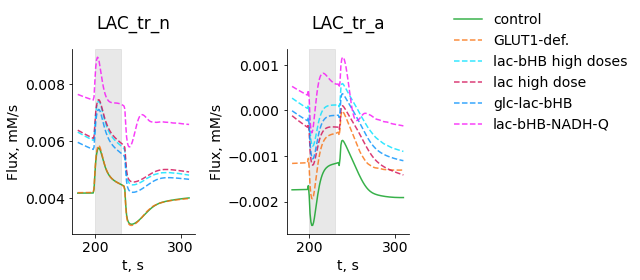

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6,4)) 


for res, ax in zip(fluxes_list_df, axs.ravel()):

    ax.axvspan(200, 230, color='lightgrey', alpha=0.5)

    ax.plot(res.loc[(res['t']>=180)&(res['condition']=='121_default'),'t'],res.loc[(res['t']>=180)&(res['condition']=='121_default'),'flux'],
        color='#069e1d',alpha=0.8, label='control')

    ax.plot(res.loc[(res['t']>=180)&(res['condition']=='g1_61_def'),'t'],res.loc[(res['t']>=180)&(res['condition']=='g1_61_def'),'flux'],
            color='#fa6f0c',alpha=0.8, label='GLUT1-def.',linestyle='dashed')

    ax.plot(res.loc[(res['t']>=180)&(res['condition']=='g1_111_blood_lacbhb_ini_dose5'),'t'],res.loc[(res['t']>=180)&(res['condition']=='g1_111_blood_lacbhb_ini_dose5'),'flux'],
             color='#00e1ff',alpha=0.8,label='lac-bHB high doses',linestyle='dashed')

    # ax.plot(res.loc[(res['t']>=180)&(res['condition']=='146_blood_lac_ini_dose5'),'t'],res.loc[(res['t']>=180)&(res['condition']=='146_blood_lac_ini_dose5'),'flux'],
    #          color='#d10a53',alpha=0.8,label='lac high dose',linestyle='dashed')

    ax.plot(res.loc[(res['t']>=180)&(res['condition']=='g1_40_glclacbhb_ini'),'t'],res.loc[(res['t']>=180)&(res['condition']=='g1_40_glclacbhb_ini'),'flux'],
            color='#0390fc',alpha=0.8,label='glc-lac-bHB',linestyle='dashed')

    ax.plot(res.loc[(res['t']>=180)&(res['condition']=='g1_120_keto_lac_nad_Qtot_na'),'t'],res.loc[(res['t']>=180)&(res['condition']=='g1_120_keto_lac_nad_Qtot_na'),'flux'],
             color='#f70ff7',alpha=0.8,label='lac-bHB-NADH-Q',linestyle='dashed')

    
    
    
    ax.legend([],[], frameon=False)
    
    ax.set_xlabel("t, s")
    ax.set_ylabel("Flux, mM/s")

    ax.set_title(res['flux_name'].values[0].replace("res_",""),pad=20)

    
    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)

plt.subplots_adjust(hspace=1)        
plt.subplots_adjust(wspace=0.35)        


handles, labels = ax.get_legend_handles_labels()


fig.legend(handles, labels, bbox_to_anchor=(1.5, 1.0),frameon=False) # loc='upper center')

fig.tight_layout()
plt.show()  


if savefigures == True:
    fig.savefig(outpath + "fluxes_ANLS_" + timestr + ".pdf",transparent=False, bbox_inches="tight")
    fig.savefig(outpath + "fluxes_ANLS_" + timestr + ".png",dpi=300,transparent=False, bbox_inches="tight")
